---

* 출처: LangChain 공식 문서 또는 해당 교재명
* 원본 URL: https://smith.langchain.com/hub/teddynote/summary-stuff-documents

---

#### **8) `멀티모달 검색`**

* **`Chroma` = `멀티모달 컬렉션` (여러 양식의 데이터를 포함하고 쿼리할 수 있는 컬렉션) 지원**

---

#### **9) `데이터 세트`**

* 허깅페이스에서 호스팅되는 데이터 사용

  * [**`coco object detection dataset`**](https://huggingface.co/datasets/detection-datasets/coco)의 작은 하위 집합 사용
  * 데이터 세트의 모든 이미지 중 일부만 로컬로 다운로드 → 멀티모달 컬렉션 생성하기

Resolving data files:   0%|          | 0/40 [00:00<?, ?it/s]

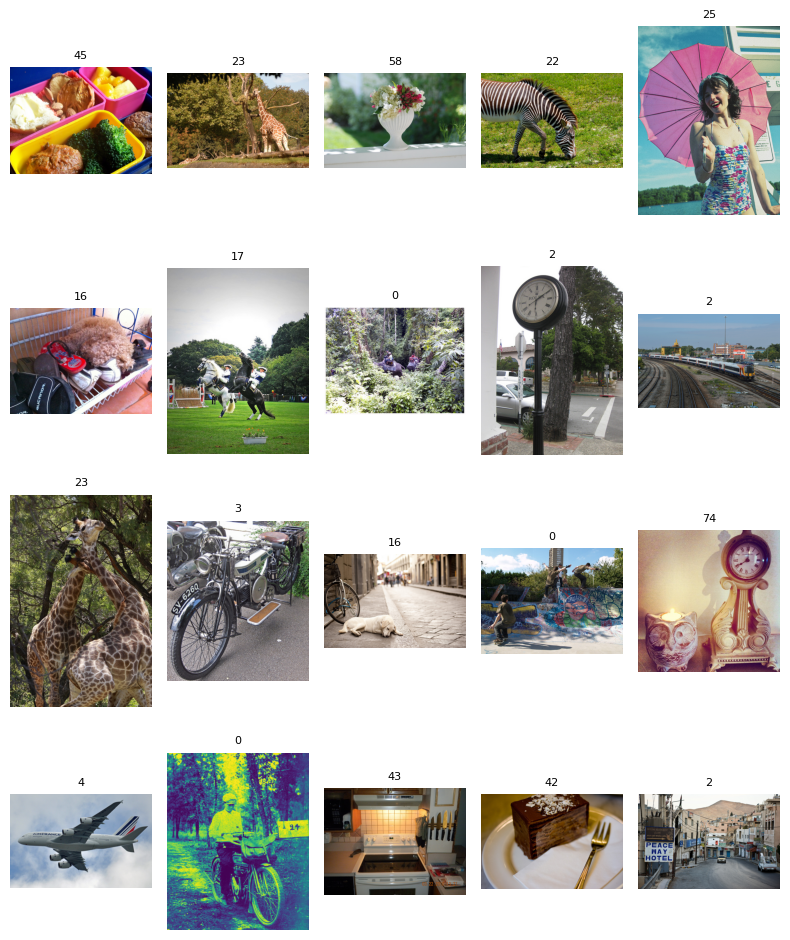

In [14]:
import os
from datasets import load_dataset
from matplotlib import pyplot as plt

# COCO 데이터셋 로드
dataset = load_dataset(
    path="detection-datasets/coco", 
    name="default", 
    split="train", 
    streaming=True
)

# 이미지 저장 폴더와 이미지 개수 설정
IMAGE_FOLDER = "../09_VectorStore/images/tmp"
N_IMAGES = 20

# 그래프 플로팅을 위한 설정
plot_cols = 5
plot_rows = N_IMAGES // plot_cols
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_rows * 2, plot_cols * 2))
axes = axes.flatten()

# 이미지를 폴더에 저장하고 그래프에 표시
dataset_iter = iter(dataset)
os.makedirs(IMAGE_FOLDER, exist_ok=True)
for i in range(N_IMAGES):
    # 데이터셋에서 이미지와 레이블 추출
    data = next(dataset_iter)
    image = data["image"]
    label = data["objects"]["category"][0]  # 첫 번째 객체의 카테고리를 레이블로 사용

    # 그래프에 이미지 표시 및 레이블 추가
    axes[i].imshow(image)
    axes[i].set_title(label, fontsize=8)
    axes[i].axis("off")

    # 이미지 파일로 저장
    image.save(f"{IMAGE_FOLDER}/{i}.jpg")

# 그래프 레이아웃 조정 및 표시
plt.tight_layout()
plt.show()

<small>

* 다운로드 과정
  * ![다운로드 과정](../09_VectorStore/images/multimodal_1.png)

* 결과
  * ![다운로드 결과](../09_VectorStore/images/multimodal_2.png)

---

#### **10) `Multimodal Embeddings`**

* `Multimodal Embeddings` → `이미지`, `텍스트`에 대한 `Embedding` 생성하기

* `OpenClipEmbeddingFunction` → 이미지 임베딩하기

* 사전에 `VS Code`에 설치할 것
```bash

        pip install open-clip-torch

```


* *참고: [**`OpenCLIP`**](https://github.com/mlfoundations/open_clip/tree/main)*

* **`Model 벤치마크`**

  * ![모델 벤치마트](../09_VectorStore/images/model_benchmark.png)

* 아래의 에시에서 `model_name`, `checkpoint` 설정 → 사용

  * **`model_name`**: `OpenCLIP` 모델명
  * **`checkpoint`**: `OpenCLIP` 모델의 `Training data`에 해당하는 이름

In [15]:
import open_clip
import pandas as pd

# 사용 가능한 모델/Checkpoint 를 출력
pd.DataFrame(open_clip.list_pretrained(), columns=["model_name", "checkpoint"]).head(10)

,model_name,checkpoint
0,RN50,openai
1,RN50,yfcc15m
2,RN50,cc12m
3,RN101,openai
4,RN101,yfcc15m
5,RN50x4,openai
6,RN50x16,openai
7,RN50x64,openai
8,ViT-B-32,openai
9,ViT-B-32,laion400m_e31


* 셀 출력: `사용 가능한 모델, 체크포인트 출력`

  * ![사용 가능한 모델, 체크포인트](../09_VectorStore/images/pd_df_openclip.png)

In [16]:
from langchain_experimental.open_clip import OpenCLIPEmbeddings

# OpenCLIP 임베딩 함수 객체 생성
image_embedding_function = OpenCLIPEmbeddings(
    model_name="ViT-H-14-378-quickgelu", 
    checkpoint="dfn5b"
)

<small>

* 셀 출력 (5m 45.8s)

  * ![결과](../09_VectorStore/images/multimodal_3.png)

* 이미지 경로 = `list`로 저장하기

In [17]:
# 이미지의 경로를 리스트로 저장
image_uris = sorted(
    [
        #os.path.join("tmp", image_name)
        #for image_name in os.listdir("tmp")
        os.path.join(IMAGE_FOLDER, image_name)
        for image_name in os.listdir(IMAGE_FOLDER)
        if image_name.endswith(".jpg")
    ]
)

image_uris

['../09_VectorStore/images/tmp/0.jpg',
 '../09_VectorStore/images/tmp/1.jpg',
 '../09_VectorStore/images/tmp/10.jpg',
 '../09_VectorStore/images/tmp/11.jpg',
 '../09_VectorStore/images/tmp/12.jpg',
 '../09_VectorStore/images/tmp/13.jpg',
 '../09_VectorStore/images/tmp/14.jpg',
 '../09_VectorStore/images/tmp/15.jpg',
 '../09_VectorStore/images/tmp/16.jpg',
 '../09_VectorStore/images/tmp/17.jpg',
 '../09_VectorStore/images/tmp/18.jpg',
 '../09_VectorStore/images/tmp/19.jpg',
 '../09_VectorStore/images/tmp/2.jpg',
 '../09_VectorStore/images/tmp/3.jpg',
 '../09_VectorStore/images/tmp/4.jpg',
 '../09_VectorStore/images/tmp/5.jpg',
 '../09_VectorStore/images/tmp/6.jpg',
 '../09_VectorStore/images/tmp/7.jpg',
 '../09_VectorStore/images/tmp/8.jpg',
 '../09_VectorStore/images/tmp/9.jpg']

<small>

* 셀 출력

    ```python

    ['../09_VectorStore/images/tmp/0.jpg',
    '../09_VectorStore/images/tmp/1.jpg',
    '../09_VectorStore/images/tmp/10.jpg',
    '../09_VectorStore/images/tmp/11.jpg',
    '../09_VectorStore/images/tmp/12.jpg',
    '../09_VectorStore/images/tmp/13.jpg',
    '../09_VectorStore/images/tmp/14.jpg',
    '../09_VectorStore/images/tmp/15.jpg',
    '../09_VectorStore/images/tmp/16.jpg',
    '../09_VectorStore/images/tmp/17.jpg',
    '../09_VectorStore/images/tmp/18.jpg',
    '../09_VectorStore/images/tmp/19.jpg',
    '../09_VectorStore/images/tmp/2.jpg',
    '../09_VectorStore/images/tmp/3.jpg',
    '../09_VectorStore/images/tmp/4.jpg',
    '../09_VectorStore/images/tmp/5.jpg',
    '../09_VectorStore/images/tmp/6.jpg',
    '../09_VectorStore/images/tmp/7.jpg',
    '../09_VectorStore/images/tmp/8.jpg',
    '../09_VectorStore/images/tmp/9.jpg']

    ```

In [ ]:
# 이미지 임베딩 계산 (1m 1.7s 소요)
import numpy as np

img_vecs = image_embedding_function.embed_image(image_uris)         # list[list[float]]
img_vecs = np.array(img_vecs, dtype="float32")

In [65]:
# 간단한 인메모리 인덱스(코사인 유사도) 준비
def cosine_sim(a, b):
    a = a / (np.linalg.norm(a, axis=-1, keepdims=True) + 1e-9)
    b = b / (np.linalg.norm(b, axis=-1, keepdims=True) + 1e-9)
    return a @ b.T

# 이미지 경로와 벡터를 함께 보관
image_index = {"uris": image_uris, "vectors": img_vecs}

In [ ]:
# 텍스트 쿼리로 관련 이미지 top-k 검색
query = "a red vintage car on the street"
q_vec = np.array(
    image_embedding_function.embed_query(query),     # 텍스트 임베딩
    dtype="float32",
)[None, :]                                           # (1, d)

sims = cosine_sim(q_vec, image_index["vectors"])[0]  # (num_images,)
top_k = 3
top_idx = sims.argsort()[::-1][:top_k]
top_images = [image_index["uris"][i] for i in top_idx]
print(top_images)

<small>

* 셀 출력 (4.3s)(`k=3`)

    ```python

    ['../09_VectorStore/images/tmp/11.jpg', '../09_VectorStore/images/tmp/19.jpg', '../09_VectorStore/images/tmp/8.jpg']

    ```

In [ ]:
# 이미지로 이미지 검색도 가능 (특정 쿼리 이미지의 임베딩을 뽑아 상위 유사 이미지 검색도 가능)
query_image = image_uris[0]
q_img_vec = np.array(image_embedding_function.embed_image([query_image])[0])[None, :]
sims = cosine_sim(q_img_vec, image_index["vectors"])[0]
top_idx = sims.argsort()[::-1][:top_k]
top_images = [image_index["uris"][i] for i in top_idx]
print(top_images)

<small>

* 셀 출력 (4.9s) (`k=3`)

    ```python

    ['../09_VectorStore/images/tmp/0.jpg', '../09_VectorStore/images/tmp/1.jpg', '../09_VectorStore/images/tmp/15.jpg']

    ```

* 상위 이미지들을 gemini로 보내 캡션 생성하기
  * 전달 방법: `base64 data URI`로 전달 or `공개 URL`
  * 로컬 파일: `base64 data URI` 권장

In [ ]:
import base64, mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from google import genai
import os
import json

# Gemini 모델 초기화 (멀티모달 지원)
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

---

* **`디버깅 과정`**

In [ ]:
# 진단 스니펫
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # 반드시  접두부 포함
    return f"{mime};base64,{b64}"

# 3) 프롬프트 구성 (시스템 + 사용자 제약)
system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# 1) data URI 생성
test_path = image_uris[0]
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # 기대: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

# 2) HumanMessage 블록 구성 후 다시 확인
blocks = [{"type": "text", "text": "Describe in one sentence (<60 chars)."}]
blocks.append({"type": "image_url", "image_url": uri})
print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

# 3) 최종 invoke 직전 상태 점검
msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])
resp = llm.invoke(msgs)
print(resp.content)

<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[78]\u001b[39m\u001b[32m, line 27\u001b[39m\n\u001b[32m     25\u001b[39m msgs = [system_msg, HumanMessage(content=blocks)]\n\u001b[32m     26\u001b[39m \u001b[38;5;28mprint\u001b[39m(\u001b[33m\"\u001b[39m\u001b[33mMSG_OK:\u001b[39m\u001b[33m\"\u001b[39m, \u001b[38;5;28misinstance\u001b[39m(msgs[\u001b[32m1\u001b[39m].content, \u001b[38;5;28mlist\u001b[39m), msgs[\u001b[32m1\u001b[39m].content[\u001b[32m1\u001b[39m][\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m])\n\u001b[32m---> \u001b[39m\u001b[32m27\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     28\u001b[39m \u001b[38;5;28mprint\u001b[39m(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\...(truncated)
    ```

In [ ]:
# 진단 스니펫2
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # 반드시 '' 접두부 포함
    return f"{mime};base64,{b64}"

# 기대 출력값 출력해보기
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # 기대: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

In [ ]:
# 진단 스니펫3
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"  # ←  접두부 필수


# 3) 프롬프트 구성 (시스템 + 사용자 제약)
system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# 1) data URI 생성
test_path = image_uris[0]
uri = to_data_uri(test_path)
print("HEAD:", uri[:40])           # 기대: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))

# 2) HumanMessage 블록 구성 후 다시 확인
blocks = [{"type": "text", "text": "Describe in one sentence (<60 chars)."}]
blocks.append({"type": "image_url", "image_url": uri})
print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

# 3) 최종 invoke 직전 상태 점검
msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])

<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

In [ ]:
# 진단 스니펫4

import base64
import mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # 여기서 반드시 "" 접두부 포함해야 오류 안 납니다
    return f"{mime};base64,{b64}"

system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

# 이미지 경로(예시)
test_path = image_uris[0]
uri = to_data_uri(test_path)

# 포맷 확인 출력 (반드시 접두부 포함인지 꼭 확인할 것)
print("HEAD:", uri[:40])                  # 기대: image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))  # True 여야 함

blocks = [
    {"type": "text", "text": user_instruction + " Please describe this image."},
    {"type": "image_url", "image_url": uri}
]

print("BLOCK_IMAGE_URL_HEAD:", blocks[1]["image_url"][:40])

msgs = [system_msg, HumanMessage(content=blocks)]
print("MSG_OK:", isinstance(msgs[1].content, list), msgs[1].content[1]["type"])

#resp = llm.invoke(msgs)
#print(resp.content)


<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    BLOCK_IMAGE_URL_HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    MSG_OK: True image_url
    ```

In [ ]:
# 진단 스니펫5

import base64, mimetypes
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # 반드시  접두부 포함
    return f"{mime};base64,{b64}"

system_msg = SystemMessage(content="Your mission is to describe the image in detail")
user_instruction = "Description should be written in one sentence (less than 60 characters)."

test_path = image_uris[0]          # 실제 이미지 경로
uri = to_data_uri(test_path)

# 접두부 포함 여부 정확 검증
print("HEAD:", uri[:40])                           # ⇒ image/jpeg;base64,
print("HAS_DATA_PREFIX:", uri.startswith("image/"))  # ⇒ True

blocks = [
    {"type": "text", "text": f"{user_instruction} Please describe this image."},
    {"type": "image_url", "image_url": uri},
]

msgs = [system_msg, HumanMessage(content=blocks)]
#resp = llm.invoke(msgs)
#print(resp.content)
print(msgs)

<small>

* 셀 출력 

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

    ```bash
    [SystemMessage(content='Your mission is to describe the image in detail', additional_kwargs={}, response_metadata={}), HumanMessage(content=[{'type': 'text', 'text': 'Description should be written in one sentence (less than 60 characters). Please describe this image.'}, {'type': 'image_url', 'image_url': 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='}], additional_kwargs={}, response_metadata={})]
```

In [ ]:
import base64, mimetypes, os
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ------- 설정 -------
IMAGE_DIR = "../09_VectorStore/images/tmp"
image_uris = sorted(
    [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(".jpg")]
)
model_name = "gemini-1.5-flash"
# --------------------

llm = ChatGoogleGenerativeAI(model=model_name)

def to_data_uri(path: str) -> str:
    """로컬 이미지 → data URI (RFC2397)"""
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    # 반드시  스킴 포함
    return f"{mime};base64,{b64}"

# ① 테스트 이미지 1장
test_path = image_uris[0]          # 첫 번째 파일
uri = to_data_uri(test_path)

# ② 검증 로그
print("HEAD:", uri[:40])                              # image/jpeg;base64,...
print("HAS_DATA_PREFIX:", uri.startswith("image/"))   # True 여야 함

# ③ Gemini 메시지 구성
blocks = [
    {"type": "text", "text": "Description (≤60 chars). Please describe this image."},
    {"type": "image_url", "image_url": uri},
]

msgs = [
    SystemMessage(content="Your mission is to describe the image in detail"),
    HumanMessage(content=blocks),
]

# ④ 호출
resp = llm.invoke(msgs)
print(resp.content)


<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    HAS_DATA_PREFIX: True
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[89]\u001b[39m\u001b[32m, line 43\u001b[39m\n\u001b[32m     37\u001b[39m msgs = [\n\u001b[32m     38\u001b[39m     SystemMessage(content=\u001b[33m\"\u001b[39m\u001b[33mYour mission is to describe the image in detail\u001b[39m\u001b[33m\"\u001b[39m),\n\u001b[32m     39\u001b[39m     HumanMessage(content=blocks),\n\u001b[32m     40\u001b[39m ]\n\u001b[32m     42\u001b[39m \u001b[38;5;66;03m# ④ 호출\u001b[39;00m\n\u001b[32m---> \u001b[39m\u001b[32m43\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     44\u001b[39m \u001b[38;5;28mprint\u001b[39m(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\u001b[39m\u001b[33m\"\u001b[39m:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/...(truncated)
    ```


In [ ]:
import os, base64, mimetypes, pprint
from langchain_core.messages import SystemMessage, HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

# ------------- 사용자 설정 -------------
IMAGE_DIR = "../09_VectorStore/images/tmp"   # 이미지 폴더
MODEL     = "gemini-1.5-flash"              # 사용 모델
# --------------------------------------

def to_data_uri(path: str) -> str:
    """로컬 파일을 RFC 2397 data URI로 변환"""
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"

# 변환 + 검증
image_paths = sorted(
    [os.path.join(IMAGE_DIR, f) for f in os.listdir(IMAGE_DIR) if f.endswith(".jpg")]
)
first_uri = to_data_uri(image_paths[0])

# 필수 검증 – 반드시 True
assert first_uri.startswith("image/"), " 스킴이 없습니다!"

# 로그 확인
print("HEAD:", first_uri[:40])

# Gemini 메시지
blocks = [
    {"type": "text",      "text": "Describe this image in one sentence."},
    {"type": "image_url", "image_url": first_uri},
]
msgs = [
    SystemMessage(content="You are a helpful assistant."),
    HumanMessage(content=blocks),
]

# 호출
llm  = ChatGoogleGenerativeAI(model=MODEL)
resp = llm.invoke(msgs)
pprint.pprint(resp.content)


<small>

* 셀 출력

    ```markdown
    HEAD: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
    ```

    ```bash
    {
        "name": "ValueError",
        "message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
        "stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[90]\u001b[39m\u001b[32m, line 41\u001b[39m\n\u001b[32m     39\u001b[39m \u001b[38;5;66;03m# 호출\u001b[39;00m\n\u001b[32m     40\u001b[39m llm  = ChatGoogleGenerativeAI(model=MODEL)\n\u001b[32m---> \u001b[39m\u001b[32m41\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     42\u001b[39m pprint.pprint(resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u001b[43m.\u001b[49m\u001b[43mload_part\u001b[49m\u001b[43m(\u001b[49m\u001b[43mimg_url\u001b[49m\u001b[43m)\u001b[49m)\n\u001b[32m    260\u001b[39m \u001b[38;5;66;03m# Handle media type like LangChain.js\u001b[39;00m\n\u001b[32m    261\u001b[39m \u001b[38;5;66;03m# https://github.com/langchain-ai/langchainjs/blob/e536593e2585f1dd7b0afc187de4d07cb40689ba/libs/langchain-google-common/src/utils/gemini.ts#L93-L106\u001b[39;00m\n\u001b[32m    262\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m part[\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m] == \u001b[33m\"\u001b[39m\u001b[33mmedia\u001b[39m\u001b[33m\"\u001b[39m:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/_image_utils.py:74\u001b[39m, in \u001b[36mImageBytesLoader.load_part\u001b[39m\u001b[34m(self, image_string)\u001b[39m\n\u001b[32m     66\u001b[39m \u001b[38;5;28;01mdef\u001...(truncated)
    ```

In [ ]:
def debug_data_uri_issue():
    import inspect
    
    # 1. 현재 실행중인 함수들 모두 찾기
    for name, obj in globals().items():
        if 'data' in name.lower() and callable(obj):
            print(f"함수 발견: {name}")
            try:
                print(f"소스: {inspect.getsource(obj)}")
            except:
                pass
    
    # 2. 단계별 값 추적
    path = image_uris[0]  # 첫 번째 이미지
    
    print(f"1. 원본 경로: {path}")
    
    # 실제 함수 호출하면서 중간값들 모두 출력
    mime = mimetypes.guess_type(path)[0] or "image/jpeg"
    print(f"2. MIME 타입: {mime}")
    
    with open(path, "rb") as f:
        b64_data = base64.b64encode(f.read()).decode("utf-8")
    
    print(f"3. base64 길이: {len(b64_data)}")
    print(f"4. base64 앞 50자: {b64_data[:50]}")
    
    # 여기가 핵심!
    uri_without_data = f"{mime};base64,{b64_data[:50]}..."
    uri_with_data = f"{mime};base64,{b64_data[:50]}..."
    
    print(f"5.  없을 때: {uri_without_data}")
    print(f"6.  있을 때: {uri_with_data}")
    
    return f"{mime};base64,{b64_data}"

# 실행해보기
final_uri = debug_data_uri_issue()


<small>

* 셀 출력

    ```markdown

    함수 발견: load_dataset
    소스: def load_dataset(
        path: str,
        name: Optional[str] = None,
        data_dir: Optional[str] = None,
        data_files: Optional[Union[str, Sequence[str], Mapping[str, Union[str, Sequence[str]]]]] = None,
        split: Optional[Union[str, Split, list[str], list[Split]]] = None,
        cache_dir: Optional[str] = None,
        features: Optional[Features] = None,
        download_config: Optional[DownloadConfig] = None,
        download_mode: Optional[Union[DownloadMode, str]] = None,
        verification_mode: Optional[Union[VerificationMode, str]] = None,
        keep_in_memory: Optional[bool] = None,
        save_infos: bool = False,
        revision: Optional[Union[str, Version]] = None,
        token: Optional[Union[bool, str]] = None,
        streaming: bool = False,
        num_proc: Optional[int] = None,
        storage_options: Optional[dict] = None,
        **config_kwargs,
    ) -> Union[DatasetDict, Dataset, IterableDatasetDict, IterableDataset]:
        """Load a dataset from the Hugging Face Hub, or a local dataset.

        You can find the list of datasets on the [Hub](https://huggingface.co/datasets) or with [`huggingface_hub.list_datasets`].

        A dataset is a directory that contains some data files in generic formats (JSON, CSV, Parquet, etc.) and possibly
        in a generic structure (Webdataset, ImageFolder, AudioFolder, VideoFolder, etc.)

        This function does the following under the hood:

            1. Load a dataset builder:

                * Find the most common data format in the dataset and pick its associated builder (JSON, CSV, Parquet, Webdataset, ImageFolder, AudioFolder, etc.)
                * Find which file goes into which split (e.g. train/test) based on file and directory names or on the YAML configuration
                * It is also possible to specify `data_files` manually, and which dataset builder to use (e.g. "parquet").

            2. Run the dataset builder:

                In the general case:

                * Download the data files from the dataset if they are not already available locally or cached.
                * Process and cache the dataset in typed Arrow tables for caching.

                    Arrow table are arbitrarily long, typed tables which can store nested objects and be mapped to numpy/pandas/python generic types.
                    They can be directly accessed from disk, loaded in RAM or even streamed over the web.

                In the streaming case:

                * Don't download or cache anything. Instead, the dataset is lazily loaded and will be streamed on-the-fly when iterating on it.

            3. Return a dataset built from the requested splits in `split` (default: all).

        Args:

            path (`str`):
                Path or name of the dataset.

                - if `path` is a dataset repository on the HF hub (list all available datasets with [`huggingface_hub.list_datasets`])
                -> load the dataset from supported files in the repository (csv, json, parquet, etc.)
                e.g. `'username/dataset_name'`, a dataset repository on the HF hub containing the data files.

                - if `path` is a local directory
                -> load the dataset from supported files in the directory (csv, json, parquet, etc.)
                e.g. `'./path/to/directory/with/my/csv/data'`.

                - if `path` is the name of a dataset builder and `data_files` or `data_dir` is specified
                (available builders are "json", "csv", "parquet", "arrow", "text", "xml", "webdataset", "imagefolder", "audiofolder", "videofolder")
                -> load the dataset from the files in `data_files` or `data_dir`
                e.g. `'parquet'`.

            name (`str`, *optional*):
                Defining the name of the dataset configuration.
            data_dir (`str`, *optional*):
                Defining the `data_dir` of the dataset configuration. If specified for the generic builders (csv, text etc.) or the Hub datasets and `data_files` is `None`,
                the behavior is equal to passing `os.path.join(data_dir, **)` as `data_files` to reference all the files in a directory.
            data_files (`str` or `Sequence` or `Mapping`, *optional*):
                Path(s) to source data file(s).
            split (`Split` or `str`):
                Which split of the data to load.
                If `None`, will return a `dict` with all splits (typically `datasets.Split.TRAIN` and `datasets.Split.TEST`).
                If given, will return a single Dataset.
                Splits can be combined and specified like in tensorflow-datasets.
            cache_dir (`str`, *optional*):
                Directory to read/write data. Defaults to `"~/.cache/huggingface/datasets"`.
            features (`Features`, *optional*):
                Set the features type to use for this dataset.
            download_config ([`DownloadConfig`], *optional*):
                Specific download configuration parameters.
            download_mode ([`DownloadMode`] or `str`, defaults to `REUSE_DATASET_IF_EXISTS`):
                Download/generate mode.
            verification_mode ([`VerificationMode`] or `str`, defaults to `BASIC_CHECKS`):
                Verification mode determining the checks to run on the downloaded/processed dataset information (checksums/size/splits/...).

                <Added version="2.9.1"/>
            keep_in_memory (`bool`, defaults to `None`):
                Whether to copy the dataset in-memory. If `None`, the dataset
                will not be copied in-memory unless explicitly enabled by setting `datasets.config.IN_MEMORY_MAX_SIZE` to
                nonzero. See more details in the [improve performance](../cache#improve-performance) section.
            revision ([`Version`] or `str`, *optional*):
                Version of the dataset to load.
                As datasets have their own git repository on the Datasets Hub, the default version "main" corresponds to their "main" branch.
                You can specify a different version than the default "main" by using a commit SHA or a git tag of the dataset repository.
            token (`str` or `bool`, *optional*):
                Optional string or boolean to use as Bearer token for remote files on the Datasets Hub.
                If `True`, or not specified, will get token from `"~/.huggingface"`.
            streaming (`bool`, defaults to `False`):
                If set to `True`, don't download the data files. Instead, it streams the data progressively while
                iterating on the dataset. An [`IterableDataset`] or [`IterableDatasetDict`] is returned instead in this case.

                Note that streaming works for datasets that use data formats that support being iterated over like txt, csv, jsonl for example.
                Json files may be downloaded completely. Also streaming from remote zip or gzip files is supported but other compressed formats
                like rar and xz are not yet supported. The tgz format doesn't allow streaming.
            num_proc (`int`, *optional*, defaults to `None`):
                Number of processes when downloading and generating the dataset locally.
                Multiprocessing is disabled by default.

                <Added version="2.7.0"/>
            storage_options (`dict`, *optional*, defaults to `None`):
                **Experimental**. Key/value pairs to be passed on to the dataset file-system backend, if any.

                <Added version="2.11.0"/>
            **config_kwargs (additional keyword arguments):
                Keyword arguments to be passed to the `BuilderConfig`
                and used in the [`DatasetBuilder`].

        Returns:
            [`Dataset`] or [`DatasetDict`]:
            - if `split` is not `None`: the dataset requested,
            - if `split` is `None`, a [`~datasets.DatasetDict`] with each split.

            or [`IterableDataset`] or [`IterableDatasetDict`]: if `streaming=True`

            - if `split` is not `None`, the dataset is requested
            - if `split` is `None`, a [`~datasets.streaming.IterableDatasetDict`] with each split.

        Example:

        Load a dataset from the Hugging Face Hub:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train')

        # Load a subset or dataset configuration (here 'sst2')
        >>> from datasets import load_dataset
        >>> ds = load_dataset('nyu-mll/glue', 'sst2', split='train')

        # Manual mapping of data files to splits
        >>> data_files = {'train': 'train.csv', 'test': 'test.csv'}
        >>> ds = load_dataset('namespace/your_dataset_name', data_files=data_files)

        # Manual selection of a directory to load
        >>> ds = load_dataset('namespace/your_dataset_name', data_dir='folder_name')
        ```

        Load a local dataset:

        ```py
        # Load a CSV file
        >>> from datasets import load_dataset
        >>> ds = load_dataset('csv', data_files='path/to/local/my_dataset.csv')

        # Load a JSON file
        >>> from datasets import load_dataset
        >>> ds = load_dataset('json', data_files='path/to/local/my_dataset.json')
        ```

        Load an [`~datasets.IterableDataset`]:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('cornell-movie-review-data/rotten_tomatoes', split='train', streaming=True)
        ```

        Load an image dataset with the `ImageFolder` dataset builder:

        ```py
        >>> from datasets import load_dataset
        >>> ds = load_dataset('imagefolder', data_dir='/path/to/images', split='train')
        ```
        """
        if "trust_remote_code" in config_kwargs:
            if config_kwargs.pop("trust_remote_code"):
                logger.error(
                    "`trust_remote_code` is not supported anymore.\n"
                    f"Please check that the Hugging Face dataset '{path}' isn't based on a loading script and remove `trust_remote_code`.\n"
                    "If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet."
                )
        if data_files is not None and not data_files:
            raise ValueError(f"Empty 'data_files': '{data_files}'. It should be either non-empty or None (default).")
        if Path(path, config.DATASET_STATE_JSON_FILENAME).exists():
            raise ValueError(
                "You are trying to load a dataset that was saved using `save_to_disk`. "
                "Please use `load_from_disk` instead."
            )

        if streaming and num_proc is not None:
            raise NotImplementedError(
                "Loading a streaming dataset in parallel with `num_proc` is not implemented. "
                "To parallelize streaming, you can wrap the dataset with a PyTorch DataLoader using `num_workers` > 1 instead."
            )

        download_mode = DownloadMode(download_mode or DownloadMode.REUSE_DATASET_IF_EXISTS)
        verification_mode = VerificationMode(
            (verification_mode or VerificationMode.BASIC_CHECKS) if not save_infos else VerificationMode.ALL_CHECKS
        )

        # Create a dataset builder
        builder_instance = load_dataset_builder(
            path=path,
            name=name,
            data_dir=data_dir,
            data_files=data_files,
            cache_dir=cache_dir,
            features=features,
            download_config=download_config,
            download_mode=download_mode,
            revision=revision,
            token=token,
            storage_options=storage_options,
            **config_kwargs,
        )

        # Return iterable dataset in case of streaming
        if streaming:
            return builder_instance.as_streaming_dataset(split=split)

        # Download and prepare data
        builder_instance.download_and_prepare(
            download_config=download_config,
            download_mode=download_mode,
            verification_mode=verification_mode,
            num_proc=num_proc,
            storage_options=storage_options,
        )

        # Build dataset for splits
        keep_in_memory = (
            keep_in_memory if keep_in_memory is not None else is_small_dataset(builder_instance.info.dataset_size)
        )
        ds = builder_instance.as_dataset(split=split, verification_mode=verification_mode, in_memory=keep_in_memory)

        return ds

    함수 발견: to_data_uri
    소스: def to_data_uri(path: str) -> str:
        """로컬 파일을 RFC 2397 data URI로 변환"""
        mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
        with open(path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        return f"{mime};base64,{b64}"

    함수 발견: debug_data_uri_issue
    소스: def debug_data_uri_issue():
        import inspect

        # 1. 현재 실행중인 함수들 모두 찾기
        for name, obj in globals().items():
            if 'data' in name.lower() and callable(obj):
                print(f"함수 발견: {name}")
                try:
                    print(f"소스: {inspect.getsource(obj)}")
                except:
                    pass

        # 2. 단계별 값 추적
        path = image_uris[0]  # 첫 번째 이미지

        print(f"1. 원본 경로: {path}")

        # 실제 함수 호출하면서 중간값들 모두 출력
        mime = mimetypes.guess_type(path)[0] or "image/jpeg"
        print(f"2. MIME 타입: {mime}")

        with open(path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")

        print(f"3. base64 길이: {len(b64_data)}")
        print(f"4. base64 앞 50자: {b64_data[:50]}")

        # 여기가 핵심!
        uri_without_data = f"{mime};base64,{b64_data[:50]}..."
        uri_with_data = f"{mime};base64,{b64_data[:50]}..."

        print(f"5.  없을 때: {uri_without_data}")
        print(f"6.  있을 때: {uri_with_data}")

        return f"{mime};base64,{b64_data}"

    1. 원본 경로: ../09_VectorStore/images/tmp/0.jpg
    2. MIME 타입: image/jpeg
    3. base64 길이: 83492
    4. base64 앞 50자: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
    5.  없을 때: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ...
    6.  있을 때: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ...

    ```

In [92]:
# 함수 재정의

def to_data_uri(path: str) -> str:
    """로컬 파일을 RFC 2397 data URI로 변환"""
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"  # ←  추가!

In [ ]:
# 테스트 

# 기존 함수 덮어쓰기
def to_data_uri(path: str) -> str:
    mime = mimetypes.guess_type(path)[0] or "application/octet-stream"
    with open(path, "rb") as f:
        b64 = base64.b64encode(f.read()).decode("utf-8")
    return f"{mime};base64,{b64}"

# 다시 테스트
test_uri = to_data_uri(image_uris[0])
print("🎯 수정된 URI 시작:", test_uri[:40])
print("✅  체크:", test_uri.startswith(""))

# Gemini 호출
if test_uri.startswith(""):
    blocks = [
        {"type": "text", "text": "이미지를 한 문장으로 설명해주세요."},
        {"type": "image_url", "image_url": test_uri}
    ]
    msgs = [
        SystemMessage(content="간단히 설명해주세요."),
        HumanMessage(content=blocks)
    ]
    
    resp = llm.invoke(msgs)
    print("🚀 성공!", resp.content)


<small>

* 셀 출력

	```markdown
	🎯 수정된 URI 시작: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQ
	✅  체크: True
	```

	```bash
	{
		"name": "ValueError",
		"message": "Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.",
		"stack": "\u001b[31m---------------------------------------------------------------------------\u001b[39m\n\u001b[31mValueError\u001b[39m                                Traceback (most recent call last)\n\u001b[36mCell\u001b[39m\u001b[36m \u001b[39m\u001b[32mIn[94]\u001b[39m\u001b[32m, line 26\u001b[39m\n\u001b[32m     17\u001b[39m blocks = [\n\u001b[32m     18\u001b[39m     {\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33mtext\u001b[39m\u001b[33m\"\u001b[39m, \u001b[33m\"\u001b[39m\u001b[33mtext\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33m이미지를 한 문장으로 설명해주세요.\u001b[39m\u001b[33m\"\u001b[39m},\n\u001b[32m     19\u001b[39m     {\u001b[33m\"\u001b[39m\u001b[33mtype\u001b[39m\u001b[33m\"\u001b[39m: \u001b[33m\"\u001b[39m\u001b[33mimage_url\u001b[39m\u001b[33m\"\u001b[39m, \u001b[33m\"\u001b[39m\u001b[33mimage_url\u001b[39m\u001b[33m\"\u001b[39m: test_uri}\n\u001b[32m     20\u001b[39m ]\n\u001b[32m     21\u001b[39m msgs = [\n\u001b[32m     22\u001b[39m     SystemMessage(content=\u001b[33m\"\u001b[39m\u001b[33m간단히 설명해주세요.\u001b[39m\u001b[33m\"\u001b[39m),\n\u001b[32m     23\u001b[39m     HumanMessage(content=blocks)\n\u001b[32m     24\u001b[39m ]\n\u001b[32m---> \u001b[39m\u001b[32m26\u001b[39m resp = \u001b[43mllm\u001b[49m\u001b[43m.\u001b[49m\u001b[43minvoke\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmsgs\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m     27\u001b[39m \u001b[38;5;28mprint\u001b[39m(\u001b[33m\"\u001b[39m\u001b[33m🚀 성공!\u001b[39m\u001b[33m\"\u001b[39m, resp.content)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:395\u001b[39m, in \u001b[36mBaseChatModel.invoke\u001b[39m\u001b[34m(self, input, config, stop, **kwargs)\u001b[39m\n\u001b[32m    383\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m    384\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34minvoke\u001b[39m(\n\u001b[32m    385\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m    390\u001b[39m     **kwargs: Any,\n\u001b[32m    391\u001b[39m ) -> BaseMessage:\n\u001b[32m    392\u001b[39m     config = ensure_config(config)\n\u001b[32m    393\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m cast(\n\u001b[32m    394\u001b[39m         \u001b[33m\"\u001b[39m\u001b[33mChatGeneration\u001b[39m\u001b[33m\"\u001b[39m,\n\u001b[32m--> \u001b[39m\u001b[32m395\u001b[39m         \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate_prompt\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    396\u001b[39m \u001b[43m            \u001b[49m\u001b[43m[\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_convert_input\u001b[49m\u001b[43m(\u001b[49m\u001b[38;5;28;43minput\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m]\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    397\u001b[39m \u001b[43m            \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    398\u001b[39m \u001b[43m            \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mcallbacks\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    399\u001b[39m \u001b[43m            \u001b[49m\u001b[43mtags\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mtags\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    400\u001b[39m \u001b[43m            \u001b[49m\u001b[43mmetadata\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mmetadata\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    401\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_name\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mget\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_name\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    402\u001b[39m \u001b[43m            \u001b[49m\u001b[43mrun_id\u001b[49m\u001b[43m=\u001b[49m\u001b[43mconfig\u001b[49m\u001b[43m.\u001b[49m\u001b[43mpop\u001b[49m\u001b[43m(\u001b[49m\u001b[33;43m\"\u001b[39;49m\u001b[33;43mrun_id\u001b[39;49m\u001b[33;43m\"\u001b[39;49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m)\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    403\u001b[39m \u001b[43m            \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    404\u001b[39m \u001b[43m        \u001b[49m\u001b[43m)\u001b[49m.generations[\u001b[32m0\u001b[39m][\u001b[32m0\u001b[39m],\n\u001b[32m    405\u001b[39m     ).message\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1023\u001b[39m, in \u001b[36mBaseChatModel.generate_prompt\u001b[39m\u001b[34m(self, prompts, stop, callbacks, **kwargs)\u001b[39m\n\u001b[32m   1014\u001b[39m \u001b[38;5;129m@override\u001b[39m\n\u001b[32m   1015\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34mgenerate_prompt\u001b[39m(\n\u001b[32m   1016\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m   (...)\u001b[39m\u001b[32m   1020\u001b[39m     **kwargs: Any,\n\u001b[32m   1021\u001b[39m ) -> LLMResult:\n\u001b[32m   1022\u001b[39m     prompt_messages = [p.to_messages() \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m prompts]\n\u001b[32m-> \u001b[39m\u001b[32m1023\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mgenerate\u001b[49m\u001b[43m(\u001b[49m\u001b[43mprompt_messages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcallbacks\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m)\u001b[49m\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:840\u001b[39m, in \u001b[36mBaseChatModel.generate\u001b[39m\u001b[34m(self, messages, stop, callbacks, tags, metadata, run_name, run_id, **kwargs)\u001b[39m\n\u001b[32m    837\u001b[39m \u001b[38;5;28;01mfor\u001b[39;00m i, m \u001b[38;5;129;01min\u001b[39;00m \u001b[38;5;28menumerate\u001b[39m(input_messages):\n\u001b[32m    838\u001b[39m     \u001b[38;5;28;01mtry\u001b[39;00m:\n\u001b[32m    839\u001b[39m         results.append(\n\u001b[32m--> \u001b[39m\u001b[32m840\u001b[39m             \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate_with_cache\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    841\u001b[39m \u001b[43m                \u001b[49m\u001b[43mm\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    842\u001b[39m \u001b[43m                \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    843\u001b[39m \u001b[43m                \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m[\u001b[49m\u001b[43mi\u001b[49m\u001b[43m]\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mif\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[43mrun_managers\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;28;43;01melse\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43;01mNone\u001b[39;49;00m\u001b[43m,\u001b[49m\n\u001b[32m    844\u001b[39m \u001b[43m                \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    845\u001b[39m \u001b[43m            \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    846\u001b[39m         )\n\u001b[32m    847\u001b[39m     \u001b[38;5;28;01mexcept\u001b[39;00m \u001b[38;5;167;01mBaseException\u001b[39;00m \u001b[38;5;28;01mas\u001b[39;00m e:\n\u001b[32m    848\u001b[39m         \u001b[38;5;28;01mif\u001b[39;00m run_managers:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_core/language_models/chat_models.py:1089\u001b[39m, in \u001b[36mBaseChatModel._generate_with_cache\u001b[39m\u001b[34m(self, messages, stop, run_manager, **kwargs)\u001b[39m\n\u001b[32m   1087\u001b[39m     result = generate_from_stream(\u001b[38;5;28miter\u001b[39m(chunks))\n\u001b[32m   1088\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m inspect.signature(\u001b[38;5;28mself\u001b[39m._generate).parameters.get(\u001b[33m\"\u001b[39m\u001b[33mrun_manager\u001b[39m\u001b[33m\"\u001b[39m):\n\u001b[32m-> \u001b[39m\u001b[32m1089\u001b[39m     result = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_generate\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1090\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m=\u001b[49m\u001b[43mrun_manager\u001b[49m\u001b[43m,\u001b[49m\u001b[43m \u001b[49m\u001b[43m*\u001b[49m\u001b[43m*\u001b[49m\u001b[43mkwargs\u001b[49m\n\u001b[32m   1091\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1092\u001b[39m \u001b[38;5;28;01melse\u001b[39;00m:\n\u001b[32m   1093\u001b[39m     result = \u001b[38;5;28mself\u001b[39m._generate(messages, stop=stop, **kwargs)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:950\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._generate\u001b[39m\u001b[34m(self, messages, stop, run_manager, tools, functions, safety_settings, tool_config, generation_config, cached_content, tool_choice, **kwargs)\u001b[39m\n\u001b[32m    935\u001b[39m \u001b[38;5;28;01mdef\u001b[39;00m\u001b[38;5;250m \u001b[39m\u001b[34m_generate\u001b[39m(\n\u001b[32m    936\u001b[39m     \u001b[38;5;28mself\u001b[39m,\n\u001b[32m    937\u001b[39m     messages: List[BaseMessage],\n\u001b[32m   (...)\u001b[39m\u001b[32m    948\u001b[39m     **kwargs: Any,\n\u001b[32m    949\u001b[39m ) -> ChatResult:\n\u001b[32m--> \u001b[39m\u001b[32m950\u001b[39m     request = \u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43m_prepare_request\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m    951\u001b[39m \u001b[43m        \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    952\u001b[39m \u001b[43m        \u001b[49m\u001b[43mstop\u001b[49m\u001b[43m=\u001b[49m\u001b[43mstop\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    953\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtools\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtools\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    954\u001b[39m \u001b[43m        \u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m=\u001b[49m\u001b[43mfunctions\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    955\u001b[39m \u001b[43m        \u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m=\u001b[49m\u001b[43msafety_settings\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    956\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    957\u001b[39m \u001b[43m        \u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m=\u001b[49m\u001b[43mgeneration_config\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    958\u001b[39m \u001b[43m        \u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m=\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m \u001b[49m\u001b[38;5;129;43;01mor\u001b[39;49;00m\u001b[43m \u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mcached_content\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    959\u001b[39m \u001b[43m        \u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m=\u001b[49m\u001b[43mtool_choice\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m    960\u001b[39m \u001b[43m    \u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    961\u001b[39m     response: GenerateContentResponse = _chat_with_retry(\n\u001b[32m    962\u001b[39m         request=request,\n\u001b[32m    963\u001b[39m         **kwargs,\n\u001b[32m    964\u001b[39m         generation_method=\u001b[38;5;28mself\u001b[39m.client.generate_content,\n\u001b[32m    965\u001b[39m         metadata=\u001b[38;5;28mself\u001b[39m.default_metadata,\n\u001b[32m    966\u001b[39m     )\n\u001b[32m    967\u001b[39m     \u001b[38;5;28;01mreturn\u001b[39;00m _response_to_result(response)\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:1180\u001b[39m, in \u001b[36mChatGoogleGenerativeAI._prepare_request\u001b[39m\u001b[34m(self, messages, stop, tools, functions, safety_settings, tool_config, tool_choice, generation_config, cached_content)\u001b[39m\n\u001b[32m   1177\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m functions:\n\u001b[32m   1178\u001b[39m     formatted_tools = [convert_to_genai_function_declarations(functions)]\n\u001b[32m-> \u001b[39m\u001b[32m1180\u001b[39m system_instruction, history = \u001b[43m_parse_chat_history\u001b[49m\u001b[43m(\u001b[49m\n\u001b[32m   1181\u001b[39m \u001b[43m    \u001b[49m\u001b[43mmessages\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1182\u001b[39m \u001b[43m    \u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m=\u001b[49m\u001b[38;5;28;43mself\u001b[39;49m\u001b[43m.\u001b[49m\u001b[43mconvert_system_message_to_human\u001b[49m\u001b[43m,\u001b[49m\n\u001b[32m   1183\u001b[39m \u001b[43m\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m   1184\u001b[39m \u001b[38;5;28;01mif\u001b[39;00m tool_choice:\n\u001b[32m   1185\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m \u001b[38;5;129;01mnot\u001b[39;00m formatted_tools:\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:406\u001b[39m, in \u001b[36m_parse_chat_history\u001b[39m\u001b[34m(input_messages, convert_system_message_to_human)\u001b[39m\n\u001b[32m    404\u001b[39m \u001b[38;5;28;01melif\u001b[39;00m \u001b[38;5;28misinstance\u001b[39m(message, HumanMessage):\n\u001b[32m    405\u001b[39m     role = \u001b[33m\"\u001b[39m\u001b[33muser\u001b[39m\u001b[33m\"\u001b[39m\n\u001b[32m--> \u001b[39m\u001b[32m406\u001b[39m     parts = \u001b[43m_convert_to_parts\u001b[49m\u001b[43m(\u001b[49m\u001b[43mmessage\u001b[49m\u001b[43m.\u001b[49m\u001b[43mcontent\u001b[49m\u001b[43m)\u001b[49m\n\u001b[32m    407\u001b[39m     \u001b[38;5;28;01mif\u001b[39;00m i == \u001b[32m1\u001b[39m \u001b[38;5;129;01mand\u001b[39;00m convert_system_message_to_human \u001b[38;5;129;01mand\u001b[39;00m system_instruction:\n\u001b[32m    408\u001b[39m         parts = [p \u001b[38;5;28;01mfor\u001b[39;00m p \u001b[38;5;129;01min\u001b[39;00m system_instruction.parts] + parts\n\n\u001b[36mFile \u001b[39m\u001b[32m~/.pyenv/versions/lc_env/lib/python3.13/site-packages/langchain_google_genai/chat_models.py:259\u001b[39m, in \u001b[36m_convert_to_parts\u001b[39m\u001b[34m(raw_content)\u001b[39m\n\u001b[32m    255\u001b[39m             \u001b[38;5;28;01mraise\u001b[39;00m \u001b[38;5;167;01mValueError\u001b[39;00m(\n\u001b[32m    256\u001b[39m                 \u001b[33mf\u001b[39m\u001b[33m\"\u001b[39m\u001b[33mUnrecognized message image format: \u001b[39m\u001b[38;5;132;01m{\u001b[39;00mimg_url\u001b[38;5;132;01m}\u001b[39;00m\u001b[33m\"\u001b[39m\n\u001b[32m    257\u001b[39m             )\n\u001b[32m    258\u001b[39m         img_url = img_url[\u001b[33m\"\u001b[39m\u001b[33murl\u001b[39m\u001b[33m\"\u001b[39m]\n\u001b[32m--> \u001b[39m\u001b[32m259\u001b[39m     parts.append(\u001b[43mimage_loader\u001b[49m\u...(truncated)
	```

In [ ]:
# 완전히 새로운 변수명과 함수명으로 다시 해보기
import base64, mimetypes

def create_fresh_data_uri(file_path):
    """완전히 새로운 함수"""
    mime_type = mimetypes.guess_type(file_path)[0] or "image/jpeg"
    
    with open(file_path, "rb") as file:
        base64_data = base64.b64encode(file.read()).decode("utf-8")
    
    # 여기서 확실하게  붙이기
    final_uri = f"{mime_type};base64,{base64_data}"
    
    print("🔍 디버깅:")
    print(f"   MIME: {mime_type}")
    print(f"   첫 50글자: {final_uri[:50]}")
    print(f"    있나?: {final_uri.startswith('')}")
    print(f"   전체 길이: {len(final_uri)}")
    
    return final_uri

# 테스트
fresh_uri = create_fresh_data_uri(image_uris[0])
print(f"\n최종 결과: {fresh_uri[:60]}...")


<small>

* 셀 출력

   ```markdown

   🔍 디버깅:
      MIME: image/jpeg
      첫 50글자: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
      있나?: True
      전체 길이: 83510

   최종 결과: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQ...

   ```

In [96]:
# 수동으로 확인해보자
uri_test = "image/jpeg;base64,/9j/4AAQ"
print("테스트 문자열:", uri_test)
print("앞 5글자:", uri_test[:5])
print(" 체크:", uri_test.startswith(""))
print("image 체크:", uri_test.startswith("image"))

# 강제로  붙이기
if not uri_test[:5] == "":
    uri_fixed = "" + uri_test
else:
    uri_fixed = uri_test
    
print("수정된 문자열:", uri_fixed[:40])
print("수정 후  체크:", uri_fixed.startswith(""))

테스트 문자열: image/jpeg;base64,/9j/4AAQ
앞 5글자: image
 체크: True
image 체크: True
수정된 문자열: image/jpeg;base64,/9j/4AAQ
수정 후  체크: True


In [ ]:
# 아예 조건문으로 강제 수정
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"
MIME = mimetypes.guess_type(IMAGE_PATH)[0]

with open(IMAGE_PATH, "rb") as f:
    B64 = base64.b64encode(f.read()).decode("utf-8")

# 강제로  추가
RAW_URI = f"{MIME};base64,{B64}"

# 혹시 몰라서 다시 한 번 확인하고 수정
if RAW_URI[:5] != "":
    FINAL_URI = "" + RAW_URI
else:
    FINAL_URI = RAW_URI

print("🎯 최종 URI 앞부분:", FINAL_URI[:50])
print("✅ 진짜  체크:", FINAL_URI[:5] == "")

# Gemini 호출
llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
msgs = [
    SystemMessage(content="간단히 설명해주세요."),
    HumanMessage(content=[
        {"type": "text", "text": "이미지를 설명해주세요."},
        {"type": "image_url", "image_url": FINAL_URI}
    ])
]

try:
    resp = llm.invoke(msgs)
    print("🚀 성공!", resp.content)
except Exception as e:
    print("❌ 오류:", e)

<small>

* 셀 출력

    ```markdown

    🎯 최종 URI 앞부분: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
    ✅ 진짜  체크: False
    ❌ 오류: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxoDNPApQvrS4Ar6w81sBTulFKKqxAgzmnYz2pM9qXNUIMUoxRSZoEOpM/WiimAd6MUUtMAxQMUhNFFgFzz0ozRRTsAUtJS80xAOtFAHNPApgIKdigU7AoAaF4p2KXFSGPMe4HmlcCMA5pCuKdmkJzTAQkClBOaCtOUDNAAKb7dqc3ApoBoGKeRSZ5p4HHNLwvSlcVhUXP3qViO3Smlxg+lRtJ6frSvqMkLYprScVe0nRL7V5SIExGD80jcKK1NR8GXlnatcRSJcxqMtsGCv4VzzxVGE1TlJX7HXTwNepTdSMXyrqcyXJHNNzmrBtGCB3ZVWiOext5F8zMvPIFbSqxijnUJMhSN5Gwqk/QV2HhvwsZCl1eqQAcpGe/1rA027TUdft7a2hMULN8wPXA616zbRgsqDoK5Z4hy0ifRZNlsZt1qq0Ww+OBY4wSAqjoAKq3U7AEJwKvTEswHYVn3QrjmfX00jOkLNySTTFXPbNTMBmlUCuY6bjNpAqRTijHftQB8pJpEji4xVa4uhGp60TzBBWHe3e4kA1y163KrCsRXdy00uB3Ndb4dtvs0IJ+83JBrj9NiNzfKDyAa7yyXawPavjM3quWhyV30OjtXwVGe9dJA6rtGe1cpbNkit22U7QSa+TdR05XR49eNzpI5flHpU24NVGGQbFHWrJO3noK+swmLk6d27nkTjqec/E7wSdStxqemwj7VEP3kaDBkX/EV4VNFJHIyOrKynBBGCDX1zLhk5NeYfEHwLFqMM2p2CbLxRl0XpIB/Wu6GJSdnsehhMU4rkkeH59KeGzSTQyQsVdSCDyCMYqMNXanc9mE0yyO1PBqurc1Krg0zspyRMKUVHn3qQc0zpHCnA0zJpc0ASA08HmogTTgaQ7mtp2qzWbdcp3XNddZ38F7F8pByMMjc156GqzbXUlvIGjYgg12YbGTovXYmUVI0PEfgCHUC1zpOyGc8tAeFb6eleYXdnPZXL29xG0ciHDKwwRXtema3HcgJIQsn86l1zw7YeI7XZcKI7gf6u4Ucj6+or3Izp4hXR8/j8qUrzpaP8GeD9KK2df8O33h69NvdJlTykq8q49Qax8VjKDg9T5yUXF8slZh0pwb86bSdK0hUcTOUSdXrQstSktTgEMh6qehrKDc808NXoUq5zzpqSsz1Pw145ntgsMxaeAD7pPzKPb1r0qw1K01O2W4tpVdT2HUV80w3DxOCrEEeldPonie4sZ0dJTG2fmYdGHuO9XVoQrK60ZwypTpO8dUe7SLu6VBImaydG8UW9/thnZI5j0IbKv9DW+VVhnj615lSlKm7SQ4VFJaHzaBil/Cm9ad2r10UwznrSikxS9AOasQtFHaj8aBBmlpKKALdvYyXEMkiEYQZOaq09ZHVCocgHqAaYKmCld3Kk42VkB+lLSkc8UYrRECGl6UYpQM0wEopcAU4dRxTEJt5pQPWnnLdabmmgAUuD1oyelKCKQxQAKdkHimjB//AFUtABnrS84pM80oGaQBj2oIzU0VvLM2I42c+iqTW/pfg3Ub8mSVRbwqfmZ+o/CsK2Lo0FepKxrSoVKrtBXObAP4U9VxXpcfg/R7WD/VG6dV3Fmc/MPYVZtdHsJQwNlAsCgYOzsfWvIlxBSvaEW/wPSjlNRq8pJHlLLjrTS4XpXpkvhTSdVlMcMTWbgZ3xnKnt0NZk/w0n+0mKDUoG74dCDiuqjm2Hnu7HPUy6tF+6rnBmT0q7YaVqGpvttbd3H97HA/GvQLXwNp+npvl/0iUdd/QfhVy2WW3nQRyRLEDgooxUYjN6VPSGp6eEyCdTWrK3kiCDw1p2kaSs01okzgDzHlGcmktLnRLfKx2ECbjk/IOta3ieZR4fSNTzvya87kmZXzmvlquOrubak9T63CZfQ9n8C0O7udRtYLJniCAn7qqMAVFo9+EkBkIKt1BriJL92wCTgdq09PvRLEQD0rjlUk583U9OnhqfI4dzW1/wAGaPrbSTWk5s7k8gLzGT7r2/DFeba/4a1Lw7JGL1EKS58uWNtytjqPY16Fb3DGYAMetdJfaLaa9ogs79CVYZRx95G7EGvZwmOrVpcktjwcfk1KC5oKzPF/Clwtv4msnkOFZ9ufrXt1s22SvFta8O3vhjV0inG6MtuhnUfK4H8iPSvSdA1sXtsiyMBMowfevUpVbS5GTldKSpyi+h0k3BNZ1z3FaAYTpxjd/Os+4HJrepsenT3KDDBpUIHWh+DSKeK5jo6CvkrwcVCZSikE5FPkfA61nXMwA61jUnZAkQ3tzwcGsZy0r4FS3EpYkZqW0tyeT1NeNiavUznKxpaJaiM7z1rrbXhfrWJYQ7EHFbVtk18nj53Zw1dTXtMlhiuhtuU561j2MRKg1twqVA4r5+pFylseZXaLcBcMpPSrc9wrAAH61FDgIc1VlbDHFdlOc6NLlj1OFpSkWDcbe/FVLucMDg8YqCSboM1m3dzhTzWtLESWjLjS1OB8caDDIXvbZQJP41H8VeVzZjkKkEYNeueI78RROzn5QK8k1O4Se9eSP7pNfT5bUlOOp3Rbihgl96cJqqbuaUGvV5TaNZmlHLn61ZVsjrisqN8H3q5FLmoaO+jiL6MuZpwPvUKtkfhUoOaR2ppjs0oNNoBoGSZpwNRg0oagEydJGRgQcH1ro9K18ptiuWyvZq5hTShsdOta0a0qTvEbSasz0a4gstXsmtrqJJ4H7HqPcHsa8q8VeCbnQ2a5ti1xYnpJjlPZv8a6TTNYls2AJ3J3Brs7O9gvYCV2ujDDI3IPsRXvYfFwrrlkeXjsuhXV+vc+eyMUleoeKfh8k4e+0NArdXtf5lf8K8zlieGRo5EKupwVIwRV1KTjqtj5Svh6lCXLNEWKUEiikJrOMnE5mkSK1SLIQeKr9KcGrspV+5jKBsWOqSWzY+8p4KmvRfDfjl4tkFyzTQdAScuv+IryUNirENw0bAqSCK7VOM1yy1RyVcOnrHRlvFO5xRiitERcXFJilpaYgxR1pfwo70CEFLR7ilpiClooxQAU8AEU2nZAHvTEJjNLSZpKAF6U4etNH1pc81Qx360FetJk5oNJCFBFHtikAA606gdgAx1pRSE0hcdqVx2H+9XdKtxdalBC4+RmG76Vn+Z6CrdhdNaP5+Mt/D7VwZjiHRoNrd6I6sHR9rVSex67ZxwwxmOzRVQLwQvpUEt64L25LLMSDlDmsa31RYbZFQOruA3yHlSev1Fbllo73jrKTIJGIYPIm059RXw84yvds+nUoRViSOXAaX7QiZOAkgxjjpVG5191EkVvaOZF+7IBwR3U+1dTL4ajEStcZmlB6nv+FO/seI2YYRDg46dKzcmiPaxZyb+Ine2Vl06S3kCbWAG4Z9qbbeM7WP5LqNkcY+fHX1rspdOhFlsCDgelcFqmmx+awCD6Y6UnUaLhNSLlx4z0k3IURzMBwWA4arJ0QXlsmqafcBo3G/yyc49vrXL2WlCe9SEKACcE+laezUPD9yTEzGHJ3R54PvVc/NudFKvKk/dYeJLpo9PSFshgehri5Zsiuug16LVIW07xBbDa7ny7leGiJ6c1h6z4audPxJbTJeW7ZIaHllA/vL/WhWbPVoY5NWasYbyde9S2V20MhwapykgY7ikt1Z32qpYnoBzVuKtqbrE2d7nR2F+TfRg9Ca9DtNUjkSOPIxjBHevLVsNQt/LuTZ3Aj3cP5ZIOK6bS7hri6jRQcnmop1ZUpXizfmp4iOr1R2WqadaavYPZ3kYkhfkHoVPYg9jXnOoaReeHbwfMWhJ/dzDow9D712E2uCy1f7JP/q9o59K2JLe31KzaCVBJDIP8kV9BSqxr0731OWH7iXN3Oa0TXEuMRyMFkH61vyxrcpkYEnY+tcHrOh3Wg3ikFnt3OYpQP0PvWxoevCTEFw21ugY966aOI15Kh1Tgpr2lMuTo0bFWBDDtUAYDNb8iQ3UY8zAYfdcdqwLtHt52Rhj09CKqpHlV0RCd9GVriX5TWTdzArxVq5l461kTNvfFeXXqGj0QxAZJgBW9Zw52jFULK2B5x+Nb9nDjFeFialzlnK5chjwoFaNkAZQD0quqgKOOa0LW0dwrJXzmKldnLPzOl06LO30roIIY0Uk81z9hDJEvzPkdsVpQtLJuCknFc1Gai7Wuzx68XJ6MtTuqrhazZ5NpqwmZCRu5HTNQuELlZBWVV8y5noRCNtDJuJjyax725ESMSefStu/sXVS8J3DsK4zUXkeYoQcg4waKNK8tTqppPUwNZa71VGtLaFpZZDgKorkNU8G67peTcafLtxncg3D9K9z8L6RHZR/aJFBmf9K6l4knUhlB9jX0GDxyprlgjnq1WpHyGwKnB6igH6cV7z4y+Glvq05vLBVhnI+dQMBvf615dqHgPWLC8WB7dmDNtDgcV7UMZTkrt2KhO5za5PSrCbu1enaT8MrdFSS8keTA+ZRwK3Yvh5oiHd5BI7ZY1ySzWhsnc6FNxPHY3INWVJNesz+BNMg3Fbf5ex61g6t4Kiig82H5ee1OGOjJndQxXQ4cGlqxd6dPZsdy5HqKqZrrjNS2PSjNSQ8Uu7mmUozVFkqninZwaYvSlFCAeDVyzv5rOUPE+P61SzQD71cZOLuh3PQNK1qK9UKTslHbP8qqeI/CVh4ijaTAt77tOBw3+8O/1rj4ZnjcMrEEHsa6nSvEIYCK6PPZq9nCZhf3ZnLiMLCrHlaujynWNEvtDvGtryEoR91h91h6g96zK+g7yystYsjbXsSzQt09V9we1eVeKPBF5oRa5t83NiTxIo5T2YdvrXoSpKS5oHyuMy6dD3oax/I5HFNp5GKbjmubVM8xig09TUZFJnFbQrOO5nKJ0NvBJcSBI1LN6CluIGglMbAhh1Bq7oWpLpWrQXToHRD8y+1WfFFzZXurPdWQYRyjcwPZq9XmfNax5hiClpBRitAAUoHNAxR+FMBaO1FOUZNAhKKU8UlMQo70pPpSCjvQOwUuOM0oBPajb7UXKsJilxmnDpRvGMcYpNisIBTjjFNLY7Uw5NK5SiSHApC+PaiOJ5GCIrOx6ADJNblj4S1G7w0qi3j6/P1/KolUjHWTN6OFq1nanG5gZJ71JFbTTnEaM3viuyHhWC1XIVpXHOW/wrMvi9sSmQgHYV52IzNU9II9elkc7c1Z29DImsBbwlppQGPRFq1oun/arpS4Pljt6ntVELJdXQLMce/avUfC+kQW6pJIchgMDHWvncbjp1n772OqGHp0b8iNfwl4cAVdQvkVpFG2ND2HbNdzJDGVR0Ugr1AFR2hh+zhAcfQVKk3kykMCVPQ1wOdzB3uNkeOWElXG4fwsKq/aCtsRjdn9DU1wi7mKjg849KxmujBOUbPJ+UmsZyZUY3JL6/VYFxw2MGuS1GRTwMZzk1q6tMoHy/e71zFw5dicc1g22zppxsi7pAjimadxxnA9a6S6ht7qFTsYg/eya421ccqxwD0rXsbySLKk/KTjk9DTTdwnHqWv7HsJIzDJbBsnn1qrqvg9tItxqel32wKMmOY8D6GnXutLYky3DAqD26mubn1648SX4junK2kQysQOAfTNbQkxQ57qzGXt5ba3A326wtjMB8s0I2OD65HX8ayraFLeQfZQUPQNnJP41oXjWTKREGideCmcj8DWZPcsF2AYC8j3pWk+p6EKiWhoQ6lOrFPMK85YA45q2Xv4rX7ZBOJIlPJH3kz6iufnebiVVO1gM0ttfTx/6t3U9MA9aORdTZTe6Zpy6pLNJvm2SORjcyAmtnTtdxbSLJd+RtX92qpkE/0rk2uQzBWiKt61dgs3mQOEcR7gpJPQn2ohzRegVayatc7zQLn+29NuoLwC4jfO1HAweOg9DXGa9oUukyJcwbnspeY5PT/ZPuK6XQIJbW5liCqVhXJXPU45x74rU8OX1tqE97oN8EeGZiY93QN/gauhXkq3vPQrDYiVFua1XU5DRtc+7BcN7KxrpGSK8i8uXpj5WHVa5rxV4Vn0C6aWIM1oTw3UofQ/403Q9aEbCC5Y7TwrelfT0MRb3J7Hs2hXh7SmJrmny6d5Zd1dZM7SvtWRbx75M816BJbQahbGC4XzIW5BHb3BrnZdAn0ycbvngY/u5R0P19DXFmGHcI88Njlc2vdYtpBhRgVrW0ZyAoyagt0CqPWt3S7FmkWRvwr43G4hU02zKcrK5Ys9JMgDS5we1dPY6UjQHZgAVXiABUHoK3rcxpEoU9fSvNwDhiaj9psePiq0raEFjahPMQ8t6Gq0U32W95yFzg1fvMQOs0Zwccj1rL1GaGYrLE3zN94e9b4+EaUVKGkov70c1O83rsyzdr5d0pi/i5FVLyQmUkjBxyKqS3bskfzEMnQ1E1y0p3OcmvHr1VUvyq12dEKLVrmlazJKjQv1I4NZV1p8E0m+RF82M8Gk8xkcMpwRUUk7PIWJ5NEaj5FFbotU2ndGppjgzKD0Hat140KFlIBFcxaTbWzmtKa+UQEbuTXVg8RGmnGRy1qbctB89zsGCRWXM4nkwwB5/Kq73BZwMk461JD8xLA1niMVNrlT0N6dHl1J1Y5xjjHapoyBwVBB7U1VJGDjNXWgKW0bhOfUd656EKlS8l0FOSWhZWzFzYPGuFOOCeayrjTYI7ORbgbZFU8g5HtWzZ6pBbWzrIpz3HrXKeItYDoQo2qAQDnqK+phXwsaMZKV5W2OalGrKbXQ4HWFjMhXiuIuFCXLqBgZ4rq9Rn8x2I6mpdE+H+qeJLxJShtrPPzyuMEj/ZH9a3wk3e7PcliI0I3kzjgpp4Br6QtPAHhy304WX9mQyJjBZxlj7565ry7xt8OrnQC97Y7rjTs5P9+H/e9R716lrq5OGzelVnyNWOCHFGPfmlIwaPwqVoet0ug+tLTeaUflVAOpwbHIqMdaM0IVzd0rXJLRhHIS0fp6V2Vpew3cJKlXRhhlPII9CK8yQ981fsdRltJNyNgjqOxr0MNjpUnZ7Ezipk/iv4eJciS+0NArAZe0Hf3T/CvL5YnhkaN1KupwQRgg177pOrR3qghsSDqtVfFfguDxZaiW0WOHVYx8rfdE3+y3v6GvcUoVo8yPmsxyzlvUpL5HhVNqe7tZrG7ltbhDHNExR0PUEVB2rmlFp2Z4O5tilyaQilxgZr3zygzSg8c0gFLQAZGaXPFNp1MAFLmkNGeaAHUqgHOaQH1pC2KVwsP/AIqU4HWoTIelG4ngZpXGoku9VppkPamBT3qxbWdxdSCO3heVvRVzScrFxg27IiyT3o2+1dZp3ga+ugGu3Fsnp95q6zTPCGmWG1hD50o53y8/pWM8RCJ6mHyjEVNWuVef+R55pug6jqhxb27bf77jCj8a6nT/AACi4e+nLn+5HwPzrtGaC3XBYcfwrUMt7kARLjjknk1xzxcnse7hsloU9Ze8/Pb7iKz0ay0+PEMEcYH8Xf8AOny3NvGMKC7fpVZ3ZzlmJqnPIFU1xzqt6nsQpRirIrarqTrEwB2j0FcJfztK55ySa2dXutzFQa5x3JkY15VabkzlxU7KyN7wtYrc3mXYKR03LkH1Br1Szi+SPdGqj0A4rjfBVhi1huHjIjZ/nY/0r0KSB48SRkPEDxjtXmV1qeVKVtC9aJj7uR9DVwfMjDdyPWs6yusTH5vc1eedGYFBn1rNWsc0k7kH2vJeKUYPY1i6oNsnLE7eQa0NUQFRJEpPHOK5q/vyygE8jis5t7GtON9ireTtK5Oenes1m68+9WIpQshJ5HcetUrhwJSF6VKRvYcvqaf9tW3UvMpIHTHektwZpAgxnBOapaqBDHuUlmI/WqVrlKN9TE1XUpb2QGU4VCQoHHFSaNBIzyvKTEDHui3fx89M1JpelDUXuLiV0/cjcUP8Va/9pW9ultFLaqdoG87fvL2re6SEZOpRNLKzybRIDg44qr5MrsUYZCjgZ/lXR6i9vbxDa0UpZcDawPynoR/9esixuZZHEEjkrDE5jVu2fSmmuo030G29tLIgaLBABLBj2HWrHlLbW8j7Qcc884+lPthH9j3chyfXip5DHLbTBRt3Y4FZORsmx6zwPHHlI5FX5yj8c9+RWxYfYJ4rpHsvLljIeKWKQnbzxkd65yItHJs6HoMit7Qlln1OJVOC7BQR39qylN9AcE9WdIkAkv3mhjU5jAJQ4BPr9a4OS4l0/WDcRcFZM4P16V3s0a2byFWZHVcsOnQ1yvjSyjivIby3fdFdx+YQBjDd6iF5Jm1KSjJLud9DeWuv6bEWKv5i7HR+Rn0rzzxJ4Rl0tnurFWe1Gd6dWi/xHvWVp2tXOmyfu5CB6HofqK3P+E0vbiQKSoU9sdvSu7D42VOPJUV0ddHnoSvTenYz9F1x7VlguCTEeh9K7WGaKeHY+2SFx0rm9Z0QXOhQavZ2qK4LeckPGVH8W3+eKzNE1trNxFKS0RP5V7mExXPBKotGd7UcTDmjudb/AGW0NwCMvAfuv/Q10NpGFjXHYVRsb1CgwQ8bj8CK00QBQ0Zyn8q+V4jyicV7WjrE8us5L3WW4WG8ZFbFuyMnAwBWRGuFDHrWvbBRaNu+9jI96+VyyTjVaPLxFrDrobvlfgEcVy07mGdkPrXR3Fx5kIBHzDoa5m/jmluCyoxrbGV4VZ2TLwituRPMDmojNiljtbiRseWR/vVONJmY8yKK4rwjuzvbgt2VmmOOtRmQitaLRU4MkpOOoHFag06ze0eARAbh1Uc04VKbdrnPUrxjscwlwVB55pGuSRya0dQ8OzRRLJaB5P7ynqfpXNyTFSQcgjgg8VuqPkVBwnrE04nOcgde9XrZiHIFZ0Dfu0HtVqKcxkHisKkb6GjjpY2rN4llPnDKkflU735SFY07HOTWZAzXH3F/Wr9vAJ5kSTgDgkVpR+sWVOGiZxVIxTvIzbu62qSeM9a5u4tb/W5vKtIiyjjceAPxrum0OCZ/3xLR56Dv9a2razggiVYowqjoAK9TBZbKLvLcyljVBe4tTjfD3gGCxu47y9k8+ZeQuPkB+ld5FCiAAKAPYUiAA8VOK+ioU1FHnVas6jvJigAVDdW8d1A8MqB43UqynoQeoqXNIDmt5SVrGS0dzwLx74Ifw7efarJHfTJT8rdTC390n09DXEEYPvX1VqVhBqOnXFncKHhnQo49jXzr4u8L3HhfWGtXLSwMoaGfbgOP8RTsfS5XmHOvZ1NznT696TPNOzTc80I93cXJpN1IaYTTJsSA4p4bnrzVc8Gnqx7UMC7Z3klpcrLGxBB9a9L027W6toriM8MM15RuOa9E8IFjoceQfvtgnvzXq5bN87j0M69uXU434t6PFDqFprMK7TeqVnGOPMX+L8QR+teaV7v8UreB/h6s7YEkd4gTPXkEEflXhBr061tGfE4yChXkom53ozxRmkr2dDwBc47UE0ZGOTTc5pjHA04kdvxqMNzTufwpMLBkdqM0nAFA9qGOwbj3pQATyTVuz0u9v2221vJJ7qvH511Wn/D6Z9r306xjqUTk/nWc6kY7s68Pga9f+HE4sLk8A9a2tN8LapqOCsJjj/vycCvSLDwxpliFMVohYfxv8x/WtNnhiGGbJ9BXJPF22Pcw+RLerL5I5LTvAdpDte7laZu6jha6m10+1sIgsMUcKewxmka7f7sahR696gOWOWYn61yTryke5QwVKirQjb8y093EnEa7z69BVaS4mk4LbV9BxTCAKaQaxbbOpRSExikJpScUxmpFDWIAPNZOoXGxDzV6eTANYszRTTETSFYx1K9a5a9SyInJRjc566YyMTWe0ZDkHrXoLeBnvNON/pN0LoYz5RGG/CuKubaaG4eKaJ45E+8rrgj8K85zu7Hl1qkZq6O78ETzPamykLCE/NHxkH1rro5ZrSUqOY/Q9K4bwfd3FuojxmI8qcfdNegAQ3VoArncecGuWvucUimpmSYyIvB7DpVq3vzvyxAYdRiqZZrZ8liQO1SrLbyAko3Pcdq5SWaNxKXXcn3e+K5HWISHMi8c9K3ftMcS7VcjPY1QvVW4hYd+2Kb1CGjOX88hvemMdxznJ9RUN8HilJ64NBuWhhgGcM2W/Cix0xVy2ZPs8QUH9456j0rL1CQzXDo3KgcZrTYfaYY2mUo4BIYdG9KxrqUvIXYYbPUUo6as1ltZE2jII2uGQ8jAx1z61b1O3PmRPkFVjCrjt9ag0xdqS9fm9B1xU0s8kkWDyB3olMSjoVPKV8Hbk45zUUcCGdNm9JB1IP8AKrcDpuPmKxAB+72NRedmaOTOGPUihN2DQtJDcRHB79Mjr2rW06zLGaHCuOhK9qk06dLqYK+W2AEfQcmrmpQ/2PaG6H/LbnHTBNZyl0C5zt4WMpyCTGdpJ7+ldJ4XsHjvWmkXKiIspPGSehrj0unuWWBGyWk3MPSvTNKtXFzBArKUWOLcA3vyPzqp6RE56DdZJgv5FO0o0ao4I/PFZWsJENLsmkAkiC7c88c9q3fE+LiINAcyTIWUHruU4/lWBHfwXmltb3SMgRfLckco3UHFc0b30NIP3UzmNe0m2trgtbTGSJ13K2OntWDbEpPgnIzW3LeEWTszI6BjGFzyK5pp8TZHc9K7IxdtTaNSx7tYWgt9EsCpwTbK4wOGz1rk/EXhJLpZL/SlCzD5pLcD73uvv7V0fgrV4dW0ODT5GxPbp+5YnqvdavX0EttOJI1+uK3p4p0LX1iyaFedOo1ez/M8s0jWJdOm8qYMY84KnqDXoGm6kGRZI3DIw/A1neIPC8Wrwve2aCK+6sucLL/gfeuT0vVJ9IuWguEYKDteNhgqa96hXjOFnrFnrN08XDT4ux7DC8csIZDwOo9KU3TINqnIxXMabqgKLJG25GrXMivH5kZyvp6V8hnmQOjfEYbZ7njVMM4StLYtCct1NMMuDVMy84pPNJNfGODvqCpFwyZpRIc81VD+/NOVqlxBwLqsTVmJypBHWqKHoDVuI1jLTVGFSJpxvJcLhj0FYOt+G49QV7i3/dXJGRjo59D/AI1sW7YcDdtz1q80QC7CcjPBFe3guevT5r3aOPndKV4nken6vC8j2s7eTPESpD8Zx1/Wte3kW5AMTB8nHy81leKPB11d+M7j7IhWGbbK0jDAUng/Xpn8a7Hw/oNto1mkEfzvnLOepNdFbD07rler6HfLFLlvYs6RYTRbi3CsMFa3re0SNfujNNiXHT9KsgE+tephKEYRVzyq1WU3cdsWnADaQOhoC+tKVAr0bNanOMU7TUquDxUO4AH1oUFcHoDUwm4vQGizTe9OzkVEx+fjpXRPoyUSA5rF8TeH4PEOjXFhKQpkXMchH+rccg/nWuTnihiNmD3q4tdRxk4u6PlPUbC60u/ls7yFop42wysP1Ht71VznvXufxF8JrrumtdwIP7QtlJiI/wCWi9Sh/p714QxaORkcFWU4IIwQaaalsfWYDGqrCz3Hk00nik3ZHSk6ninY9RNBmlU9q1P+Eb1YxRuLN8OAVzxxW3pfgl3YPfvgdfLT/GuqlhKlXVLQy9tC10c/pWlz6veLbwjaCcs56KK9T0+xjs7aK1i+5GuBnvS2Glw2cAitYkRB1xx+ZpNW1my0uylaFxLNGhZnH3VwP517OGw8aC7s4qtZyZ558Xde3SW3h6Mgi3bz5yDn5yMKv4DJ/GvKzVzUbyS+v57qZi0krl2J9TVM0TnzM+SxE+eo5M280Z7UDFL9BXvaHjCY/OgdanhtJ5/9XGzfQVt2PhO+u1VvLYKe54H50nJJal06c6j5YJt+Rz+OafHBJKwWNGZj0AGSa9BsfAltGQ13KXP9xOB+ddNaaXaWEYEEEcKjvjn865p4qK21PZw+R1p61Hyr72ecad4L1K92tMotoz3k6n8K63TfBWm2bK8ytcyD+/8Ad/Kuha4gj6Zc+3SoHupH4GEHoK4qmLk9j3sPlGHpa8t35lpIobaMKAsajooGP0prXaKcRpn3NUup5OTT1UkVyyqNnpqCRI00kn3m/AU0CnLGeKlSF2bAUk+gqOZA5JEPPpTSKsNCyjkEVARiqTTCLT2EOKjdwKJHxVSSX3qXJIqxMZAelMd8A1AJKrXLyyfIpCg9STWNSuorUpIe266cxxc+prE1GEwzGMckda6rRRbW+c4LEdaydchH2suvIxmvKq1XJ3MMQvdaLXg7Xn028W3nObaT3+6a9G1Pw9p3iGzxcxqXI/dzIPmX8a8bRcOOvqK9L8F66Li3+wTviaL7pPcVi3fU8SpBrVGHYR3HhjUX0O8hDwytujlA/UVuzKUiR4l+UHGRXSarpEOrWyrKoEiHKOOqmsNYzawNaSqco3NZz1WplzJooXBLY3jCnvUKF0DAN7VfuIYzGGQfWsydNkgwx2+uaytYFqRXDknnqtVDcPgpkj0pbl3IJBzn9az2uCZFVuR3x6Ui4wuR3ds85ORtHU+pFYk0hub1d3AUbR9BXUs37plzlhyo61hC0EqzZUedGS2c9apXZ0LRWNRLmBdNeJk3ERkhgcEGsGGBrudFAO0D5j6Ch7hgjr1DADNbGliKC2KtuUuPmbqKgpkLyRwyHyxhANoHpTJ2RIkC7ScZz61a1fTxZNDiVZUmTfuXtWbJt8sLnkZqJJp6jTTVxgu5I2ZkwCRggjtUEUxyoKA4NFwwjAzjp1FQxtuOBjNaxTIkze0oSJOJPlVD0YnAFXPFl9JJpVnG5+ZAQ2D1qpp6B7eUE5RjhlHUYGc1l6/c+ciqp7AAVPJ7xLeha8JQJPcPNKT12hh2GPSvUPCypL+9Dh3cKx+oyMfpXmXg21abWLW1V9plcIc9OetemaZaNpPirUbEKscaCOWFiOq98fmaVeOlyHJW5epj640qyW9vuIZZXAwcEA+1c3dXzpfxyZTZcL5ciAYAI4ya6fxdMsOtWUhYHbI24gc8EVy+rxWr6syiQeVJL2HTNZ0tEbxd4pnNTwy2tzcW0vDIfXOf8ismdHTDFSM9PeuluLUuJ0fieI8ZHXHB/SpNS0tJPC0F1hBOku04PJUjvXVCSbsJuwngzVpLTUYdrYwe9e8OiXthBcAcyINw96+b9C+XUUU4HI4NfQ3hyZn0tYpDwORRBJzcH1IxKfIqi6Dra2SFZhtBbaSvGa5HxB4ft9aXcxEF0v3Zguc+zeor0SNMT7iox0Ncfq93BZ68+nOQkpUSICeHB9PevYwfLD3HsxYOtJ1Hy7nm8E974fvza3aELuII6hsd1PeuysL0MiyxNujcdOxqXVdNtdatBb3AKsuTHMo+ZCf5j2rjIpb3w1qJtbtCYicgjO1x/eU16K91ck9Ys96M44iNpfF+Z3rAEeanKHt/dqPzMd6r2V6roskbh42H5ip5owAHQ5jP/jtfH51kCg3XorQ5HFxdmWFlBjAPX1pyPzVRDVhOw718bUpcm5Eo2LkZ7mr9vhmUepqjEgbGSa0rVAJBiuTl55KKOKs0kXZbUoV28/SrdvlYyrcmrkcKmBR0PXNQCMbtzHOe4r6yOUPCzVWHXoeS6vMrMq38Ich+44NMgiROT1qW4yUYDsc1FGpHU1zzaVa9i1flsW1lUDgU4zAHpUIwo5pwZSK741pW3M3EmWUNSs2arngin5wtdEKrloyXEUnDdKQSBmyTwKgmyQecZ9KYgbg5FT7RqVkPl0NASAjg012yQR+dQpIAcGlaTI4NdTqXjqZ2JicYApjHI5qETBevJ7UjzKq7mcKPUmqhLm2HysjuV8xCPQV4b8S/Dc9vqj6taxFoZtomVRnbJ06eh4r1691yBMiLLt69q568upLxiWA7Z4446V6eFwFSTvLRHpYOjVUubZHkGm+E9YvlWR4Ps8TdGm4/TrXYaX4OsbJo5Zt1xMpzluFB+lbd1qFvauRPLlhwVHJrHvPEzsGS2TYv949a9mGHo0ul2e4udqx0FxKqruldVUeprMn8QWsEYSNTIw6E8CuWuLye5bdI7Mfc1ABkir9p0iilTilZm1NrV3egJvIjzwo4Fc34xvfsegmEN89wwT8Bya2LdMYOK4DxrqH2rWPIU5S3XYPqeTTbajdnLj6qpUHbrocuxyabSmkxXK7nyV7na6f4bvb8/Ihx3J6Cuq0/wRDGm66ky56BRmuuAii/1jKo64Hr9Kje9ReI0yfVq9KpjX00PcoZDQjrUvJ/civY6HZ2igxw5YfxNV5nhiHzOC3ovNUnnll+8xx6DpUg0+6MCzeRIYycbwvFcNTE3erPWhTo0FyqyQ9749I0C+55qu7SSHLsT9TW1ZeF726gWRAASfut6etdCPB1s1ggIkW4U/NIrZBH0rlliUjKePo03ZM4QKanhtZpziONm+gzXoUXhS1hsDhEacKdjkZye2avWOnCO3i3xxpKR84ToayliH0RyzzaNvdRwtp4bvbjafL2g9NxxXV2fg20EH71XkkP+1gCukns1ktRGh2EcggVRs7spMYi4IBxXJVxDjJKb3POq4+tV1TsULfwvahTE8aED+Ij5quWmhWlt86xKXXgGtoHcOOtJk78EcVpbTc5pYmpLRspS6Xaz27RyW8RDDkYrgtS8J39uJJAsZjXJyG7V6WMsenAps0KzIVYZBGCPWtYScdi8PjKlF6PQ8DuZCCRWdNciMEk16N8SNMgt4LW4trIpIxId414IA4yBXmp09nHmTEheu2pqVrH0uExKxEFJD9OnM0pZ/u5xVnVxvxNFwoGCBVMMsS7YxgUqXROVbkGuCVRyep3JWVyvb3bRvwas3M63G0E1m3sRicun3TVZbllkQnsanlMKtVNWZdCENtPbpV2zuns7mO6iPzKeai2eYQQcEjIPvSRn5SrDhjj6Gsrnnyiew6Dq0V9agbgWxke49Kj1+A/Zmnj+8vXjqK4nw1qjW5jU9Y26/0r0WYpd2bFcbHTcO/1FJ6o4KkOWVzghdOuRvyDVSa42yY3ce9VtSZ4LmSPOArcYrOedidxNQkUkaMp80qqsAScYJqrLp8sLyGQ/MDhfeooZBLcxJnqwrclujbSrJsEqR9Qw7VMnZpG1NWVznrq8kht42QYKAg+9VYLkizcHBaX5i3cVp61a28t0s9rKRBOR+6P8PrVGe3Md08SqAq42471o7WGtTKdPm6mtO3uDHaBj1HX6VTnj2ueOfUVZVQIiucZHSsrl2HXF35tqUKgcDaRUDOTEqHlRzUiQbxtA5HNN+XyypX5s8Gle49ijeh/lAGVzwRVYbjcKuCoNaBAcMueRSpa7AJANxA6VpGVkZNFyxW9huY/KVgz5ABGAwPFS31lHea68Kx+V5Z2hPepNNkMlxB57yCONsAr1UZ7VqPBOmtP5boz3BM0bKO45FTKWpHWxQ0eB7LXbKfBRBNjPuOtdn4o1oR62t9GN6iBCxBwe4rQ8T6PZPoh1W0iVJFZJHMfADEYauf0TS4tSaSCdnLSLhUJ44Gf51nO1/e2Jg1Jc/VGJr+rT313HFGhMjASEhfX0/Ks0QF7zcwAcqGxnoRXY6vFbWviOKKOJUYQgPj8/wCVcjq6zWmrSIVwY22/UHkfpVOStaCNoa2uW9Y3yzLdLEP3pzuT9Qfer2uXy3ulSPDEAxVVnVRwfRh78UlhqMDaIsN2o3JLvXA5HGKoXEM9pZR3qMDBI5HXOCORmojJcysaOK6nJhvI1NHU5DYIxXuvg68STSF3ctnOK8IvWxceYoABO5QO1d/4C1kzyeRvwyAEqTyR7GtaknB86G4KpTcT2C3mVpCQMemfSvKfjDILbWdPuI8rNtYFgewwR+telWkis4PXI+teefGmFPsFhMB86SYJ9iP/AK1dsat6afmceG/d100ZvhrxWl4i2144Wborno31966i5trXULVra8iEkTdD0ZD/AHlPY14bbXDI3BxXf+HfFYZY7S+b2SU/yNeph8V9iZ7Tiqi5o7kskV34YvVilYzWUrfu5QMA/wCB9q6W0vFdQykPGw6diKsOsN1bPBOiywyDBU9/ce/vXMPb3Hhy5VXZp9PlbCS45U+h9D/OvQjZLlesTaMlVXLPf8zqHi8sB05iPf8Au+1TwnmqdneAKpyHiYc9wRWgIwgDxnMZ6H09jXxue5L7O9aktDkqJx0Zbi9avQSbXB96oRc1ci4Bz1r4CV1K5w1Ubsd+WiKk4PbFPe4VzhRwB1rHiYkjFasKIsYP8Rr6LC4/EYmHI3sebUpRg7kDyHB96jDnNSuMSHbyP5U0RMQfl49a5lTqOW9yk1YfuJHtT46rPKF+VTUkblmHPSu6i05WJa0LWwk1KFG3BHFIJAq88DvVZ7sFmCHK+tevGMKauYasWWIdmqNYtuT3pN4zljgVXutXs7dSN+9scKn+NOnh5VZe7EuMJS0SuWmbaKqzX8VuCWcA+lYN1rk0xIjwi+grKuLyNAXuZwue2ck161DJ5P3qrsd9LASfxG5c63yRCuPc1mT3M8yNLLJ8g6sxwBXPz+JI4si1gBbIxI/OPwrBu9Subxy0shOe3YV61KhQoK0FqelSwUYdDobnXreAEJmVv0rButevZyyrIUQ/wrxWcTk001q6kmdqjGOyFZmcksxJPrTKCefahnUdBUg2KqMxAAyTV6CxiRRJczquRkKp5NZvmtnCkge1T24LMCeTVR1ZlJNl4vFBC8ztsjUdT+leUa1p11bXTzynzElYsJB0Oa67xvfm3trWzRsMx8x8eg6Vh6fqySRG3ulEkTDBU16NOlTnHllufNZ1Xm6qhHaJy9JW/qfh9o4jd2R8236kDqtYJBHWuGtQlTdmeXCaktD6K07RrrUmxEhPqSDW3H4HvCWZ54liUZLHr+VduIkV1aAGONFwVUYBqhf6j5E8jRu6sBgqw+VvSvHqYhrU9qeY1qj912K9h4V02KSC4LhyBjH3lY1uR2tvZRLGkGIgeAq5H5VzVrqk9zeAREhB/Co4BrsbKRmiG/risYVFUZw1ak2/edyv5cwmPlIuw9+n6U6KAoMMB15rSxSFR6Vt7Mx5mZpk8tiNuVHYCoZ9RZATDaFmHUscCtMxLnpSeQhRlx1rJxl0YXRzNzd6hcptkk8uM9VQY/Wo7H9zcK33gGrTntmidhj5ajigVSeAcnNeVOEnNN7o2UlY20kVxlSKmxkVmW5G7g9DWirAAZPNepQqXWpi0KRyMU6kNGfWukkbJEkqFHUMrDBB715z4m8IR2ayzWyn7Mw4X+4fT6V6Tniobm3iuoHhmXcjjBFTUgpqx04XEyw8+ZbHzXdRNDKyHtVR2Ir1TxV8PZUilu9OczKvJhI+f8PWvLrmCSCRo5EKspwQRyK4XScXqfT08bTqxvFkU7O0ANZ1wrFQQK2RHuiXuO9VpIduRjikmclZtyuLpdyZYTGT86VfKCSQnIG/9DXP5e0uBJGehrZguI7iMFDwe3cGs6kOqKpTUlyvcuW8zQS55GTg+xr0rwtqC3VmYAfmwWQE/mK8tLnBP512PgVwdXWMsR5i/Jg9+4qYRbdiMTFKDZmeKh9l1hvlwrcgGsOSUFfSux+KVmLW5tLheVkBH41595xIxVezcdGckZqSujX0WL7RqsI7Kdx/Cr2ssyyNtbapBUkGqfhc79TZc8mM1NrcZjnRD94tnNccpfvbHXTXulaykwiwFN0hYbTTrz5L64BJyp4zTLRB/aSEEkKe3tRds8lzI7feZsmtG1Yrl1Kk4WWSNVXbk84OatSxhFEg6EY5quozeR5GKnvQyOYzxxkVk2OwtoqGVy7hMLuB9faqkmwKW3fMD0q/FA/9lvOR97gGs2TG3kVRJGuPNPByf1q55oRQoU5xVWBogRk45xVoODuUA8DrQSyS3Yq7OvygY/Ou28Hx2+oXUk8jETwx7UbOME8dO9cbZiNVBn3FcYAU4Ndr4VnjsIIkurcDcW3PGu4ryTlvwpaPcwrXS0H2st3Y6Vrenzo08IR9ynkBgOo9O1UrjUZbPRdE1qCIRyQy7JM9HyOv41f03U0l8E61fb98o82M788g/dP61nazJCfBunWshHzxkhl6blGRSlG+jIg9di/43sWM9tr1um60liWN2T/lk56Z9jnGa4vxjK0erpJtwwjRH9GIHB/Ktex117rR5tIaUmGaIqVPbuP1xXNzXaXukFpyWkUnJPOSOOtUrPY2hGUVZ/Il1O5im0i3lhwHGQwFQ2WpCXSprCcnYTvQ5+6aou4Niihs98VSDMkRI4NVGCubXK0zYZl7Z4z2q94cuJLfW7N0wf36BgT1BPIrNuMlxz+Navhiza41q0Qxs6JKrOFODgHtXTaKjdmFSU/hifQdlhbh1AOAxBrhfjQ3/EotT6yAfzrurDJUO74b1NcZ8YbQzeFIrgN80UwJHqp4/mRSpr92vUiOlU8MVyCOavQTEAc/lWdmponweK62j0KNRpneeHfFLWu22vHLQ9Fbun/1q71HhurdkdUmglXlTyrA14ikh4rpvD/iSTTnWGYmS2J5HdfcV2YfEuPuy2O1pVFdbnYNaSaHNuVnl0pz948tAT/e9vety1uvJ44eJh26EVFaXMV1brJC6SROPTIYehFZF80uhXAmVHl0yVsbe8LHtn09Pyr0m4uFpaxF/E9yW/8AX4nWpxh423J+o+taluhnYcgZHWuR0/UVmjM9rKGA6r3H1FdDp2uwxnFxCGHcivlMbwxSqVfa0dux5+JoVIp8qudELJIo1Kkk9z2q0FTYCMZxVa31XT7gBUmVRjo/FSKVkb5GBHsc1xYnAPC6whozxJc/27ooXM721+FP+rlXI+o6/wBKnilLnuM+lZ/iRDEtpcAn5WKY9cjP9KTTtRUx/vMgdiRXkKjXVbROxuoc1NSRcXByuASe9KGWMkelUrrU7SKUNGcMOuKy7rXGkLeWmCepr1sJlOIqPa3maQoVKmyNie+V/kZgFB5Oe1UrnWIYhthG7Hc9KxGkmcbpCETGdzHAxWbd6taW5IRvtDeoOFr6TD5RSp+9Vd2dlPAxvrqbFxqVxcsSWOMdBwBWXcajbW4bzZC7joqc1z91q08+V3bV9F4FUGZm6mvSThTVqaPShh4wVjVudcmfKwDy19utZMkryElmJJ7000jfWpc29zdWWw09KYc04tio2PHFTcQwnrTSfSgg5pp9Bz9KYmIeaaf1pxQ454pwQDp+dWkSxigntitG1jCgGqaDLAVJqV2NO0ie4JwVQ7fqeBWtNW1BtRTk+h574ov/ALdrtw4bKIfLX6D/AOvWOrlSCKbK5eQsTkk8mkBohV1Pi683Um5Pqbml61JaOBnKnqD0NT6jo8d/E17pwGeskI7e4rngav2GpTWcoZGPFd8KsakeSexwzg0+aJ9jCWFonjeQhs8BuMiuW11Z1n8tFJ3cgg54rf1W4tooN7Y39AAax44J5gHZzh+CPQelfHVfe0O6DtqTeH7Yqodx8xGMV2FsMAVjWMQjwoHStyAYUVVFWFN3ZYFLTadXYiBjUg608im4rNqzGRTx7lJrLkXa3StrGeKo3UGckVx4qm0udFxfQppLt5FTJcHOSaqMCppu8iuJVGXY2YrgNwTU/DVhRzEHrVyG7IIDGuuji7aSJlDsaDnApVOQKarq65pQMdOldykm7ozH1yniTwJpfiCQzsGt7g5LSRDl+O4rqgaU1dk0OM5Qd4s+d10tsTRsSpiYryMZwcdKoC1LFhg8Hk17/qnh2x1OGRZECu+fnA5z61xE/gG5s9LM0ZM04Y74lHbPBX1rilQkm7HsRxtKUVfc8qu7LrgZzWPmazkLIcEHketesS+AtVmtFuEtwWZsCInDD3NcJrGlPBKQyFWGVYHqCKFFrSQvaRk7wZXt71Z494yGHUVoadqMljeRTROVaNw6kHoRXPWrm3ueeh4IrWnSOSDMa4kJGMVDhZ3R2Qqc8NTp/HXiyDxDaWkMETq6Hc+fXFcMxaM4PWul0TRftdyqSgk45NUPE+lHTdTMK5KkZWi93qcTjGGw/wAKyMutx4OMgitfxKP9LQe2azvCFjcS6qJPIlKIp52HGa1fECStdqzQuFA67TXBVg/bHZRmuRGRbu0UzOpxgdacXBCsc7s9aVMLbOduS3eo5SBBH9c5qX2NtBj5FyhPUmluZd90zcdMGlkBZfMBB24xUCAyyOfajlJLjXUnkCMcKV6YrOnGVOSSfarDuThGOSoxVeRgWxnmmtxNCLyMqOfcVdGPKUgYJHNVoWUZB796tKAYtw6c9KZLQ6Nz8jYH410nhzVZYLtQj/Oz/wCr6rIDxtI+lcnEQwBGPlyCPWpxJLZ+VcRuy87opEPII/rSsRKPMrHd6DbWzjX9DdXhWWdxzgpjquPQ1R1nTHi8ORMSJfskhVwvYY6/yrnNN1y4t7+Wd5vmlbzHZh1aur8N6qdR8O38Ux3yxPuZe7g9/wAqlp3uZuLjqcBBK0N6WVlK7NynPX2rN8540khPCyEPit+S3tHubpWjCKEcoV4+lYl5bsnknerApgccjFbxsaaohVuNtJJg2wHQg1EGKZz1HFPP3Ae56CnYpO5VkXIziu0+HMtpBrTi5k2NNF5UWRxk+prkVhaadYk5JNd5o3hto44m5Ds2RkcmpqVGtEaRpqW56MtyYYxknpzn1rlPivfbfC1vETgz4AAPv/8AWrY1IvAsUKY8zgH39c1zPxcgb/hGNHuFGFSXyz+KnFVSu1yvyMWkpKXe/wCR42VKmlU0obcTmmk4Y+legikWUfFWEc+tUVbtUytjv+dPlb2OunUsdv4L1aWLUksmYmKbOFz0YDINejmH7ZaXNi4Bjuk8s5HQ9j+BwfwrgfBXh26jnXVbuMxIoPkI3DMT/FjsMV6CsyWVvNfynEVrGZm/AZA/E4r1aEHGl75VWfMr/wBXPKY557SchXKyISpIPccH9a3LHxNLCAs8KSr75B/OuaMrSyM7/fclm+pOTUqnOK82OIlD4We3KEZx95HfQeI9OmH3poWPZhuH51oRavCc+XeofT5sZrzZSafvYCr/ALRltJJnDPCw6HqL3cjWplN4rKvUb84qq2oKpVTcr8wyMtXncN/c2zloZWQspU+hB6jFEupXM8QikcEDjO3BOPetoY6DXwnOsMkzuX1jT42BkuS/PIj5NVpvENsIv9GiO8nGX5wK4uPJI5q9GOK2jiJS8jT2MUXrnUJ7pi0js31NViSTzQvvSEgdDVXvuWtNELjvTWOKaWINITmgQhNNzkUpIFJhm9hQA1h6mmckcCpCuDgjNBH5VSQiIp680YxUlRsapIQ00n40hNNLVQmTwDL1zHjbVBtjsY24HzPj17VuXV8llatISM4rzXUbp7q7klY5LHNKpU5Y2R52ZYhQpci3ZUJ5pc02gVhGR8wyTPPtS5poorojMlo+qXkbUb/JJKKcV0EYVEA9Kz7S3S1jUY59asGUltqk8184nbQ2Zr2mHfCgk1rxsqgBiAfSo9OsxbWy7h87DJNTSwLJ1HNdXJOEbrci6ZIGB708Gs+W3kh+aFzj+6adbXe47JOGFZwxVp8lRWY3HS6LxpKUHIpO9db1RADrSOu4EUo60uKHFSVmBkXUJB6VRbrW9cRb1JrGuI9rHivHrUvZysbxldECkg4p6vzUdHes+Uouw3TRnGeK0YrgOBzWDu9DVi2mIbFVTrSg7CcU0bykHmlJqCGTI5qbINevTqKUTBqwmMfe5oOF9cUucmq1yWIwpOKpysrjSu7D2lG7AxXPeI9H0PUdOvJruOBZFQkzZ2kMBxk+tJqOoTaaSwi39+a5rUYoddgnlKtHI+TkHvjjPrXNLELax6FLBTkudPQ8bu4dshIrS05JHCnaSx+6BUdxFuuPLP8Ae5rf06EQQeaMBiMKfSs5SujrinC51Ph+1+zxq7D94Rkqa3vsqTzGUQxZ7yMAT9BXOafHM06lGYnaPl9eldOJI4SAp3ZHA9DWTsYybbuW4BGSI1Qqq9cfzqyYoywBRGX0xUMO1IlVCDkc+pqwqlVDtgY7UWvqZtmJqng7TdTQyIhtpDzmPABPuK8113SrjSJmt514HKOBw49q9sXLnnp6Vg+L9Kj1TQriML+9jUyRn/aHNZyp9TSlWknZnjSzFAwGMEYOalsRsiLkcscDmqIY7W9QKs27E2y9qzasdydxZm+cmqUk0aSMfbpT7i4C5x1rOLtLLtXnPpThHqEpWLkM3mvgHGK1YGLQkdCOKow2xjiOThselTJcbJNoPB6ilJdhR8x8JVHHbPXNSlQYygx1P41XuUBjLKR61BDPvUEcspyQam1ynYJ4pY0LY6Ht2q3omrtYXhYEhXG2RfUVcsit4ux9pXGcdz2rI1OxktH8xVZQc4yKNHoyGaU7B4SQS2cq2PY/4VmXRYMnYxSFfw60/T7gMhEpO09dvbIqN/mSRc9Rn8RRezKtcrAGSWTPUkk1AzYOPQcVPAWZpDnBIzUVhZvfX0duhAaRuSeAK0ukrsEbnhTTjdXokIzk969Wsvs9u3mvgBFPJHpXN6LpS6RCJpMBh6d6h1jW4iDHE2124OBwax15ro2a5lyrY11uhf6qGPIXgHv14rF+MuqSQ2tppDKHRwrq3oV5/rUNndGG388sQVXjvn0rkteuda8canEYLSS4+zJ5ImAwmM92PFdWFjKo+RIzrU7STRyCcdaclvJNOI4I3lkY8IilifwFegaV8NlUrJq12XP/ADwt+B+LH+grt9N0mz06IxafaRwqBzsHJ+p6mvbp4N7yHGm7anmukfD3U7vbJfOtlEf4T80mPp0H413WkeFNJ0jDQW3nT/8APab5m/DsPwrRub22tuGcSP8A3U5/XpWbNrM75WIiFT3Xlj+NdSVKnsdEKLexvuY4RunkCEfw9WP4VheONTB8P+RCNkMkqqB3buc/lUVqWkI3FiSclietY/jSf/jztgem5z/IVnXqXpNs3pUV7RN9DmEqde1QR1YWvEbPXZKtOI4xSLSk8Vg9zmkRnrSLndQTzTlFdFJEMniXkVcXAFVoh0qyMAc+lenSWhLAvjgUw80uSegzS7PU1shWEJGOOtIFJ6nFPAwOKBVWFYAgHagilzTSaCWIfrTCeacTUbGqFcRjURPFKxxUTNgU0S2BIFV57lYkJzUdzchFPNc5qOoF8qD+VROpY56tVRRDreptOSobgVzjHJqxcybmqrXM25O581i6rnMKXtSUdqaOUUHFOFNozWikI+x7lQFBHal0iAXGoop5VfmP4VNLCec5xVjw8mJbiQjnAUV41KN6iuW3odHmjNR5oBrubMyQ4PBqtcWquCyjDCrINLUVKcakbNDTsZ1pcsJfKkPsM1pVRmtGMvmR9asrJgAMCD3rDDOVNOFT5FSs9USU4U0YNOrtRAhGaz72DjcBxWjTXUOpB6Gs61JVI2GnY5pxgkGoyau3sBjc+naqJ4rxpJxdmbrUC1PjOGBFQk06M5IFZt3ZR0NsQ8YPerIUYqjATEi+lXUcPXr4dq1nuc8hQoB4NRTDGPkZvpUhG0k0oORXRo9BJ2OduI5bp2VY94wSQfSsO8hNhDvEBELe2MV3YgQSbxwcUyZY/JaOVFZCOjDINYSw6etztpY2UHa2h4lq2lWiyC4S1kgMoLKx4DfSjStPOooYIipdBggnp716L4itYptLFvGqbI/urjp9K8zlsb2wlW/ty8RVsBjx/kVyzjyux6kKqxFPRWZ2+iJHHEyv87wtgk9QRViNRLcKsi+X5jE5PGea88HibUbGdppI0Xe3zED5WNX18XXNxIJJfLyOjc5wfpWdnuZvDzTsejeWIG2jjngnsKmwAmfMBI7+tebDxVcq5Ajjk/uszHIrQ0/xQfMUXEUGD94KxzntiruYyoyW53ttqkds2ZlyD8o2jPPaszxZrlrp2lTXLum91KoinOSRxXNX/iBYoXnaOaSJR/ChwK8/13XLjWrgPJ8sSfcjB4FNzbjy9CI0Pf5jL8wtvBHJ71ZiObfAPI7VScgMG5qzDIBuA/CsZHdEqTQs5OSalt4kiUHGT69a3NDtLe6uZJbgBkiXIQ9CT0zXSQ2UczTRyQLDKiAjbwOexFPWxDaucJc3QRDnj6isu1uDLeEk8Yr1KXRdPvrEJNboSRkjuPcH+lcVq3hSXR5DcW5aS2PXjlP8RRHlsS3K5UaQuCM9OlZRnaG/Bz8rHBq6rN6jk96zr5f3ue9OCKk+pv2k7RMpBOVORiugleO8Q28q5IGcntx0rlLGUvCGbrWnBO0Ue9H+YqQQfyrCcdTZaoomHyJmCE49BTScThv4DxV35ny7Jgng59aqXKFSMd+QRSW47WIAPJMp4zt4rR8OWfmX0Uy5yPm6+lUVguL5VS2ieeQnGxBk/jXe6DoklggedVjcfdVSGx9a7KeFqVfhRcV1NHXLiKGLi4C4B+hbsBXIwaLqmqS+a0awxfdEko25Hrjqa7X7NbiRXEKtIvRiMn60s88dt/r5Ah67epP4V6dHLYRV6jLjTexSttGtobZYZj9oA6hxhfyrRLLHGMlUjA4z8oH0rJm1hs4tk24P325P5VnySyzvukdmPqTXWpU6StTR0qi3qzYuNVgj4iBlb1PC1mzajczgqZCFP8K8Cq4BNPWMkciolVb3NlTjEjAJ604Lg1JsJ7frSiM57VnzxHdFm1+UA1x3ii483W9ufuRgfnzXZxoVjJHpXn2qv5+s3Tjkb8A/TipxNRezsghJKVxsY4qwgqvEMVZWvKb0O1Suh4pWI9aB0pGPFQZsb+NOTGaaOaniFdVKJLJ4lPpU+315psYwKfXpwWhDEpKdimk4NaWAM0lITQTz70yGKTzTSaQnrSGmQ2IfrTGPelZsZqtJIAKZLYSSAd6o3N0EXrTbm5CAnNYN7e5JAPNZzmc1WqkhL6+LZANY00hPWnSSEk5qpK/51yyk2zycRWIJGLNTaXBNJgA1aR5Dd3cKKKSgkWikopiPt+ULtOelTadCIYSw/wCWh3dO1VrfddTELjy4+Wz39q1M5NcUF9obZKKWmCnCtBEopRSKOKMnOKoB1BUEciilFVutQGpxkU+m96dTirKwBRRRVAVruISRH1FYMybWIrpWGRisS7j2ykV5ePhb3ka030M1hilgIEi+lSMlIifOK8tN8xsbqBGjGB2pYspIT61TjnMWAelTtcoQMEZr14TT16mDTLbyArgUwSYqpJOoXO4U6Ih1DZ69K1522KxeV8jpxT+CPaooxtHJqSuiN7akkUsUbYzGD+FZuoaTb3MLKQq55IZQQfrWoX5wOaBj+IVLSloXCbg7o8l8R6AlroF1FDCZJdmRtXJPNebJEUG1XII689K+jdbsjPArQ7UdDzkcEVwuraJb31jPLcwRi4jQssqjB47H1rilHkdj3qNZV4qT3OI0bw4+qgs10wQdRuxXYaX4Y0zTp45XtxIw6lzyPep9AhUaYFitkAxyDj5q1YhGr4kgjAI5CvWLm29DKotWbESRKu3avlsuCMcGvOfHnhO3tLU6tp0YiUH9/Eo+XB/iA7V2VzeeWu0NlQM8noOwrC8V34Twncq8gIcbVBPPNVbQximnc8jZwQR0NSREnGDz3qlI2D1qS0kLS49qrkOiMrnW+HQRaaoc8JEpA6nOa37KV1i07VGHEjtDcDP3hnhq5bw+6tqE9pJx9phZA3o2Mj+VamhtNLpWo2RYPHGDLEOuHHUfiM1mx8tjsdPREv7mzcHdGTLGc8EfX0qRbeORntnU7JVLR7h0Pdap2V0rX+i3PBjuoDbuc9Tjj+tbDrm33j/XQTeWxHcdv0qUiG7M8z8TeGn01jd26fuCf3iD/lmfUe1cjeJvTjtXu+pWMV7bfMv31KSIe5H+f1rx7XdMOmak1smXjcBojjkg9vr2q4J3sNO6M2wP7jFXPMZRtDcEc1paV4R1KdVeVFtYW7yn5v8Avnr+eK6yx8N6bZFWaP7RKP45uQPovSuuGAqVHd6I6qcZNHN2dleajbKttASMDMj/ACqfxratvCtvtU38pnYHOyP5V/Pqf0rpY4/Mzl0QKM/OwXj8ay7jVI0JWBd5/vtwPwFehTwdCjq9WbwpczsXLa2htYfKtoEiiUchFwB9ahm1G3h6MZG9F6fnWRNdzT/6yQkenQflUBPrW0q9tInVGgupcn1S4lBVT5a+icH86pZJOSSSe9Ip3OFUF3PRQMk/hXR6d4QvroLJdOLWM87SMv8Al2/E152Jx1KiuarKxU6tKivedjnwM+1a2naBfX5BSLZH/flyo/Dua7fT9EsNNQeVCGkHWWQbmP8Ah+FXpJVjBLsB9a+YxfEyWlCPzf8AkebVzJvSmjnIPBtugBnuXc9wihR+daUOg6Xbn5bYOQesp3Gm3OsxRAhfmNY1z4ilGdpC/SvEqZpjsRpd2+45/wDaKu7OnSC2i/1cESf7qAf0oYRE8xxn6qK4eTxBcE/6xvzpq65cH/lq351zyhipa8w1g57tnbNbWjjDW0JH/XMf4ViXXgbw3dZP9mpAx/it3aM/px+lZ0Wuz5+/n61oQa8x++Aaz58bT+Gb+8Hh6sdmYV78MUGW03USPSO5TP8A48v+FcpqnhzVNHOby1dYu0yfNGf+BDp+OK9bt9VhlwC2361fWRXUg4KsMEHkEV10M9xNJ2rK6+4uGMr0tJao8DINMY16l4g8CWt9/pGk+Vazc7oTxG/0/un9K861PSb3SbjyL63eGTGRnkMPVSOCK+nwePoYpfu5a9up6VDGwq6bMpDrVmEZIquo5q1BXt0UdVy5swufzpDSFjjFN616CJQ4nimE0mc0h9asVwzSEgmgsOmKZmmiWxxPNNLY/wD1U0tUEkwA60yHJIWSXGazbm6ABxTbu8VFOTisOe4luGKwqznPYVDuzhr4mMFuF7edefyrIlm3MTmun0TwXqWu3SqSI0Y43GunbwJZ6YSjqkko4O49K4q1RRdjzZVXU2PK3STaGKsFPQ461C8bgZKN9SK9w07Tlki8tLGMxRkDewHP0p8+m2kiXcM8cSyAEKuzgViq1uhzzpc3U8VsdG1DU3K2lrJJgZJA4H41Zl8K6zEuX0+b6AZr1Gz1630q+trS1sw3lt+/UjBINb3iGae11iwu7DBtJ0O4bciNvepeIlfYX1eJ4BLp93AxWW2mQjrlDVcxsvVSPqK+h4tVkbU5BcaWJYlQAyrHkMe9DxaDq8E1u+nQ+YrHYrIAX9q0jXb6GU8Ol1Pnakr1vWfhnpsjNPpMkuJVLiP/AJ5nuK4XUvCOo2RYxxmdB1KDkfhW6kjBwaR9d6VC9tpyb8+ZL87Z960k6VVWRdypnG0AAVbUfLnNc9uxmP3YpQ9V3Yg8VVku9rhF5Y1LlyjsayNnpUlQWylYst1NI0rNIEU49xWt7LURZqPzMzeWB0GSfSqV3LchNsPX1pbBJUGXXk9STyaweJ/eKFmXy6XNA04U0NSg5rrTT2IFoozRVABrO1KHdFvX7wrRqKdA8TA+lYYinz02hxdmc4kgYYPWlOByKiuIjHOcUAnbzXz9mdJPNKGjHrVCSd84BqZ2yDUDxlD8ykEjIz3FapyewKyLuno00yqxyO5rWWRIbjyvvHHYZx9azNPJVSGWQD/ZXn8K0hbxRuXiHL8u8hJbH416dGL5DGTVyxHMJegIxUwbg8VTDJGHfdkHr7GlhuVYEc+tdEX3IZYDAHpT9u4dcY9Ki3BwAeO9O8wKNuDmrQFPU1kFq4UZB6muPuZoruB4GbyncbTxXdsVb5WwQ3Y9Kyb3w7ZXQLKhil6gq3BP0rmq05Sd4noYPE06ek/vOSaKDSLZY42BOPvSHHP0rIk1+y+1bJJUSXGPkGR+dXPiA76TpdvvDI5mGHPQ8HP6V5Zf6kkygryxP8PQ1z+ydz0OaDjzN7ndakGlgFwL5yo4+VxtAz1z3rltVjv9bKxLOFtovbqPWsy0lurj9z5jbGIATPBNeg2Vpb/2YrwQjZtyozlifeny8plL3tjzu40+OKE7AzY4Jas+2V47wBhwVOMV6XdaOt1a/wCr+duoxivPdUjNhqA45jbke1NSvoCjZ3NHT7o2eowXGMhWAI9RWvpd+NO1y4wf3DM3XoAfX8653I/h5VuVNaFlZX2ozlreBpOmXPCY92PFJUpTdkjs5bnexafPJp5sYm3SWl3vgYnkZGV/DtWjY33m6S7OrCRp9rKV5GOOR6Vn6Tby6dG4efczOrKF/gx2z3FW0U7T5SALkkkdMnrXZRy6T1m7EKg3ual7fKzuEfchYNnGBnGDWSY4/O8xYl8zBAYDkA84zUEuoRW7gh/NcdVXoPxqlcaxcy5WMJCp7Rjn867qdOlR23OmlhuXZGnNJHbDM8oU9lHLH8KzJtWfpAvl4/i6saz2JY5PJ75phYDvROu3sdkaSW495Gkcu5LMe7c00tx1qNWeaUQwo0kp6Ig3N+VdPpHg2W4US6m7wqekCEbvxPb6CvMxWYUcMr1Jf5hVr06KvJnORJJczCGCN5ZW6Igya6XTvBdxMyyajN5S9fKi5Y/Vug/DNdhY6baadD5VpAkSd9vVvqepqxJNFBGWkbbg4r5nF59VqXjR0Xc8mtmNSelPT8yrY6VZacgW1to4sfxAfMfq3U/nVmSSOFcuwX2rOn1RmOIRtHqetUGZ3OXbJ96+bq151HeTuzlVOUneTL8+p8kRL+JrMubh3yXYk0rsFFZd5cgKeainT5mdFOCWxVvLnGeaxJrksx5ovLrcx5rP37jXs0aPKj0KcbFkSEnrUqNVZO1WYxmtJKxsWUY8c1ajcjvVVFqyormlYTLcczKetadpqMkRGGyPQ1jqDUykg1zThGWjMpwUtzsbS+S4AwcN6VJf6bZazZm1voRJETkHOGQ+qnsa5WGdo2BBII7iuisL8XC7WP7wfrXA4Tw81UpPY82vQcPeieW+IvDdz4fvRFKwkgl3GGUfxgeo7EZGRWdGMV7deWdpq1k9nexiSF/fBU9mB7Eev9K8p1zQLrQbzyJ8OjDdHKowsg/oR3Hav0DI80hjIWekluv1OzB4zm/d1N/zMvNIW5pGYim5r6ZHo3HUjH8qVWKngZqJ328mrRDkKTio2kx3qvLdKueeahVbm6/1aFV/vNxWkYt6I5a+Lp0lebHz3YQdf1rPaae6bZChPv0Aq35VhA5E0huJv7q9BU01xFBZnCbZWHygcAUqrhSX7x69jx55hUr3VFad2Q2vhxrhw9xIWUH5gvarsz2GiMyRqpOMAlc1NpGpKUCyuqjrjHWr15pSahDJMuoRM24nDJjGe1eXUxTk7bE+ytrLVlXwlrCy+IoBJMqQE4IzgDNbmsS28F/dbt7W3n/NOpztrL8J6Lp7PI0iJJcRt8yjsPWtHxdpiX2iSrpMKwuFXcEfIkwecj1rngk5O4VG1axUuLyZpJ0t3JIIlAU9QBxirWlatfo1vJqdmVS4BdZXXsOufSuV0xWFjFafattycBmxynPSu0+1f2hpotZGhnG0xkltvI4z9aU+zBLQt69HpV7p8pkEX294x5MqABgD0OfpXITaL4jjbyYbky256YPIzWm2m/2fKYniZXIDeYxz9MfhUcms3lpcRvcsfLJxG4PBIHFPluiU7dTU8LSrcW5iudQCupxlWwykdc1rT2tpdXck8U6tGgAJUcqccms+w8MaXq6PqW0w3DgtIEcgAkZz+PNVLbwxfWPiB7k3yrp0i7UjB5cgd/bvRGm90Q5rqW1tb20lW3S5d4w+5CF5IPUVDHcGFp5JbZQoJUSgcsScYrotQuXuBbW1nGvm222VRvwTnnGfoK5Jtd+0XF5FFb7oLqUNtbomOSR+NdTp23ZjGd+h7FdRBvLkh3Kw4YFfSnx6jbM7xGdBIg+ZM8j3NT2OqWc1vs+0QtOiktHkBuPavMNUs/sl0XdyJmYukgckg5yOe9cuIrKi01rcwpw59Gek3NyREfLwT7nFRafZmW48xzkCuHvPE9xPJCiRssYRRNKOXY/xFR0r0bT/AC1jVoiTGyAqT3GOKunKNV3XQUoOC1LM0gijPbFQ2WXV5W6k4FLcYlOw9D1qSIKihV4HpV/aI6E2KY7bV4qUVFMvyGlUXu3Q0UJb145MZq7by/J8wIJOawpXU3qq5wpYAkV0I2YwMVw4JylKUrmk1axKDS0wHGOaC4UZJr1eZJXZkPprcg1VkvkQ8VOrh8YYHioVSMtEx2aMySwkuZyRhU/vGrf9mwfZvK289d565q30FQtNltiHLd/as1SpwW247tmdJpKGZNjFUH3s8kmrU0CPKJXVcgbQSOlRTXOx8F847g8U2O4adzk4UDORUQcFokDvuKsw/wBSW3DHBNPZNyA4we/bioZkab54Ys55yeMe9SRMURQZgxPJXHH+NbLzESmNAVLY4IIxwBilG0/MCAehPtUbAuMA7d3JIXpVdp47ZDvkDAEdRyfwptpAlctLtL5OWHbjAoV/3gX+EHmqYnMr7QpVQvBI/pSyHecs3Cjpng1k5dikjQMkZJHGAOMUNnAPH51Ut1CEFiMnsBwKsn5tpweP1qt1qFiRl3L8ygjsCK4bXfhvoWqNK1rZPZ3kzM/nwvhFY5OXQnBGT0Az9K7ZpArZchR2OaaJoC4VWySe1VzpaNjXMtUeGX/gy/8AD9/N5qNLZRusS3OAocsuRhc59fyrQ0y2igmTbuCgHcN1GteLNQ8Raj9kk2pZrOWjgjTJG0kAlupPf05q9aQSpJvlCqmPu9/Wud0pVX7i0Pdo06nIufc12Kx2bOcAKuG75zXnF74W1HV9QlmVFghd8rJMccey9TXoElwzJtAwo6CqssyxDMzhc9j1P4V2UcDGPvTNoYZvcw9N8Jafp8a+duvZFOcyjCj6L0/PNbpKxoCSscYGB2A+lZ82pnGIVx/tN/hVCSWSVtzsWPqea7OeENIo74ULI1JdSij/ANUu9vVuBVCe+uLgEO52k52Dhfyquc5zTS4GeawnVb3N1Tih5OeaaWCipLWzvdQfbZ20kozjcq/KPq3T9a6zTvBEKFZNRm89upij+VPxPU/pXmYrM6GGXvy17dTGtiqVLd6nJWttd6hN5VlbyTMOu0cD6noK6jTfA53CTVJg3/TCEnH4t/QfnXXwwRW0IihjSKNeiIoAH4Uya8ig4LDd6CvlcZxBWqPlp+6vxPLq4+rU0hogtLG2soxHbW8UKgYwigfr1NSTTw2w/eOAfQcmsqbUppciP5R6iqZBY5Y5NeFKs5O8tWcyotu8mXp9UkfKxLsHr3qkSzHLMST60mQKYX9KybbNoxUdiTIFRvIAOtRtJiqdxPgGrjC7KSFuLnANc7qF7nIBqS/vtoPNc7PcGRjzXq4XDdWdVKA95SzdaFPNVd1So1ei42R1ovRmrUZqjGelNu9Ys9NMazyEySHCxxjc31x2HvWPs5TfLFXYpzjCPNJ2Rtx1ZQVgJr1us1yrvFGtvIyAuWInKnBVWAIVs468Yqaw1aecqrm1JVlWdl3BI/MJEQ6Fjk45Geo471X9mYmXS3zPNnm2Fi7Xv8joUGexqQLXP+H01PV3IlbzBcRklkxusblGIVCP4VyF68HPUgmtf+1LRNTbT554orxnOyAkg4OcAZ78EfhWWLyypQgp3u+qXQnD5lTr1HBKxbHFWIZmRgQSCOhFQEUA4NeU1c9Bq6OosL8TjaxAkA5Hr9KtX1ja6xYNaXa7o25Vh95G7MPeuUikKMCpwR0NdBYXwmXDcOOo9feuS9TDVFVouzR5tehyvmieZa5otzot+1tcDI+9HIowsi+o/qO1Z8EBlfHQAZJr2XUdPtda05rO6AweUkAy0bdmH+eRXkuraFqGj3csN66Qx/wyg/LIvqv+eK/SsizaGYw5NprdfqV/aKp0/wB5uipPc21tGQPmc1nGK5ujuIEUf95qq3es6fp+fLHnSf3mrmNS8R3l6SDIVXGNq8V9OqcIaydzyq2a1amlJWOqm1LSNJBMhFzceh6CsJ9Yv9cuRBCwt7cHkrxgVzcSSXVwsYyzMfrXc6fpyRWLRbdhTBB77q5K+Ncfdp6GdDCuq/aVXcm07TLIiOJmcsZBkj+taHjKzjMSSwFV2EIij+KotMsrq4eTy9qqOC5PTNYGo3U5vvKeYtGmdpNeU22+aTPQslZR0Jre1vJNiqhBJ2iQ9q34RLY30NuG81mjLOeuPSm+HbiykC28hJkXkN2981XvmnsLl7lZFeN3C+Yp6A9Aaz0Ke50ml2hE3lWwiQyHLHdyR7muqs7Sz0lZHkkEkrIfkJ4ye+K4jTMXwJVinlqBlWwS3qaWS4v7S4JS5M4PTjIzUJu5E0mMutNikvbiZUKKzFlAHJ+lWrHTbiJ4JED5zyoXjr3NRyaveSJIl0vkSYwr7e9dF4Ktb3UGcTtutOu48HiqTcmRJqKuaoCTxI90ixsBtGDkj8O9c3qml2t0Vge3EhRyUXoASMHHv0rU8Rt9nu47W1cMd/8ACeRzWrez28UkTfJI64OAOhArZaOxg9dTldOuLrSd1gPnHlhQGPK4PB/CmXk15Kxg3YXl9+cANjGOe9TT2bi7aeRZlRydu3vnk5NLdPDHZm5SPfEFyzuc+3A7nmrjLUTijndbuWgungtmkQNtY7jjcQOCD6e3tWTbauzbDH807/u1OQAc9cit7xFpl3dWS3JmBsYoUAckYAxkkd+prjdItFuNSjjdQsgbpnj8fwq6idrig0j6ch0z+z7y4uEug6yoBgxgHdnjFctqyRuzhkzg8rnpXVGW3un3nIz8uRjj8KwdW0mKLzHjkmklk6ZPC+ufb69K5K9PnjoYU3Z6nIXEmW4+QAfKAK9I8MazHqeiIw4mixFIuMYIHUexFcFeaRLFJuaZVUj7qnd+tdb4Jewj037DG2268xmcOAC5PQgjtgd6ywicZOLNa1pRujoA0hbc3Q1bjeq8kqqxQckelLExPNdOzOY0FaiVSyEDrUCsRViNt1aaS0YHMX1tMk5LA8+lbdlAyQR+a2WxyKtzW8cww65qldxxwRltzZxxljXHDCqhKUt7lufMrEk7ShyUUtGFyMetZcuosFKuSGHatLzc6crqRkjqTjHrWTbSpdMwZVbAJAYfe/Gor0HKSs9yotdRI5nl3c/K3WtSzxGcFuQOlRwJbIpVUXBIBXmrBt4G2nbgoDtIOKulh5Qs7ilJMuhh61WYRruAXhuo9acDuTkYHpUEyJsLY4zzg9K7JJtGaEESSzErGBgYyRxj6VC8b7jCi5ZumelTlwANwwO+D0qJiYxIVEpc8BlGeKFBbhcRmktYhklmHfIxzVeENPuaVwx9CcAfWqU99t3PhnjBwTKCf1p9vc/aljMIGCfmKr+ufWpumyuV2J72ZhGuJdhI2keg/rWdE8Kvkh3YHlzyfw9KmuWMs5zKdqncwZMHH1rJuL17bB2fux0BGR71jUlZ3ZrCNy5JqaxO6xFl3kE+9B1FhDuGSuflJ6cda5y4vSzFjLuP+1yapvqQVeGJA7Z6VxOtO+h1xw9zrf7V2hXVzkd81JFrTDGHwR1INcSl9PcfLAjO2ecdB+PStKKCUj97Jt9VXvWtOhiauq0OmGET3Oma+UuJJXJz+JNQSalIIn2OY3YEBlxlc9x2zWUrLGuEH61Sn1OGPjPmEdl6fnXo0cBGn71R3OmGDi+g+C1tbNPLtIFj9WHLN9W6mlmmgt8+fJg/3F5b/wCt+NZM+pzSghW2Iey/41TJNdrqJK0UehGhpqaE+rOylYUWIHq3Vj+Pb8KzWYuckkk9z1pD70xnAFYyqdzojCMdh/Hems4HJ6Vc0vSL3WH/AHC7IR96Zh8o+nqfYV2en+FNOsirurXMwOd8o4H0XoP1rycbm9DDaN3fZHPXxlOlpuzi7DSNR1XDW0BEWcea/wAqD8e/4V1mneDbG22veMbuUc4PyoP+A9/xrpiS3LHoKqzahBDwDvb0FfLYzPa9a6h7q/E8upjK1XRaLyLCqEQIAAq9FAwB9BUU17FCOTk+grKmvpZyR90HsKr47mvDlOUndsxjR/mLdxqEs5Oz5F9Kq4zyTn60hbFRmT3pavU1UUtiUsBTGkqMsaYWpqIx5cmmM4FRvLgVTmucA81pGDYyWa4ABrGvb0Kp5pl3eBQea569vS5PNenh8Nd6msIiXd2ZH61TLc8momfJzSbv8ivWjTSVjpjoTBqmRveqgamTahb2oYSSqHA+4Op9Kfs3LRI0lOMFeTsS6lq507yhEiyTMwbawyu0eo75Nc8ZL6G9S8lVzJJhxK/oen4darXV1LeNJNIwwSBkDB+gNSaVbtLNCscMjTNMFVxLtU56KePXvXrYehGlDzPl8finWk3fQ6GzGmX10bW+ufsBkRzcTxL5pLHBOQSMdM9yDkd6Z4fs2uGRbOUTD7RHHOpiJcoed2wHLLkHABzwM4zT9R0oCV7pIhGAkcbJI6yOW3beo74AB47d85Nq/wDB91Y2099a3ZVYroRxRcrKgIyrN2zjjj+taVJxSvLY8a6tozo9AumuLi7m0+DIa8knEm3adm3puPzBs7sgnHTrzWXr+n3OpfEGK5scuoEFyC3ACE5JP0Oaltby4W6MWjCG11FYFkmbBPnszDcvPGUXnpk5rV0VLi+1GW+S0eO3FsqK8p3P8zbtqhRjBYnnHQDjJrhxMK2s4Wd1ZHXgqlKE17R2RunBPHrRtGKQggkEYPQg0or45n2d7q6EHy1YikZWDKcEdDUB5pAcGk1cTV0dLY34lGCQHHUevuKNe0Wz8T6M+n3mVB+aKZPvRP2Yf1HcVhRSFSGU4I6Gtqxvw2FbhvSuZOrhqirUHZo87EYZNeR84+LPDOoeGdVeyvkyfvRyrnZKn95T/MdQa5sxux6cV9Z6/oGneKdJaxv48j70Uq/fifsy/wCHQ9DXzz4t8I6j4W1H7NeIrRSZME8Y+SVR3HofUHke45r9CybPoY6HLUdprdfqv60PInRcHoYmjwCO4MhONo6109k7XMbCIsTnBbPaszT4I4IirjnaWJq5Zz+TGNuAGbkD0ruqS5pXR6NKPLGxrWc80cstqhDr1zmqNxcwwTwrNbocMCTjNIkrLPI0UuGJx8y8HNWbqNWhCSgBThmZOxFZ3KJL22kkkF7pigpKxDoCAQfYUJZXtzbyWKWjebNjapHf3rPZntbgPAQ2wg5D5xXWeHdcMN1m4dmJHyseSDUOpysHDmRycU9/4X1M6bfbVlBUyEHKkHp9a6hNTixb3Z2mFfk3n7rN/StTxJoOn+Kmhu53e2niXaJU/iXPQiuRS1ufCmvvp1wxltZxm1mb7knv6AjNVeMtjJNrRm1qGo6RrF/arHMqcbpueePSuim15NI0qKKxcgOpXaOuT1P1rnRpFrqNvIu2C2uwRKk23r7HHY8VVtNF8RxxGKEW9wzPkIsg3OM9ASKa0ehEl0ZqadJNFqMc1yX2zE4Zuck9B+ddQ0tnHPFJMCX3MAFGAcdceteb3F/NK0UMMksNwkrCa3lXaYyDgL9a2tOluNM1eO2vbeea1VhKrhtyhs8nPpVxi92RNp7HTXs08cElyYRHaRLvWQE7ixOOn9KxtVv7FfCptbRHd5Jcq7D7w4IIHXrkVWm1e91O7niTzri3kOSCf9WozgAHpyM1uWsdvLpdumoSJHj54ZUXLLyODW90nZGPTU52HXLW10mSzudN8ybyAsfmt8qn+vHasaw0GBb2S7juZwNiFtmPlZh057Yrr9Y06DU4/KjECXCMGgk3fI/P3WH071zuu6e2keU6jZ+7zIYjlSV4HTtj1onJyVhxSTues3FpeW9+rK11JErj5Y1wv0I7mtQIs9tIHf7PJ0+YEBs9Mj6+1RWXiC2njb7rEtyScn2rSAtb1fLikKZO4ruxuP1rGDhb3WZzhNfEjBu9Ha4Vf3hhb+JgDIp/EDp6msufRbfT7mKdnZ5FbloyMj3AzWzNts79Yna5hTPzIRuV8eh7VYu5V8z9zFlTGUUld2G7AjGfpUOEZarcSckZFjrv2bUf9Illlt5PlZ3OSuOjEV2drJHNCksTB43GVZTwRXAXKRs4SNEDqAAUQAnHc88mn6bd3VoVjgnkGWyUQEKW78D6VlTrOD5XqXKlzK6PSAgIqSMYFQwPL9njaQIzFRu2HI/CrArvS1OYrXU8sIygj68bmxmqkkryqxmC7cHG1gaWeS7WRFMKOjHOSc7cUTrvXOVUKM8d6yk27lFS4k+zWAmGCIwSy55OfQ/0qlp95FdQGWKXHlth1PGe9TXC7ECM5w/TA7+g9apCHZGPLVAW5ZcbfzrGTfNctJWNG6Z0XchVh1wBgjPv3qa2nJhUvJnb97A4/OoYYoxgyRoGP8JXJx+dW2k+XzGwWYY6c4q1vcT7DvtUaIcuMHtn/OKoXGrRRMxycDop71z+v30Wk3AWRiqyJvQHnvggVyN34h83O0nHbNYyxEr2SNqdDm1O6uPE8EZdzEBxjO6sO+8WtMDtJHGBXFTakZOrH25rOm1LGQDk+tZupUl1OmOHhHVneabO167T3EpMCNjyt3Dnqc+1Lf6ybXMUAKqOFGMADt/+uuJ0fUZoLmSbedrrtYDv3rTvL9Jk3L16kkYpe98KLVFN3NP/AISi7i3KDkNzjOB9TUMniCSZMSPg9z2FZlnpV5esHC+VCf8AlpIMfkOprobXRbK2AynnSdd8vJH0HQV008HUn8Wx0xoLsZsS3d+d0UZ2Z++/C/8A1604dJiXDXDmZvToo/DvWgRsjLOyRqox85xn2FU5tShT/UKXPq44/Ku6nhqNLXqddOl2LaKsafKEjjHfgKKqzalFHxHmVvU8LWbNcSztukYn29PwqHk1rKt0R1xorqTz3cs5wzcf3R0qsQcUpIFOt4Li8l8q2hklk/uoM4+vp+NYSqJatm94xV3oiMjFMLEsFUFmPQAcmumsPCE8oD383lA/8souW/E9B+Ga6iy0uz05cWtukRIwWHLH6k814uLzuhRuo6s46uYQjpDU43T/AAnfXirJcuLWI9mGZCP93t+J/Cuqs/DmlWajy7RZH7vP+8Y/nwPwFabssa5YgD3qjNqiqMRLuPqelfMYrOcRXur2XkebUr1qz30L2FUZ4AH4AVVn1KKPhPnb9KzJbiac5dj9KiwBXkNt7kxpLqTzXc8/3mIX+6KhwBz3pC+KjaTsKaRqlbYlZgKjMlR7s0mRyaLDHFs9abuFNLDvUbSgCqURXHs4xUEkwXvUEtxgdaz57rHet6dJsEWZ7rg4NZd1eYyM1Xubsc81j3V515r0qGGuUh95eZJGaynl3HrUUs5Ynmot+e9erTo8qNossbqNwzVcyqn3mAHucUiXULR71lQrnGc1r7N9DVTS3Y6+ujbWTyr1yADjpmuZf94Mt94Hk+tauo3ZnCxQPlCPnIOM+1Y7q0bsjNhs4PP5134eDjDU8XH1VOpo9i7Yx+Y4WeNmtN6pKwzhM9GOPTn9e9dhceF59PtG1aG7t44I2QI0UZQPwChXBJOSGBPYgHvxwdtPLDch4mYOpypH+feunbX7iXwq1lNbmRzeN+88wDyhheFVTlecjkbSCccg10tNqyPHrKVzUvfEUGtzSzanbeQ8rQDYzvjYCQW9WAA/+v2rRuCUsLC8tZJTHPG4a1JLFChzuycZ4JGfwya5qe6ubu3j1DdKJrRx5u84VfMbchRh7hjg9MEjvWwmpXGo6dFOlw1xqbTtGfKBaSRNo9OOmRgDkcnHGeWtSTTbOTls7iQ36WN1MHk+0SXKurrECQrnIB5HJGf1IzXUXXjSbwxBFaQWcM0si72eVyIhgkHZtPzAEMOuBj1rh4oJ7HWWEjzW0ybgyMSj4I6EdeQak0eOLV9cMN24jWKNijvu2qR0H+GeCawhTjJruvuHs7noMGr2k1mLqaeGIiNGmTcf3bt/Bg/NnkHnqDVm4sL3T0jnkmDxufNnJDFl4OFUdAuBwBzxV6O1uImSKzjk3RWyK5hl2iRhn5t38X0P0ou1nsontDGgTKyk+rEcfoa8+thaUIzlSjvoepSx1So4RqSskNNs/wDZ9teZHlzxq4HOVzng8deCKgKntW7Jced4biglVRdTPsQJkDI6sPb68ZNY8sNvFq0q3TNK+fLgABEXTG4kenX3PeuSrl0ZTTpOysvkzphnXs4pVFdkattNTq5OCDgjoabJAqGb9/E2zaFAblievHt6jIotlV5P3jFYwCWIGTgdh715dbDypyUZdT16OKp16XtI7Elz4lnsFjjjtklkJG4ySbVA/AVs3Ntpfi3Q2t7pFmtpP7rcxuO6t2YHv/8Aqri5Ld7y5MKSSl/NOS4B2+g9Ofr26UuNX0izaztHksijeeAEDNLkgZY7TjJ4wSOlbwy2U4KeH0mne+p4MsXevJS2OD8WeGb3wzffZZl3wSg+TOowsij+TDjI/pWBExRuQCB0+tfSFxYWfiPQ0ttSijmSWNWJQ/dfH3kPYg55rxPxV4RuvDd/5MmZLd+YbgLgSD09mHcfiOK9jLM2WI/d1NJrfz80ehCd9Gc55sqIUGMHk5q3EJ3jDksYwNvXgGqzZeIKQRgEZp1m6Ao7MxCtyvrXs81tTQRjGUd9rGQcHacYPatzQpYReW0kvzoGG9RWPdTRm4eYxsm48EDFJa3a/aRjKqT82O1TL3thc1tD1zxDED4cW/tyPLZgrxqOFY8A57V5jLdNrVvZRS3Mitbs5QAjqeM5+ldLfeIUs9IslBklju5HLRqSEIUDH6/1rmLG3hG1wI2cZbByN5PNbPSK7mEdzo1tbzTdL815jPArIcnhsdMY+tWdO8QyxXkxkiCQ42xsOWDDvj8azrzxLFJpdlam3AjDF5ufvsOFH0HWshtSe6ZEjRU3NsAPAFCaEzq7vTbLxHqHmtKHucghl+Vmx0UnpnBqtr1rqNvDNeWsk0NiIlt5ImHzKwOSo9sAEmm+HdatbHUY5bU5mHyhJBuDNjkY/Cr+qWU9/rQuPljS4+doHbhF2hcDn0Het6Uk99zGpdMztG1V7uCONhtdfnQg/Mcfz4rrBdSWumtMLeAEfMGfBBXHQVw17po0LxTb6Yt2SBGGZ/8AnmcnAz34xzXV7JVIikjjmjQEKdmShHt7E59qfLyysxOXNFMYspuIG3QSC4aTcrSDam09PpzShZrecwmZFlOM7hncDzj8qxbyXVBfyCfM8a8FyMcAZFaVldzz6bFcRiOSGJNrF+SCDyP5VM20VBIx7LWZYJVZHKc8kHrXUWXiq4hl8zzc85IPI/LtXlqXW3j9cVoW2oEjYXOe2TXnTg90z2lGE9JI9cXxxMyn94o9AVBx+PWtG38YW0kCiQbHHAZG4/WvHlvGH8VSrft/eNEKtWPUyngaT2R6LqV9aFnltwybjyQOM9Tjj+tVtH8S/wBlXwmViyMNrryMiuITUXHG84PvTjec9aOaXNzLcj6nG1me12PiSG4fcsg2tyK3YNVtnADSoCe2ea+f7fUhE4Ibp0zXR6d4ttbU4uLRXU9drc1pDEVIs5KuB/lPWtSlh+z7vPEbAZDetVFuobZVH2oSH7x3HOR6V5deeKknll8hGihc8ITkj6mqX9tNncjMvuDVPFtyvymawMras9Q1fVLOCEPHJuOOFXqpBrMfXbBpdw5wBjf8uf6155NrksnytK2B2NVX1E8ncaieIm9kaQwVtz05PEEKY8i3VZBxv3E/zq1HqMs4LO/3eRXltvqgVslsVtQa+VUAlSSMetY+1qt6jlhUti94yk/tbQzLA+6a0fcAeuDwR/n0ry+S4k/i3cdzXRXt/JHOzh22sQSucA/WsQkXUzIELOxzhRk/lXTTTkVGm4qyKxuZMYLHFEKPM4ABOewHX6V02n+DzLbiW6naByx/ciME44xk5478V0ljpdnpyj7PEA+MGQ8sfx/wr0KeEb30NoUJS3Ob0/w/ezxoZMW0R/vj5/8Avn/GuntNKsbQZigBYch3O5uferLFYl3SusY9D1P4VVk1QqpSBFAP8brlq6lTp0jshQ7F1ysQ3SsIx2z1P0FUpdS2H9wvI5DuOfyqgzs7FmJJPUnvTfeplWfQ6o0ktx8s0kzl5HZmPUk5qMmkZgPw75q7Z6Pf6gQYoSsZ/wCWknC//X/CuSriadJc03Y0lOEFq7IpFhmrFlp97qJItoCyg4Lk4QfjXVWHhWzt9r3P+kyejDCD8O/41vRxRxgKiqqjoAMAV4OKz+nHSkrnDVx6WlNHM2HhCJcPfStK3/POM7V/Pqf0rpLe1gtIRFBEkUf91BgH6+tEtzDDwzjPoKz5tRkckRDaPWvnMTmNev8AFI4ZSqVXeTNN5o4Rl2C1Qn1PtCv/AAI1QO5zl2JPvSHArgd3uVGkluOd5JTl2J/Gm8Cml8VGXzSSNCRnqMyUwsabmnYBxbNJmmk460hYYBBH09Kqwrjt4Hbn60xnAqF5dv8AhUM06j7vT3q4wuJk0soHIGOPzqnNcYzzUM92dgBI46VlXF1yRmuqlRbFctT3fU5rMnuuvNZmq6zHYIpYFy5IABxjFZC67HLHtkDiY8jao24+uf6V7GHwMpR5uhjPEwhLle5qz3LOdq5LHoB3rIupZFba6Op9GUis+51W6iuIZrZmimjffG45II/Toamv9X1jxC4k1HUZp5mwq7/4e3AH9K9ehg4qN5bnPUxrU7RWhn3ktzxKpYQ5wCD/ADqe1nbyd0sqsMcHvVSSN7UPBLKJViY/JuIXj0qSZo4C6BSZcYKrIGTP9f8AGut042tYyWKnzXuUrq4knkLu/A+6B0FQi42R4Gac7MFIGMH1FRltqA+WufXFXGKtYmVSUm2xRI20sW9gKVXHLOMnsMZqEsxy3rSxBW+8eT0FXaxnuP3hCHwMk9AMCtCG6vZofPkSSe0ttisCPkUE4UHHvnFZTBV4Y44yKlgknaJraMsyuQdgHUjkVSRnNXR1Om6zBD5l1NYQXPyoBG6/ICoAUkHIbAHTgHParP299S1CK5S3tldE+WO1gIQgE54B+TrnpwQO1YspbRjbSQXYmjngE0Z8rG3dkcg5B6Efoeaj07VPJaOKZZfI8ws3l4J6Y4BwM5rKcHZpnK6d1oepahfavdaJNElokMTxSJLJlJJDGfujeeeB1PB9BXPaZDdwaVLFBbz3ASYyPJDk5GBwPcYbB569KyEv2urI26SyOZY+VWcqgfnDNu53AkcD5ePet3wj4rOkRtZX9ttdWLGSKTY3TgOACrgdRXNGPKtWZOLWhpS+LM+HHi0GW9tLg+US/wAu8IAQ2HHqcZOAa2vCPiCbWpXttTLF4FV0lkI+YfdYkk5bnH5VxesSakbye50nTp0t7qUyT+RHkHODtPHHHI4/i710WhyxC2kSJbdBC++OAy7SSwAYAtxkkenpzxiuaTUIO+xM3ZHX3cMFrqCsFneQx7vtDO7K4JPAJOPwAGMis7XZLh7cSR3KOVXAi2A4+p/THFV77UtRVLi3v38uSKT93EcFpUIwpBXtjnjg4IzxWJ4ft7q71KSE7xFOjI05YYAx90g84yB05461yRp3nZs56sr6I6WSG1vFhuzfy2TTyKBErR/Mx/gCgE8YH9etc5qtleRa3A894GmmIjtxEzbQN20qR/Cx4PXtTNRZrJojIVjZgF3oM7R05I/pU2qzCzH9nTTJsMazCcvgEEHBz9D196dozbqRibU69VL2fM7GnoV7bRWs8lt59xEkxlNxcfIrT7SO3XucfrVx9Qka4S6u7YLMNsV1IwIdXVt4CYGSSFz+HcVg6ckd7ZwWtixHkqZVRVBLlecckA56fjVwX97dalayKjB45XkdHj2/OzZOeO3T25pxtCN9UVCpP2l3qdZZaxZwIfOmSHqW3/L069e9ObVfD/ig3GhzusuVB2uNu4noUJ7j196wPEfiETXXkfYYAIHVi8qGTcm7BQqMbc4DAZ5x2PW94bs7AahcanGjPcTMSskkTRnGOSFb5gTyMn+tePjctw+FpPEqbcumy17nt0q88RKyVkeceKPCtz4b1AJL89rIT5NwBgOPQ+je34iuak2IWEQ5J4r6UvbKz1jT5bG+hWa3lGGU9R6EHsR2NeL+JvB0/hy+Csvm2sh/cXAGNw/un0b279R7dmV5nHEw5Z/Gt138zsjLXlZztqWjZht3EjjPNbc9pY6taCNoRE8IG+4TCsx67fyrPhh2jB4yM5PpUtu5hsJQELGRmzk8jPcV6sazTNZRua0ugadeWsPl3U0U0AATzSSHQ88+/wBKfcaCIrJ7aPVEMZZfMVYucDkYPUH+dZsFyxRd8r7lUBQe2OgpY76GSaSScSAyDaWDcjHSuiNW6MXTL974FWTTxJaXBF7nchaTKv659K5GOMEmF45Vu0Y7weCnqMfWu7ttYfTL3zDIt9YiL7p4+UjoR2IOadPZWF9pt5ezuscotmdJk4cEDgH2OcGt4cs7LqYyTjqedRP5V2rwzbSrAjf0Nd54Wup72/8A9NhMlvJJiRol5U9T264BrhlsZbW+aBpI3ZH+Vl5GPWuksdXjtjJYvMxgJzIhYgMee4+ppRahO4Si5R0HvCPE0E13JtTUudsxJ2vyNoY+yjj6mtLS9UvotWFjrNv9kntoSiqy/wCsI9D/ABAjv9KzrG+t73xQWjjigjbYNsa7Y8KADx6nHP1r0aePT9VhjuJWS9hCASRSH94TwGKnscjGfQVupxnJ3ZjJOKVkcjf6hFLCY5ljZpR/r1k+ZV7L9OlcVJqLadcFEyI5eSA3B/D1xXZ3Xg2CzvpGhmkFsQTHFLkkf3Rn09yOlcnqei3ZlaaWJFXO0CL5lUgDjPUdaqwk7GMIZnICnAFPRmj4PJ9O9WlLEEKKasaId7HcxFc7imesk0NFztAzmpVufripUgRwGZVx1xjpUQ3MzBQNoqPZo1VSSJRc56Gnrct61TeNc9ct6DgUmwiNWDEE+tL2Q/amgLk96BcnscVmlnUZyCKRJi3IGcdaXsxe1RrLdsPf0pTeE96z1lVhnnFKGVjhW59KFTDnTL32kk8mm/aCfWqv7w8FcVNb2dxdSiOCJpHP8KjJq40W3oTzEy3ZWrNrdTSTrHEjyyN0RRkn8BWtp/gxs7tQmAHaKE8/i3+H511Vjp9tZp5NpAsYPUL1b6nqa7KeAvrIuNOT1ZhQaBcXmGvmECHny0OW/PoP1rfsrG30+AQ2sexc5Pck+pPerE5jtNvnPyeipy2P6VUn1dyWW3jSBCMDAy2P9411xjTpK0UbQpX+FF6Ux2w/0h/LYjiMDL/l2/GqMupttdLdAik/eIy+Pr2/Cs4sTSZ96znVbOmNFL4tR2SxJPX19aXNLBDPcyCO3hklc/wouTW5ZeFJpcPeS+UP7ict+fT+defiMdRoK82FStTp7swM5YKoJY9ABkmtWy8PX14Q0g+zxnu4+b8v8cV11jplpYL/AKPCqsRgueWP1NWiVUZJAA9a+cxWfyb5aK+ZwVMdJ6QRmWPh+xsiHEQlkH/LSUZI+g6CtUAAdapTalFG21fmPtVOW5lm6tgeg4r5+viatZ802crjObvI05b2KLjO4+gqjLfSycKdq+gqsBS5ArBalqmkLjPJ5oLgAcfrUZemFqosez1GXJoJphPpTtoAFqSkznpTC+KSQDz1phcCo3kqu83vWkYXFcnaTmojIuGBPOOKpy3QXq2K5vUfFQV3g09BNOj7WL/dHqR6812UMHUqu0EZ1KkYK8jp5JcVRnudvf8ACs/QtUbXoBGr4ujncrJtVcccHnPr04zisPX7i5802CZ81jyY5AM47Zr0Y5ZONRQZzLGQkm+xqXerQC5itWdVmfhRnr6f/Wqgbn7TLNaxTeXdIAyK4xv9QD61Uvk03UbOIiLyL9AwljjLELszuyG6YwOhPHvmsbUdSVboOmJSqgbz3OOTXqRwMKTUd2cjxcql0tCW0ke3uJS9uVLIwBmgDHf16ZyD2yPfip9VsbsTSX11YGCKNY4ZWQqreYV+Ush5yevTp781BpPiAWd6Xmtbe7SVBG0U6n5eQRsYdOQKl1j7MmsSzpEjW90gdY5Sx2Fuo5wchs4r0rRUUupySk+cW3Eaw7N0E+neYJxbySbW3YxjJxnpyV7YFS2VnaLa3kd4RGZE3QT5I8uQHOCvXrgEflWc5/sK6Uzx2l0pTMWG8xMgsCG24DcjB5/OorCXz7O8N+ty8phJikyM7vU55NXJP5huQ3NtM7PcXMTHziX3owGST1IxwDng1UmRVBjCFGDdD1Aq5pt1Ekj/AOkhY9p3xSj/AFwPUKQOv1qrPKkkxQ5VgMDvnjjmm1pdGifQrLGHXeTwDgAcVC6uHC579M1cQRLHw+Qoz75qm8yjpnn160o3uaJ6ETLukCk9T09KFwA2OvTnvSHEbBuTxxnimhtzgDGDWoiWGM3D4JPouBmplha1lWVJTuUhhgkEHsaqpNJE2AasK5fIcnnk45zQyGtSzLLHLHbqkDJI5JlcNkSZbjAxxx+ZrR0HTLueeZYtPjv5VUBYWZupYAY2kfNnHcd6xMsgU78hegzVlNQdY5YRIyiX5ZMHBI7ipcpX0MpJ9Ca0ZpdW+zxwRq07eVHDISQrN8o5PIwx6/8A161bCK4tpbuK4EiiMsLlEcNtYZGTjPTHX0/GqsV1bg2K2dxdQvbkzEBEOyXPVW4O3AUnPvxxSTG60tBAjny7mAqskQ+V1bhhkjtnB+vWm0jJovi6m1cJFmWRlAjgUnPA6LzwBj/OKs2dy9pdpDLbTiSJmTbI4GyVSDgrjOPY+uR0xVG1WBrO7IgkgmikjkjkVWZAmGVgeoBLFCO2cipb3xDNd3kE0tpAkcGVRMMxZSc7SxO4gc49M1yzpIzlHQ73UPEU2p28JeNneKLEsgGcnOSAf8/lWR4avEl1t2Zy8bZVokz91uN3Xsdp/OtPR7OW7sobhGuGscBlkKjcoxyCo9CDz3HNbkWmi2gma0ggW58kyPNMx3sBj5FA4Xjuck+1eXFOFSXVnIyjf266hYxKLOVgX2NJGCFDD3Of0qlrOhSPZ2EUc5OwmDy25WIDvuPzHknj8sVu6PamG3u55IhJ5mSxcn5MdCMduf8AOKjvLdb6ytJvN8tDcrbsC/zJuXO76DB571jRjOTtSe/QSvHVlWayjt9JaGzSOO5giH72NAryoPvg88nHzD6Ed6Y98t68UgnlWUEfuxJtd/xPHXtVzU7dLK1hSNmWZcgzbAHQ5bhhzg5AIPXnHpVqK0jvXjmns42crgZb/V7iNzNwBztLHB6nuc1p7J3UJP3l+JtTqKJoeHQj2F9dJJJ+9LMzMu4R4427e/qf6UOUUxyQSclQxHOVPcZ7j3qK+u7K209YZp0WKbMYliUh1YHBBXHQ5xjg896jWD7PDGUdZIivyOpyD/UfQgVxZmpSprmjt+B9Fltk9Jb/AInQWN6JRg8OOoq9c21rqdlJaXkSywSjDKf0IPYj1rlo5CjBlOCK3bC8Eq4J+cdRXys4SpTVSno0d9ejbVHlXi/wzceHr/5iZLGZswzgdf8AZPo3t36j25qK4WJmjLZGcgntX0Pc21rqdjLZ3sKT28ow6N+hHoR2I6V4r4p8IXfhq9YHM+nzNm3uAvOeu1/Rh+R6juB9Vl+YU8XHlekl0/VHPGbTtIyCgU5IOSc9aChy4EYZHHBxjafWhCScHrjHJp/nSbSpbI9a9KM7G7SYyxhaZ3habY4BZTjgntmrEWoy26wecocW03meU/QnGCD6jFV4XkglVht9m9fwpt9crqN2dqEOWzIw/iPTmuiFSyMZRJ/EPhyKG6s9Y08bLDUIw3zt91/4hx0HWs5Lf7HcSvOwwyE5Vs9uP6V08d5K1pZWxdWhDFSjAHGOn9awdWtWXVhGQgtZQ3lAsBtweQf6V1KXN7xi48uhnW1wqNHJGWEij5lbofWtLS9UaK6RY0y7KTgnpVe40K/gAltrcSwKNzur5XB6Z9OtZjQXmnXMcksEsTjDgleg7U7MnmO7l8T3drqKbJjNAdiusoBzwRx+BxVzVLvTkuIljiaO5hdQxjcNHIp5OfpXn7T3ZjUtp7eWx4YqcM3Uc1pabomsXt2n2fyuSSQ8uQFxk8fnWkW0yHaxSjkReVxz2o8raC3DAngelPW1TAOMfU1YEIUAHr7Vm2eqV8jGCW/CnrG5yyjaMVZ2gAD3p4+Y7gfl9KdyrGaY3BJKjk8Yp7Ql1BI5HrVhwWc+WB7Cm9Bluf6UcxNimbc5K7gAR+FIluF+6CfXmrLAkgCpbOwuLqYpbxPIx67RkD6noKqKcnZC5bsqiFiMDmrNnZz3E3kwQtJIeyjP5muqsfCyph72Xcf+ecXA/Fv8K6K2tooEEMESovZUHWu2ng29Zm0aDe5zdh4TAw99L/2yiP8ANv8ACuntLSGECC0t1jUnARF6/wCNNmnjgPztlv7qnJ/+tVOTUZSf3beUPRDg/n1rqXs6WiR1Qoae6jTmeC3XMkqs/eNDlh9T0FZ8uoSONqYjT0XqfqapFie9JuA/PisJ1mbxpKO4/OTSZx1xWlZ6BqF6QTH5ER/jl4/Jev8AKuisPDNna/NMPtMnrIOB9F6fzrxcXnGHoaXu+yMamKp09FqzlbPTrvUGxbQll7ueFH4/4V0Vl4ThQhryVpm67E+Vf8T+ldGqBAABgDoBUUt1FEOWGfQV8zis+rVNIaI4KmLq1NI6C21pBZxeXBEkaZztUd6e8yRjLMBWRdaq54iXHvVVZi/Mj5Pua8eUqlR3kzJUZPVmpPqIHEQz7msy6uppTjcSTSPMg4qLzUXLZ5pxhrsbQpqPQkij2J85+Y1KGAGBVV5sxrIGBBJGAeeKcj5HNFSMluW02T76TcSDUeaN3FStDMcWppNITTSaaAdu4601jio2YUxnA71Si2Iezc9aheQetRvKB0NU5rkKDk1vTpNsVyeScAZzWPfaskQIGCao6jqmAVDCuYvL5mLHOf6V62GwXNuRKSirs0L3W9gLM3J4ArlY5Xiu0MZIZW6g9aS4leYnJyOwqAs7DrkgY5r3cPQVNaHnV5+00OmstRTTZSIpIY5y+SUkPlgHqDjkj2rPvLbWIoodWmiAt5WYxzK4IYg8+9Y5lkjcHgY/Grq6m8ln9lkWLaG37hGN5OMY3dce1dKjHqcDhyvQjN9NiZc/LMSSB79ajEqSWzpIp3Kp8srxzkdfwz+dRDaW56VOI7dU2s0hYt1BGFH/AOumi7JGhpx06ayZbqECQHIlViCfY84/Sqly2+RYruQ+YnHByfYZqhI5AwDwPSoWdmKjnAGBgYzTUdbsShZ3Ne4SMWDl5Z5Gtx/o7sRtKbuRtJ45JPH1pLC+nuXiiPmO/lGANEAGKHJI5+8cE9eenPFRWxjuNtl9nhZ3QqruD1PQk549qY2yPTJo4CIrgEeaPOG10zkKFIzuBUHg/wA66F3RN+hDHpstzI6wK7FFZ2AGcKoyxOPQc1EEiGdrjrwc9RUcF5cRL8uNuc5Kg9iD1HoalEkMkBCwiORe69GHv7j1qXYu9iF0cMQM7R2FQFAGJYZ9Bng08s24qMAc7Sf8ahfO8hvpQkWiUFSfnXJx+VRzIA5Kn5SeM0zJUEZ9qX7wJPHpVJWDYaCe9PSRl75HoaYOTj1p5AGcqc9jQybipMVcMDyOmKacyycdWNG3P8JFPUc5yAf5UCOj0rw5fX8ayWDwiePjmQjzCTgKBj7xzjHfPbms5JppZY4JHKJDv2Ic7UJ5YAdiSOnrV/QPEGo6fcrDFqLW0TsBJMATsB4JPBJHPPB49eKrW1u011eyWygrAHkKQMXRUBwWBbkrz19Dk8VCTtdmDutzoINTFh4fvrCdCrXHyCIrjZtYEu+Rx6AepOenNW0sxq80YVolUDoXAJ9gKtapdaoTZajc3zzM6R7BONwKDcAAMcY2lSp9cjIPFC5Vm1iG4WZJXu3M0kSoqmIljhSB8o4wRjsRWNWF4+6zFv3T1y1udK8O6bEvnRW8cyjiWTCsQMAdOOCea6f7BBPEbuyijuBMqCE5+Qhv4s+nr64ryZ9Lu9Tv9s1x5yLtZ4WYowJwcK2CpyOf65r1XQJLW00WC2jZlSBfKZWfJGfmIzXl0KMXpUepgmr2EvleDSplYhcrscIuNwzg554XPeuRsbG31DWRFunQW7P9oD9ABwOOzAkeoJNa/iLxBdWkstvbxrKgJSYjP70dNvXgY44qjpd0llo81/awSyyTTKLgOQNjNnJPqCBgdcfrVwhCDv2MqjTlYtW2kXEtzJBcZki8pjIWPLNjIGfrz+FXotKco8G8xPGyuX3/AHcLnjg84I/L8alt9RjaAPEdrH+InexPp7CoZNXZdSFwcRwq43qZcMVA6+v/AOusFNO197j5IxFk0CxfUZiXRZvKDq80pz5h+Y5OcHHIJyeozVQhsr8x2qu0Lxgenv8ArV23hjuoMed9o52iR5gFQE7twUdDnPBFVrkxQXLQGVSc4XcNpb04PSuLN3zOM6e2zsfS5LVjKLjLdbDFNTRylGDKcEcioCKA2K8Bq59A0mdJY3wnXB4kHUf1FXp4LbUbOS0u4lmt5RtdG7/4H37VyccjIwZThh0IrfsL5bhdpwsoHK+vuK45U50pqpT0aOCvQtqjyrxd4Xn8NXKupaXT5WIhn9D/AHX9G/n+lcyZiuGUqQOxr6Jngt9Qs5bS7hSe3mXbJE4yGFeH+NfBF14XuTc2jSTaXK2I5TyYyeiP7+h7/WvqcrzCGLXJLSa/H0OdVHHRmC1wZZAuwqADz2zVcTvbGTBBbPB9PWqf2qcZO7BWqU2pTCT5kBBPJFe7Ck3ogczaGq/vgM7ezHNSXN3JqMIzMSI3+XIAJx/9bFc+ZZN+Sh6Z61GdQ2RbPLkUhsjBraNN2sjNyudlDqtxYxGIS4jkXaynlce4q7qepLfWtuGZHZI/mEg5Off16VwS60gXEgcuDw2KbJrhdCvznPeqhTmmS5ROhF0zSmKaZ5YUyIyrY+h+vSnxX9xE6bbjgPzztz6niuVOpAAhc0DWNqBdh9/etOSTd7E8yO0jG47uMDrk1IynbvyMt1ArXj0s7vlHI6YFTHSxjGTu+tZno8xhsmMHGBS+WcKjcL7VujT2WLJUeooh02WaUOCduOgH86cYSk7JFJ32MdbLdgkZ/Cmpp1xcT+XbQM574HA+p6Cuvi0uJAPNO7/ZHArQijAUJEgA7BRivQp4FvWbN40W9Wc7Y+E412yX0u8/884zhfxPU/hiuiggjhRYoI1RB0RFxTpJILcHzJN7f3EP8z2qhNfu42rhF9F/rXWnTpK0Tpp0uyLsssUJ+Zst/dU/1qjPeyONowi91Xv9aqlmJqW2tp7yTy7aF5W77RwPqegrmrYlRV5OyOjljBXkR8nrxTo0MjiOJGd26KoyTXRWXhCR8PfThB/zzi5P4tXSWem2timy2gWMdyOSfqetfN43iGhS0pe8/wADlq46EdIanJ2Xhe8uQGuW+zIe2Nz/AJdBXS2Gh2VgAYoQZO8j8sfx7fhitHKouWIA9TVeXUI0yI13H1PSvmcRm+IxN+aVl2R59SvVq6MsYCjmoJb2KMEA5PtVCWeWY/M3HpUJry3du7JVPuTz3ssnAJVT6VUKljkkmnlhjtUZkqkjVK2wMF6VVePvuP0qR5MZz+tRiRT3raNzRXKcjuh4qImRyPerkse4cdaj8odc8j07V0RehopqwkUTHg4zVtCQuP61CjMGJJH1qQOp4HJ7ms5u5EpXJc0bgKZupjPUKJkyRnFRtJTGfioHkrSNMRI0nFV5JcDrUckuKpT3IUHmuqnSbYmyWe5Cg89KwdQ1HAIDc0y+v8Zw1c7dXTOSSea9bDYUiUrBd3LuTtBY+grJ81WlYuDg/pTnuWSQlQCSKgJeVyQoAY4JPavbpUlFHn1ajbsXUuIFtZIkYb27PEGBxzgHqp96z590Zy0bJuGRkYzVq5szp6RSMXWV0EkbKQVKn+RqtI5lKnbhewzx+FbcttDmXdD4HthA5mjWSUjCg549+COnvmuntNZsJrVIri1jl81BHLGyKqxEYG5SBnoM8Y5zya5FoJS8aBHJbhRt60PHPbCN3BCsTtOeuDg07O1kZVIKRZuxbpqFxHZo/k7yqeYckD61Xnt5Y4RLglclcj/PuKsQWN1dTYhhZ2bkDIBOfQVDL9s02eS2uIp4JVbd5cgKsjeuDSiiulkQW8HnSKq5csfug4zWpALSW+eG5UJAWGFDlSijrjjO7HtzzxWNcpNBdPHKu2VT8wyDz+HFFtOVnD55GetaJW1FKN9h1xazxM4CSMvzclDyq9T6ccZ9Ksxsl2y/a2LTSuiea/IXtk9zU8+ozXn7yXec/JwzbUHGcAnj+VUZH2tsUglf4v60MhXe5Je6e9rKxT95GOHKc7TuK/luBAqJJkWR0WIbcBTuBHPf6d6mhmMlq0MkqlVfzArtjJ749/8A9dMjkaOV9yssbHD4AbAJxnPTPofWqFd2syq0RhdwysrKxG1hgj2IqCVty59OxrT1AxrcNPE/moxxuKbc4Hpk4/OsmRtxOepNNblxegigtmnkZI2jnpg0qldvzL64I9aWJVLHJA9TjpTL6Ea43ndgf0qRZASB27mlmQpw6k5GQT3HYimELn5R0GKBXEK8gHPJ70hyrgN0z3qSRGGAc9PWomLY2tQgvYeGO75OSfetvQb1bXUkklwCVMbKekikYIPvg1RstMnlge7QRSCMZMRbD49QD1/CtRbK0vtMMtrbyi5iUmVAQU2gElsk5BwDx3xUT1VjCc47Gt4pnsmms47ORXijg2rgEEc55HqSSTWHB98DOS3XNbel28E+kkyxqwYlAdgyAADkMR16f5NbPg3R5LvWIoDGuVlLHcgBBUbhnOeOBxXHKXQ5JVdLWKdvrC2Wnw20Py3KSFmkUnJU9j6811OkyazZRG6+2o9pdpuWMAnL4HfruXjpx2rhrt45Nb1A2kCRxm5coighVG7sOw9q7zQ9N/tTS4Y2mULD8kaHG7LHLNH37DI6cetYOKTdtzmqe5oa0cd4+lzXM8QbDKSzHO5Tn5vXjH884qrBdP8Abxp6SIPm+ZncBFwMk8Z/OtGG0fS5IYmJnUEF3gcvsY+oPvVDxUXs9OmuYLCQG3UMrvFjCu2Dn1XnPfn8a45w5nZKzIirvU6ZtEs3e4vZdUTlAcWz5QuBzz6n+ue9U457I6eovhBOqtl1I3BsH5RvPzH/ADxivK9Ju5wfItyRI3UBsbvw6V0umXp1KZLAHbgElW5LEDP9MV0OUr+6rNnS0lqzpoNLtoHhfTr6WOacF3ifG0gHsyjj6Edqv6rYzLNE12kbptLRq3zFTnk56dcc57isBbfULSYzQYRQAVI+U4xx+Nay/wBrJaQy3Lwywum1AwyyI3XBBx1Hpwa86ok6dSMrppbr9TrwNS2JhbW4h6U0jFLmjqK+ePtxA2KkjlZGDKSGByCKiIpA2DQ1cGrnT2GoLcJtbCzDqP73vV+WKC8tZba5iSaCVSkkbjIYHqDXHRyMjBlJBB4NdBp+oLcKFc4k/nXHVhKnJVKejR59fD21Wx5B458AT+HJnv7QtNpTthXPLRE9Ff8Ao3fvz186nibBGcDJPSvrZ0hubeS3uI0lhlUo8bjKsD1BFeKeOfh+dAnN5ZIZNLlbCsTkwsf4W9vQ/geev12UZusRHkqaTX4nFqnZnnscBlCur7sDH0qF0VJSko4I4OK0JbZrRPMRgAeMD1qDypJF3yRkjqK91S6jaMW6tj5rKoPPINVNjAhWB/KulS0YODjkjpjNTNobXUTxqQZCCUwMkEdq6IVOhjOKOUC88c09Y/73GRkVftbOZwGigducMcZBqN7IreGOQ7CCSFPpWnOjPlPfLW3je1byV4J53Dn8aGtQpOFHPc1MtyH4kXOe6np+fWle2nBHyNtY4BIwD+ddccDFbs9xYdc2rK4hjX1OO1TRxsxCRp16KoqvJd2luMmYTSf3Yj/7N0qpNq1zKhjRhFEf4I+PzPU1spU6StE7YUbaRRrSm1tVzPNvk/55Jyw+p6Cs+41F5QUjAiiP8K9/qe9ZhkAGSQBWvpvh+/1FVk2fZ4G5Eso6j2Xqf0rjxOOhSi51JWRq4wpLmqMzy5x/Wr1jot9qEQlgjXy2baHdsD3P07V1Nl4YsLYAyx/aZO7SjI/Ben862kjWNQiKFUDAAGAK+TxvFEF7uHV33ZyVcf0po5+x8J2sJD3bm5cfw42p+XU10EUKRIERVRB0VRgD8KbJcRxcFskdhVOW8kcYT5RXy+Ix2IxMr1JX/I4ZSqVXeTLzyRxD5mA9u9Vn1DBYJHkHoWPSqRBJyxzRwBXOtHcaprqDO8hy7Emk4FIWphbJ96pIsczYqNn96QsajJq0hjJJAD1pnmoe5zmh1B61DvjXIHFaqNzRCTkuuF61WWRoz81Wfl6546ZNZOo6jBbkRl0Vm43McBfrXVRpSm+VIHLlWo3UdcFrbsV5ft9adousm8sWS5mJaNxsVgo65B56ntXE3ty73sgkkWRAxCtGDtPuMjNavhmZl1AW7ICtyrQgPwNxHy854O7FfQYfBRjBwa1aOarUTSkjtRLFIQoOfang44UVQDpbsftAKSdCpGCCOCMfWtbTI4LsZkm8s5BUevrXjwwcqlTkWhrKVo3IC3FRs9PvJoVnYKVC54Y/L+lRTx+U215FU4BHv6UPBzi7CRG8lVpJcZ5rQ/s9idspCnAPB/wqpd6PcLEHR1KnoWGAfxrSOGcdWLczJ7rA61iXl7jODWvPompy9FjUZxuL8VgahouqWxYyWkroM/PEN64HuOn413UIRuJppGVcXBYkk1mTy4yTXT2/ha8vIwwnhjJAOGDH+QrJ1Pw9qVkxD2zyR5wJIlLL/LI/GvUozp7JmNSMktjDJ3HJPerZhDWwdQ6qAScLxnsP/r1C0LRgjGD0IPUVdtL/AMuMwywmeNlK7Q5Q5xgHI9K7E0edUuROFe1IcMYx0I5Kfh6VSimEefWtGzG5SZJGjZBwyjkdj+mazriBElkCN5ijowGM/hVGSeti3FG19G00l5s8ofLleQo9PTmqEkjOVVjkIelSQYEZyTx29aglQ+ZlASKdxJanXaF4nm0dGeyKC8d8o542fKRyT25PAxWFrGrXGs34uLzJuSPmctncf6cY/KqPlyRxbyQCegz0pxC3N2JbkhQxG/y0VRgDHAAxnAq4tNWJ5OV3Qy+LvKGuOZQApb1AGB+lUnQK2QeO1aUdkJ0kliRRGG+67c89APU1nSja5GMY7HtVWGuxYjn2IY8t5bgK4U43LnOP0qf7JC9lJdxsf3ThZI+pCN0f6Z+U+5X1rPJQgADp1q9p9p9rLqZGTCHASJpGb2AFL1JmrK5JH9hjSG5xvidvLuLY5yvH3lJ9ecf3SPSqkqxxXUtukzvCThHIwSmcjI/p60y7t2sp2i81ZMY+ZVIye4wwBBB45FVmdmbdn2FPclK+pcuo5E/cZVSjZzniqM8RhmKlkfB+8hyD9DTxNIAzEk57nk1YEsclt5Mv3VVmRkUbi56An0qoqw9ilt+UNu/WnJuLfIcGogf4SeM1IjbTx+VMtMWYuSFddvPTp+lRlcsADVsJ50TmacqyJ8m7JyRwF/8Ar9OKqvlWGCGx3FCJRIkblgzdD+tDqEYMTk1K95J/Z/2TcPJLiTGBkMBjIPUcH8ePQVWchtvNINTpfC1tHqOowRbJy0Z8xvKZc+WnLYDD5j0wB+RrQS7s9b1m+1GQR28OwKkCiNZGLfKuBt2sd20tgDjOMdK45isZUxuwPsenvVpTaJLAUaZsANLuIX5s/wAJHbGPejRGM6etzq9Re90Voba6h+z74vmh+XeAxB3Bh99T/CSTjaQcYrb0bxNNJyk7Qtnzi0qKR8oKqobsMY46VlajLpfiSLTkS0u4rqYbTel3lLyDgoAQN2Tg8cjdVS4sW8I6tNY3bR3MckfDrnkE9GXIKsD1Ht1wawq007tHJUimrdQ8Sk6X4quxEm1JNkoAIIG9QxxgkYyTW14Z1oQypvlAAJ+bGSARzxWeNPsNT1Z7e2k8qJwPJxGTkhepHUbiOnOM1f8ADg0Ka9SO4jMduqZkcnP9QevpXDXSeiRhUatZnoN7r1oEtp7d4lhKbXVGLsze+eg/xp91Ppet2D2zW0iRyv5TOs7BkzzjI7Y9sHmuO/4l0d9bxwyzXESqTIZBuUY6HGM4xXY2ej2N1FJLaS3Mcixb/kb5dwXdzjqP8a8+cpc7fcz15rROG1Xwa8En2nR3upoUkKOhXLqAuSwI6jhu2QBWzNpsemWNhcxWhj+027K8wct+9GTyp6ZUcEdxWnfXs09tYW2nwiTcPtDhWwzAdFX35Nbt7rdifDZjvI5EtQuXSIBXPovPTn+tdUK0ZfHpdfiXH3tGzkLPVZI0KXSuySHCyNy2R2Gfaup029SeGWzit7W3ilQZkmduG6dc/Ln8s151qb2a3X2i0tprdsZCSvuI9CMgcVt+GdVF8Ck8BkkIMbAErlfXiuScZRlprHZmsW6TU47o6R1ZHZHG1gcEHqKbnirKwvJsiuLlPNRQgVVLBQOgyetULm2uzFJJZ3sDNG4yjLhSDxjpnPfrXkfUZzm1DZdz62nm9HlipfE+3cmpDS9qT1rhPWG7sGpYpijAg4IqEjNNBINO1x2TR1Wn6is6hHOJB+tabLFcQSQTxpLDIpV43GVYHsRXERSlGBU4Irp9OvvtUZDEeYvUevvXDUpzpSVSnpY87EULarY8p8d+Bzol0Li13tpUxOwnJMTf3Cf5Hv8AhzytqmSIpFLADAIHY19HzW8F/aS2l0gkglXayn/PWvDfEWi3XhzWpbYxuyB9yOvSRDyD/nuDX2GU5h9bp2l8S3OK9tGYl1FJayQjIIdcjHpnFbOn26LpsuxmV3ViZQeRjoQewrMtlhv9Ufep8t/3cZJ+6P685rodR0+aLS5bSxlWV3VVdVT5tuckCvepyvIia0OVtd0axqEIAAAIH3j61pSWtrcw+RLFDcEEHc3DDP8AdNU5ft1tDlYvmKfu2PUfhVyC9lTRxKLLfIso8yRThl9MihKz1He6KQ8W6vL96/n9OGxU0Gp3UkiO9xKXX7pMhJH054rl4mOetaMEpXgfhWsqz6s+kpyTOphuOBk1pada3mrXHk2UW4jG9zwqD1J/yao+GfDt/rs0Umx47EsQ056HHUL6n9BXsGn6bb6faJbWsQjiToo7n1J7n3rws0z5YVezp6z/ACIxGNVNcsNzI0nwtaWCiSb/AEm57yOPlX/dX+p5romZmUbmJ2jAJPakdljHTn0qpKzv1OB6V8VWxuIxMm6km7nlSlKpLmkySS6jiPHzn24FVJLiWXvtHoKTaBTWIFQki4xSG7aDimlqaWqkixS1MJOKKQ1SQxD3pvSlJphNUgAmo2NKzDrUDSDmtIoBJHwDWHf3fkS/erQuLgKprkdXuS0pOeK9HCUeZ6mlN2Zdvda+zIjbw5xuKiud1/xFFqO0QxeUOrIOhPTPXjiqFzc5yM1lzy4/GvpMNRUUZV3fUu2dy8TBlOD3B5BrsfD/AIgtrY4uLKKWMgh0wNrj3yCa4K1Z5HCIMsewrXjjeJOTyfStpNwd0ZQgpqzOqW5F7cSSImxSxYICSEBPAzWpYXE1rIjxscg5Htj2rlNOvPIdhngjHXrXR6Xm+dVgdSc4wzAY+uelcPI3K63O28VHUvXtzFHF5jlfNZfQHr17cf8A16q2UN1PcQStMiwkgKA2SPSma69t9mhtkkDzeYd7g/Jgehx61HpUJuS7gkQquT8uApHf6VpOn0MOdJXOsN0kaoJPLZgv3m7fWmS3kM7Kok34OSFOP0rlbmVp7uWOzlJhQhdz96m07fFdATtvXPIU4JrBxmnaT0HCMWro6OaWJG24cdzuGPyqHzpo3Z7eZUJBH3c8fnVHVdWln8lZlAWNQgGMcDp/Oqf9ooQEjDbiOcnjFTKl7/ubFRj7vvGzalYgPNbzPXjFSSOFlYROyqRzk9R6VRtLW4ku0gfKsxUc9t3TPpW3q2kS6bIl5CimDaMjG4A9/rVwwdRxc+iFKpBSUb6s5zV/Dlnrlvn5Y7n+GdFB/DHGeM96xLT4XTNdfvtVSOIYKtHblm/EFgB+tdzsjnhjuLeONMkRSruGN3XPsSPeorpzbtJHKk0ckb7duSQAR7/Qmtk6tON09DnnThUdup5V4l0q70m8khkQqIwFEiphJFHRgRxyOuec5zXN44KtwT3r6Bsb4Mqxx3JjcjGXTIwTnBFefePvB8trqMupabEJbSc72hiBZomYnOFA5XPp0ziuijiuf4jiq4ZwdkefmLy/v9D0Ioh5bPYUs0MkUjRTI8bqdrI6kFT7g8inQoTt3cAmuy6OflZaurSVrBbny1aMruyCCQNxXkduRj8vUVkFc9Dj2rWuQqR7Rj5utZMgO/IqotPYiz6jfMeKQMshUg8EU6SM3AJAXcMkt3NV5SQ1HmKe5HqK21FYidQp4OauWd1LE8bRSGJozuVk4YH1BHNQTKucx4I9qiRZI23AEUboTV0aupxT3cX2oyifaoaRycMM8YbPJPHXnNZLN8qouPcmn3V1cziNJpGYRpsTJ6LnOPpkn86rEN1/SqSIjpuSoheQBfXHJpJFKsRjaw4YA02GUxSCQYyp7iieYzNnqeg+lOw+pEME8n3pQe1ICUYFh+FKxBYkU2BZhumgB4BBGCCOtVXJLlgMZPQdKkOHUHGCP1pr/d4H1oQDBlmCjvUxVoiocdgwBGMj/CoUYK4JqzcTLIIwMFlQLn1A6fj/AIU2J3IpnQzSGNdsZYlVB6DsKYN2fWpnETwMT8sgxjA6+tRRRu4wAT7CgEdN4au4p7y0sLy+e1gjkaSCRIDIfNbaBkDnt1AOPTmus1rVraXxTbf2w+o3Nl9ldPtNzAqmRjnLRqoA2hu3OeehrzSxllhvEeM4dG4YHGDXXeIZLK606wln1C+kv1Z1m8196ckEbTk85yDj271LV1Y5KsFzWK148nhzUpbW3vopioR457aTKupAZSD68/UVZ8O6gYtYS5Nq12c72RR8xPU1hXWnKmrT/ZGNzbxgyqSQWMYGcnGOQOo7Yq9ot/LaakJmDxyxMNp242kdARXLWgkm0YVoJwsjpTmzaS9W3nt43YmMkZCqTwCR+VdX4d1JL+PybS/a2MwMc2wIBz3A/r71zd5ZzeI7W4v/ALS9rHBDlkkTakm0EjH945BFN8N2kkJMtrJCyBwsj7/nXPT5T1rzqkLQ5pLU4nqr9T0o6fJpoCuIFSCLAnRdrMBzn+lcB4n1WW42wQybQDk5PU+v613viW6jjstLhuJEaG7kVWkXtgZOR6cdK46/0CK/8SXNvYxZuVG9rRkEZ2bA28Y+Xvg9Oeazo0JS9/dGkUoszJY70vDHqiuoZFkR2+beuP4T6V1vhK1juZ5FtfKtWX7pK53ntu9v5Vz9zaX1npunwyqIgGZrfdyAT1U++ecD1q3o/jW3E6pfaaRfQ5UT2pCMex3qeDRKPvXtoaq0lc2b2RS0LPNulSZgfIXasiDp8wIPX8axbW+Syv1lu4p1l2ESBiVJU9Bk/hUT+IHvNUhUwrgHYgHD4znGR70zxRdWy6rNbXkiRSwgKWjbeWB5BI9eeR60vZuUea2wU+b2lkdBPrMKQRtaq15PI4jEEKkMzHkhQeTgf5HWtEHI5DL7MMEfWvL9OS3klt/tWpMlvDclgTuV8HGSrdFJAxjIr0yOe1uF8yylWW3JIR1GBgHHSvLx+DhRpqcF1/4Y+syzF1KsnCo9kPIphFSZyMUmK8lM9oizirVpdNBMsinkGq5WmA4NNpSVmEkpKx3kMqSosiHKsARWT4v0pNR0gXYjDzWfzEdN0f8AEM+3X8D60mg3PmQvETyhyPoa34sMNrAFSMEHoRXLhK8sJi1JbHi1ocrt2PnO6toLDUWit5Xkjx5oVh9zJ5Vvx712fh829sgurmdSZGxgHoDxn8KoXEUema/qOk3ADKJigd+u0cjn6EVDrNpLo1hbXlh89kUaO5U87D6jPbPp0r9Foy5nzIynZKzFEEmn3N8pRHYPlXBBwrHI6+xFZt1fiXXopIEURlMyqBghun4//rpU1uzi8NXTTBnkdMKy8sXyMZPb/wCtU3h2OC409ZLhUkjZQryMcH2AP41tKzXqQtPkcDCemK7PwR4XfxJqeJQy2MGGncd/RAfU/oPwrlNC0261jUYLGzi8yeZtqjoB6knsAOSa+kvD+iW+haTBYWwysYyz45kc9WP1P6YrxM6zD6rTtH4nserOvyxstzRit44kSOKNI4o1CRoi4CqOwFSE7eF6+vpUmNoHqaYRivz+dSU5c0nqcSIGGMk8mq0lWnqvIKqJrEpuTUZqZxTCBXQmapkZHtTTUpwKYapMq4z3ppNKxqNmqkAE1E74pHkAFVJZ8d62jBsdh8kuO9UprgAHmoLi6AzzWNdXvXmu2jQbKsT3t9wQDXLahcGQnBqzNLJcSbIwSx7VLa6bubzHiacDrhflz/WvZoU401qNdkcxIxJNJHpk10VZjsjP8R7/AEFdXeQmOIr9lWND3MYFQ20S4aR1DKBgDOMn2+ldqr6aEuCe5nQWUFqmI0Of4nY8mlDb5Du6DpV17Qs2ScqRkY5qpPbsoIwc1Kk5PULW2KskjC4Cpyvriul0aR48MrsjDoUOCK58QOu3Ckk+ldFaW5itMyNtyDxjNE5W2HG73JJ5IJbwRZBXgAjgVvzNNbqFtBJGQF27TgAHtj+VczZslvfq80SSx4wysMjB4/Sujt445JmjmnVIANxO3Jl9Fz2AA/UU4Jbswqt3sI10pjiZ3RZACWEi4XYOwPXrkVBpsqXt600o8uPOMRqP0HT/APXTZLc6pflEJCM+FLv0GeMnoK6bQdGtra5k8srLIke5XXPyP2xnqc+3vThD20rIu6pQbe5geJIHijgHlwYJPMT78HAJRj0yMj86oGQ22nqiQuSTvd+z4OMe2On4Vqap5nliVgn3mLIqnKZPRuPX8s4rOR1Ns8YQHdjPXj8u3tWkmoyaSCKcoptl3TNSYQ4EvlZBOAM7j7/lWhNql1cyhZ5HeHHQ4UnP0xk+9cXe3nlMAoCkcfL0I5/WtbSb9JopWmdgwj/d4Gctnp7DrU89RaJ6Gjpw+K2p0bzW9vNJMhZklw7QqgRN2Pr8v4Zzx0rN1C+uLlhKzu56g56HOc8Vbjf7SiqeGC4XeTzz298mqN5EWmYO21jznjnNZ1KkmttB04xT8yxpjlkbKF27HPIPtW3ZI8jIs4bzz84AxkDHXrXO2eIUKKx7+2Ca6HSAunYNwpkaQBkbAY4H17c/oOlRSpxldvYivdFTX/DGja1IxvIALsquJ4ztk9hnHIA7Gs2b4caRfRwRoklnLGhVngYfvD/tbsgn6Y611N/C04M0RCyO+84GPbg+ntirsCBYEWR0MiJy6k8Z9eOR0reCfNZPQ45cvLd7ngfijwxc+G75ILiUSxSZMMu3BYDrkdjyPzrEmt0aATBWJxlto4UdBXuPjPQYtdSCKRLlwrZRoyd24jHC854rxTULF7TUJ7R2bEMpjXcMZAPB/LFddKf2Wctalb3kY4UtLjGQD1p6xo3ykYOepqRn8mT5VBB61bjtonZA0gEjdzwq+ldF2c0nYqSRCNM7uR0461oxtZRwqssRmby9xaM/dY9B+XWs6/imtrlredWV04wecD29R71X8xkHGSSMZqrXM3qWbmxlNtHeKqmGRmVSTjJXGeP+BCqUSq4JyRzjGM1NK7QCSJwVkQ7SpPSoMgvG8ZYMTz6Z9quKErkl1HZpNEsEjSZQGQldqhj2H0459fai+aB1EiiPe/URrt2Y46dOetWoZbFhO9/avcSMpCOkhUh+xPb9D096yXAUHDZX2qxLcjO6Q9sj14oHAzUkjIEC4U8cYHT61BjPQ0yyVCCCMc9RQHODUIOG64NP3nb0osAjJ3yMVYtGiSaMzLvjDDevqM84/CoCo2gg5zTBuGODRuJq5dRYCGABI3HBZsfKOmRUU0kX2mRbbckJb5NxyQPr3qEu6ZAyM9RSKcMdwzRYSRotYxxQtPDdqNgXdFLw+T6Y6j34q7daUh0Nr5LlHuIijSLF8wEb8Ak54Ib5SMdxzWRBcmG3ljjRd8gw2RnK+n581LBcxSSxJdhzAPlfy8ByvsTQ9zKUXe5d0LV00+YtOiyQuCskbrkOCMEHuOvUVVfUJJSwaWRlJzl2yT9ferWqadY2+kQ3Vpdxys0hVkO5ZAD03KRj8QTnNU7TTXuYJniYM8cfmFB6Zwf05/CpcUyXGNrnZ6TdT6locthdXey22MYMtjy5VBZc+zfMPx9q17dbXSLa0W4SchgPPViF3d+OB7d681gunRGjzx1zmu28L6qNQaKw1HyZ1JCIbncQq4xjIPC9O3HauKtSutThrUXHU6i9aZY4YbVg8FrtvLe4Em8xE9F46cnkHuPc5z9Wjnm1NtWtUNozptZYjhVY8EL6L7e+K6fUba2tfDUsxs/s4iXysJ8nllSeMdxn1ya46HxfFautvcW5mt5EIK/dYsTgEE9v0P4VyxdVystjFXa906a41JwbKK6MrR2n3gSHyQfyPfn0PpWHcyWc+rIdMtPIt5m+bq2ZCSTgntjHFXpb/SdammtIo7CK4dthN1I0aBuhC44BzxngA+1UbmTR7TTzbXNncQ6qlwYwu4KEAPcdM/zohhppPmZMU462E1az0+K3VzcTrdGMkBXACsM+3PGDXKanpFxbslyLkXkDIsjyojYRj1Vs9CDgZ6HNdjPb6Rb3lvK96by1WNykOzbIuCM9Tjp/Kqt/qDtPd2ulst3ZNGHJhAJC543r1yCQDj2rSnJxdrGtOUrk3hu4hOnyXLRS2t5FGkQnjiDRJyNsjoe+7ALDt+ddjY2n2C0jgMSRSBQZAgIBY9SAegJ5xXnWh32px2moNHbI9uqZaSWDcqNjA+YdCRkdf1Ga7jQrtbrTIXAgj3LlYYsjYOmMH3BORxzXFm9KU8MpR6PX/M9/JKsI1XGW7NcGlpgPFOB5r5Ro+qAjNQScVYbpVabpVRGjT8PzFdQC9mUg12EJ+YVxXh9DJqiKo6KW49hXaRcMK4sXFqomeZi7c55R8UrAw+J5LuNgHlijcKOrHGD/ACrmjqks+hy2Es3lySOgQyjg5PJ/LrXV/FdhJ4ktowwytsoYfiT/ACrgoYbd7sku2AgK7z0Psa/QcPJcil1ONK8UmaFxFcaPaRp9kU2cgEZdQrK2Tk5/LjNb+ix6DcwSWs2+2WUfwOQqMenH9axLKze/tJbGJ9s0nKF/uHaQeT26VWfT9RitEuSE8sERyAN8wPb8D611xUnaSJly7M6z4NaEsOl3Gtyr+9nJghJ7IPvEfU4H4V6vGuOax/DGmrpPhvTrFRjybdA3+8Rk/qTW2BxivzXNsW8RiZS6dDXXqIeSSetMYVIaaRXl3u7giu4qBxVphULitYs0TKbioDVmSqr8ZroibIaaaWpGeoHkHNaqJQrNVeSXHemSz4rF1LVY7b5S4Dnt1xXVSoubsiki/NOBnmsy5uwO9ZkmsgEsJgF7/WlfUo5Yh5rq4HQ7c4/GvVpYKRTaXUbJK88mxD16k9B9avpolu1wJleS6tVQblkUplu/3T9305zWVLe2SJgPwpJyowSarQ+I5VYJCGKDrk9RXdGhKK0JbTOjj06zYsYYl3nrGvyqBV1UgWJUkRkT0WTPT9KrpdQR6eJGIDvgqg/mT3rJuNbUyNvi3R8gJux261PLJysyktDfjvHlj2r5RC/3+c/X1qtcu8rvJ5UfmHGSFXnPHSsCzluiCxAVR90s2N309auHWZkO2Q5EZxgnp9KlxkjRRi9UaaafElmJZITvbOSxH8u1c9qNtiTKglex9a6B9aie2Ysm8svysWPyn19+M/nWfBcQ3l1iTaFAwK0jKW4KD6mbBYncjnOevNXpHNtbnPTkZHetW4+yJN+5lEqKMqSmM8c5H51zevXMjSLaQQ7FRBuwvLE85Y888/lXRCN7uRMpWskX9JgFzFK0ioTJgKrDnH5VcuNHu5NtyAsULH5VDjjHXjP9Kz9FlvLR2uBtLxr5gz6D/P8Ak1pS31xctLcNBhZG3YVflUntVNWRns7mjpeniWMEyquD8wwRxXT6e8MarB5pKn5gCSfK5/lweevPvXMWE8tlPaTXIXybn7hByGweQcd/b3rpUhKo9xEkU6EugABHDdPx4ORW+Glyt2WpnXfNu9DK1y4hlyECiUcqqfw/d4J6dAePeuUMcsQDrC7xPkAkY3etbetmOK1bZu+07gMBcD3H0HGPxrNhDPCokBU/w5B/Ss6tRuV5F0oJR0MAQRXN2n2nesO4btnULnn9M0acRHcSRqTgHABrfWyaGSLchMTndtxwcd/fqatw6XZ6hfQmCLayghgo+/3zj1pe0T90ptrU1NLs5LM2l+0igyg7G+8UOD25PasHU5ZF1aeQqF82RmCAnhdxA69enWujub8QW0Vq8akLtAk7lQeM+nQcVl63Y/bXgnsSGlRDuUDI2D/65rRyi4cqMqcnGfNIpCeZ1WRl+SP5cj3JIz9TmtOGcrCJgRhW2ED37/Q4/Sqs+n30GmhZo05mG3YxJPy8jHQjofWt+x0uO2tLiCeEyO8SiOQLlQxyOOfUdfrUKjKTsjWdaHKXYdxSG4d2lDxYTeSoTt8vXI56n+dQPqdzCWwWXZlflxwc5IP60addtc2YXzWZ4jgrI5IRNoAKkc9RyP04qFI2k8maOZonSUeaWQjGTtK5HqOeOvPtXS6d7ODOXRN8yJI3lilUbC20DaYXGAwGQcf/AKjXmvjvSRLA2rW8YEnnMsyq3QHJAOeeK9Kt49u9Y4sFQN+GwWBPOB3OfyrH1yCBwJs+Yg/dlSoKlR2xkZxnI+g6URdnqRNJ6HhAjLDeQT9BViHzUdZFUHawYZOM45rXuNLibUJ0tbgqhY+Wsi8j647VU1rS9R0GZIbyNAWUMGikEikHnqOh9jXSnc8ybV+Ux7yVpbjBABHy4B4Uegz25pDCxiVoVd5FJ8wFPlCjGDnP9B29agkJdi2ME9ferdlcTREeQqvJnkFdwI64I9OK3WhnJWWhQnQpcyJIoV1OCFYMB+IprSrtAIPHQDpRLvExYkbicmlggE0h8x9qgZJ9asCa3fdnMeRioEtpLi6W3hGWdgozxyTgfzq3uNv8qvyCVA9akAjdWl89jPwBEI8g/jnj8qlMiTtsVfs8mnX8tvcwjzE3RkOPusD79wR/OqTsfMLY5PJq3e3TSuQxJZSQSTkmqgm/2ep9atNsqN+owEZzjk05RkMB1FLgDk9D6CmIxBOOD796ood6AmhG9ex60zOT2pc8EDjNAEgmxNu79enWpoZoGuzLLbI64+5kgE+pxVPGDz6cUKSpwDiixLVzR1O0t7Roms7szrJGGYlNu0nqo55x0zW5o+kabf6XbW0gI1K6uwschPyqgHIP1OK5VjK4BZyxTgAnoK2dJu5Li9tIY5oYn3CNXkwEXPGWOPfrSZlUi+Xci8QWsFt4gvrSCIwRwStFsLFsFTg8n1xn8azysscY+VvLbgN6jvXQeJdFmHiKVVkkm3xrLJKF3KT912UjhlDAgGoNItry81SKJVBdD5flyDA+XqMH+XrQ9BKaUbmSWh2bo2IcHgEdq3PC140WswEXIgLnYXKkqAeCCB2NTeKdOtbfVpLVbCHT3iJJaF5Gjk3YIwH5XHPHX8qhtNN02bSP3d1IdV3qUUYEZUnBU56HvnPtioqRTVmZ1JRnDU6PxV4huBbtYfaXmDorFi/GPTbn5TkYIPPFYFreyXWjz6fLGki7xNE7L80bjg4PoRwR06HtWvrdjfareadaRagmo6k1uIpU4BR1YjaW6NwAdxqvBYX+k6hDpup6VcpK5UkKuHIJx8p+63Uc9M1z+z5F7hzpKMdNyhZafPI+0ISvoKs6rcwwvGiP5koGCSchfaumsTcaR4iihIE9qPmDJHtZ1yVw6t9xgQcqfTuDWt4w8P6Rr2qWh0vEd35O66ZV2hfTcBxnn8q5XK0/3jM+ZX1POoLe7vUkeMNINuXK/wAKjriuv8H+HIbt/NN5JE44Iij3uo7kDvjrxziptB0f+wkke7uYpI/MAeFSOVzwefcYI6j6V3+mW+m3Vy8zyQ27Mm9Tbnawxzlj3Pv14ocm5qPQJSvseHzx6hpN0ba58+JZe75VZlDcHHcZ/KvQNM1L7O+mRXkflh7fykuJCOCvAVsHKjAHUZ5Bwc1Z8W2ttquiNArrN5M7Oky7SI8t25ygYZznK5wOOKxbAwXOgWszxi98mR7aQyxBJSmcRkPzjaCDjnkEdCDXQ6MKsWp7WOihVlGcZQ3R28UqSxrJGwZGGVYHIIqQdKq2sCW1rFbx/cjUKPwqwDXwc0uZ8ux9/G/KrjmNV35zUrGo4onuJlijGXc4Aoigbsrm34XiYSzXGOMbB/M/0rrLdS7qPU1n2NkljbpAh3bRy2Op7mrd5fxaPpN1qMxwsEZYZ7nsK5qUHicUoPZM8bEVOZuSPD/idqCzeOL7Yfli2x8dyBXHpcugyTkL2qXVbyTUbqeeXl5ZDIxB65qj/CSOBjjPevvYQSjZGa0VjTTVikqOAFwR3710i6vd2U7W19bKkdxGY5YrkYjkU9GVhw3qCCRXBOQwGWwM9R1NaWjavdWIMMLSS2wOGtnG6P6gHhW7gjFduHhzS5epjVlZXPpqEYAqxUEfSpq/Hql+bU6GBpDTqQipEROKgk6VYeq0pwK0iaRKspxVCWTmp7iWsueXGa7qULm0R0koFVJZ8Z5qGWfrzWfPc4zzXdTo3NUiS7vPLQt1I6CuJv5pJZpCqDcSc81vTStKcA9Tjk4rJhtJbq5ZUxjJBY9BmvZwlNQ1Zo4XRg/aPKHzI3HdT0psslq8bNJfSI6j5Y/LLFjx+XBPPtXotloVpbWU7S2hkTaVEpG7nBG7APHOMemKwJ7fTBIsDwDYmSc46HkivWjUglzM45Qk5WRgWiJeRMyybiFwME9f6/SprWK4hkKGBgRycritm81uIRDaEVYwFRFTAUD0qFtaS4txkhHBAAVfvDvWTnKa20NYxUepoxw3LRqxQFu49KkfTby0hN/NBCy5wA/PP0qC0vbu3mgdod8Y9Rww/rXTrNJqkMKNGrWiNtclBnnkfLnmopwWtwqVH0M+Nr+XTYbWdomgO392ke057ZP8RqmLO3+1G1EIEgLEl17+mfTGPzp+paoYL2SziIRYztGz19fX/wDVVmTz3NuI7MBlQMzqQWbrkkirclsyYprVFWHTY5LsRNbTtCiqCYnDcn/H0xxWhZeFRIBcm6MNuwz5mzO36jP6Vb0qAveIGiMbgmTeoG4gj39BWnOph0KaKzHDk/Iozjb6H3pwUZO9iZVJx0TPKtU1a5tp3tTMXWNiqnHbPbvitfw7LczWylkUxuxYZHUetcTqsz/bZTLkOXOc9jXY6Vq9qumRr5ZfEWwYbaA2Op9fpWk6doqxvGo5G5dXlxa6r5dvIkxeNVUZBUA/w9MDnn9a1rGa5tTFp5CQzbS7MnGQfcdqwbZJ5NODtP8AuJ2GxM85B+8fxqOOeRL+YBhI5ITcx5z0rKWzsQlzOx1EojlkSJTujjPyIeQPp+dbto0LWUkJCxxoAWYcMRz7/N3/AArA0LEkzzTIvlxL8zO2NpJAyPfPb61rX0EUtvCxvlJlGMpGXDEYxkDn/wDVWmDjJLneoV7aQMvxFNBJeraR/Ncbd5eJgxZyOBk9B35rAtPtct4N4aTYNpAFNl37pnaaHbHk5LbcjOOM9+asaXqjD96sigdVUru3ex/Cpq3k+Zq1y4x5FaLuWNf1eGWwjEaN58Q2l2wCPoB0HtXMw6tdJKBDIVbPBBxiuoubaC6uluJ44j5gUBE6HC46D3x+VUxosKWYvFljL+aMwgEEg5wR+VVbm1CnJRVia3vTdQSW10CHI2tzyCKrQ6frmnRSsojubWWM+Y8LbtgB3YIPT7oJArV/sSYWUd+8y7mZVIbjAPAz7Z49RWrpejPcxMZG2xyKUbDgDnoGzzjPFVSpyhLltuTWqQcbp7DDJ59rCIJd0MK7iZCq4Y+mOuQP85rVsNQFwk9s0xSVkAywwY8A7vrxzzVCMyWtjDZLOqFHZZYynzB1YYHoc5GD60r6LbXtxHHDcN55Mqb0OVJHzBsY78g+prpUWpXicX2feI9FtwgidVxM10FUSnhkA+YEe+fSt5NOfz7g20EkJkfaytj93j5kZTk4OMDpXP22h3zQvI80Msan5WU7SQAQxJ9QATg9as6Vq0kdy1jO7ecjbWQt/rec8ej+nZuh7GtqXLG0WrBU5p3ad2Lb/wCjStHLkq4wZgpG49voeMY+hrI1i5TTYpZJ0cyLKCpHIkz2PoTz/kVe1F3sLy3cxSJbGXeqMQSrDjg4wMgA4yccg1S1aOG7s5SYw+CQ6Ogxt6HH93HY5688VySS57M1s2lI801yRrG6/tCKL9xN1VvmCMRyP5c+tc5qOsy3qALGQicZPPNdBq10YLC4tLh1d1+UHkZPBB59v1Fc7Dco0MzSPjzFZXO3djPTjPqBzXVSj3POxKSlzRMjzSzEtz9BU1urgkr8oPIGeaVSY7d9oG51I5AJ56/Soo5nyNoJceldL2Odu5LqNuLWdFYpvIBYK2dvsfeqqybc89f1rTm0spp4uLgSRvJl43kyFkUA5x2647/TPNR2ekTT2dxcCJpIo4TIzoQfK+bA3fjnj05qktCOZWKiwSv+8PC5qeW/uY4/JEg2DPbH1pZd0ShEYlfpTLmymFp9ryrxE4yp+6QASPrgj86mN2x3iZjg/e9aFAb6U92Hk4H0NIgIOduAa0voUK3y46kU2T5vmp75AAwB6dqj3ZHTJ9qEMiJ64pVb8qaetIDg8VYD256k57UfLs7lj2poUluO1KcrICwH+NAh2TGoyME8062uGt5llUAleQCKiZy3Xt0oHLDPAot3BovS3F7d26s0krx267QOSEDMTj2BJP51Ylsrq2sYNQFwkkcmSQrEsh6YYEdT/KrN7cxDR1jhjaB7hgCFdtjRqOmCcH5ufrVa5gNraeVLDOWlCvExJVSO5xj5h71Jhe508FzHquiJaW7ia4uSIWtZAWKsuCrRnqGOCO4wSOOhxNUha1e2MCbEdN6gMGBIJUnPXqDwcEVkQu6ThUDKynoeoIro9YinJtDdKzXToAbjeGSZeikHvxxUTM2uSRXm1Bo9nltJA+0BPLckY7gg/wCNa/iA4uLeG31SS9tkgRonYnMe7ll56c9veqVz4Y1CCGKeLybqN4/MAhkDOo75Q/MMc9AR707TdI1DVDK1lCswhCtN86rtUnGeT0rGTexMuR6mzPqaHwktwtykWqW0ixKyt+8kiP8AeBzuwe/BFTaFHqejYuZJ9jalaFzK75KK/AbH94dav6r4d0aK3x9lmtmUfLKlyJkcHuQR17ZHp2qz4g0211yxsL3TLyP7XaWyqbZvl84LxuQ9MjnjivPqV4Tajtfr6HNzLYkt7zR9ItXiv40ubuWIYIyMLjALY6EgeuTSI63ukXmox2hgsI8D9w42xsOmVHIU+vOcdeK4S7nnEkouYZEmdvm3jHzY/wAKuWc+saDaTz+RItrcQHduQOjIcAZHYZK810YeDWkhezV1YfpOrXVtrhlR1eLa6uon8rcmMHGOvY4xzitQ3Fxd2kum2k0ckMMG8EoW8rHQA9ASeMe9csl5ZDwvNHJIg1BLlXiAjbeYypDAt025wcetUdN1b7HqMMr+bJDvVpIkkKbsdOldTg212OmNN7o9W8IagLnSY4irBkJxzkYxnucj8fw9ukzXlVheWd14zS6LPZo+1mDjaWfrk88Z4/zmvYbPSp7zDY8uM/xMOv0FfIZzQp0K91s9T6zL8S5UL1OhRCPK6pGpZ2OAAOTXV6RpK2KGWT5p3GCey+wqax0yCyX92Muernqa1Iod3Pb3rwZVZVHyU0KviefRbBDEWYCvG/jB48Jm/wCEf02UGKI/6SwGcuO34V6Z4o8RW/h7Qrq78zBRSqHrukI+UD+f4V8yWmkaj4n1KbySm4uPMnuJNkasx+UFj3Y5AHU19PkOXpPnktTzqs7aspw6o0h2MOW4AA61vaZ4d1XVommijS2tIyVlubp9iKw6j+8Tz0ArastC0nwvqm2MrrOoBUMMqFo1gmViTgDGew5PY+vFfV/Ej3QDXd5JczZ5jJO1fx7/AKV91h8p9p709EedUx7WkNTOOkw2s0m+VL1Vyok2skY9GHIOevB/KmPqtraJsWJZiFwo+6qH1AHWsy71Ka5O1yQgHyovAH4VnuTnNe1TpUcOuWmvmccnUrO9Rn1/CQ0aspyrAEH1BqcdK5bwNrseveFLO4B/exIIZRnJyBwfxH8q6hTmv56zHDPD4iVNn0qd1cdQaO1BrgAic4FZ91LgVcnfCmsa6lyTXTRhdmkEVLiXPHesq5mxnmrVxJwaxLy4xmvXoU7nQiK4udueayZ7rJ60y5uCSeaoymQKGKkKehI4NexSo2NEaFu6SxSKc7vSnCJkVURsYPIrNsrjy7gKT8r8fj2rUmnUOJWY5znnvVzi4ysjaMlym5aK8djMs8zOjD7meD9fWuN1ee2WU/MA2fur2q/dahdSKyxAlG5wO1cnPDNM7uwCnccbjiuvD023qck522LMUQuZDx8o5HNa1jpkE9zFEHbDYLgDkVlWbESKi9+DXQ2yRRsu6QocZLA1pUnyuyCMbq7LFw0tg5Vbd/JhBRHI6k/5Nalm9rK9zcQ3F7tQKxTcAVHGcse1Y41JL13gZsn7iAjOT0yPeptVtDp+jeajxM0hCyhexzxgfh604d2RLsYc2oi51aSbb8xfg/Suq0e+Rg3mmRTEPMwgAzjk8n2z+Ncvp2nWsySTPMyhDlu2D2rqNKWKayklucByrruCkHOOMc4+pIpNLmua3fLY2LC/RxJsH7ts4GclQegz9DU9xFezW+21AZG39WICEj/PFchpaXUV4IS4IOMc139/JDZ6BbSfI1wfl+XlQQOhB4PPOanDwlzScnohV1FJcq1Z4Fq8Ehund8ZLEnmptMm/cmHOAOCa6dvDF34n1K8a3aCJkJZlySMe3t2rkY4LjT9Ta1nQBxJsYZ7/AFruUlOFkzJXjI9I0m5m8jYEgCJCTGrDHzgfL+v4VmGGVJmkkQoewH+fWls2jt7JJBcv5ucMhXgD6/XH51s2zjUrd0TywyDcS3GPoa4pN3szqp2T5jR0H5LWSSW2Eobb944AGc5/Q1Obr7Td4trmGIxH5ZFbbhcHI4xwPzx61Wkgc+H7qKCYidYh8hHPXHHtg15XazalpGpMfnilB2uki/eGehFdNKLS32IqNNvzOl8VQCzv3S3u5bhW5dnHzBv4snvzWNaX81uVYEgDiukVhqpRppGfcSwZmzgnrWtqXhC3bSzBY3UlzdOVmjjiiJQk/LgnPB6c4478GrSVVuyE5OklzGbpXiFXdVkcpwV3L78V32mfYbuOKSAoxgdfkZ9pdeoJ7DaTx9a8ba0lhiEkYYjjLYwBntW94e1e6sZVeQ/I2UZSAwZT1BB9aiH7uWuxU4+1Wm56Je2Sf8TC3hkVWEnG9mXPIYgjqpO3jtx16Vo6fKuoaSoijEN3GQkZDbQWHIDEHqcHn1Fc5JeXuo2Rnt/KzG+1DI7b1YjgA+pwMc9eO9Q6Tqd5ot7bQ3qSxpOmVIOM54GD6g9Rxg1vzJyTS0OVwfK03qh2rajLHqMYdF8tFVpViZtmeu1hnqD3re0aSeeZnsm824MCFkJ+VsYB9/u7eRyG56Gm25g1BJ70NDEHgK4mBKuCpDJgHnOQetRJaPbyQTozmRYtiupIdnVVIUf3sLgY9jyTitab15iJNNclrFsXElppE94FaL5mLIwDkP5hwRyOOArYHbNUN0GrWHlRQRreI6tEVO3K5O5Rn6k4z29q2YLuG3jktmUzRHbsidA6uMDHPqR198e9U0dbC285DGLcAKkoj+RsEghu/O7HHTpV1E7JX06kRdm3bXoZ94ieUk0qvIs7OZg8JQjJ6qc9iDx6k+9Z5MiqE220nKxli27JYkgn8tuO2R2rQ1C5017CAReTE67S6xOxLqOnqMA5OT0yB3rKnuGSGOFJ0VTGuJVTARs7u/8AF1GeO/Y88kmuc3+yef8Aii2uZbEzybjbxyeWh24UZyePzzXCMD2HFeia1GWiKuC6qjA7lxJtxkdOw/rXnDyMC0Y/SuuicWIV9RrynAwSG6VNayIOOSepqu6EdeuM8HNWdOhha7iF1J5cLMPMYEZVM/MR74zxXQ1ocTdtS9HeyyrHZz75bMMZPIJ4ztbkenU0/wAOKoluY57eWSJ4SjSpb+b5JOPmOOQBg9Dn9aqS7kufLRHReMbvvbTyP0wa6R5La08u6bFwdShEjSI7oYmJIKNz83IOT9CCOhmLdjnm+xl3NpZ30D3UReNz8kSwxna7qvORngn5DnP8R4qhYWMl8LpEnSF4YWlKvn59vbjoetVVtbl0mkghd44+HZRkqCeM4qxaXVzphE6RHyp42jYEHbKhwGU+3Tp7VSFrbQbd/arNFtbq3KNt4zgZU89uvJ/DpWaTh9ucD0JrqBeWeqzxHVpJ5XeMhpJHBCEA7SpGCM4UHIPc81g6hprW08vksHhVyobjnnHBBwfqKtWLpzWzKjyfJjOTURIzxTipQlWHOetMYDgg/WqSNxpIzSZ56UGkqgHjggjn2oBJOT0poOKcH4NKwh4VSx5IBqIZHIqXAaMHuP1q3ZXCWyGUuOm14iMl1PBxkEdKQmVpJy6RrzlRjOauG4McVvKs0kjhSjRuchQDxj2Oensaz1Clif4e2a0tMuEEUkUlwY1yHC4yCR/9Ymh6Ey0RBDcqJjK6lpd2cs2Qfr/+utKPXrtbtJVjhCqRsiKbkUDqAD2Pcd8mqN7HD9tlERDb2DRlVCjB56duvSmvA8Mu1gSNuQRUMlxi1qdVYNqVxFC5aVltQzQwxjc6hm3EL36AmtDT79vCmqnVLC7ivY2laJMAbJkK5yeTgjcAVI9weKxtK1HUbKKCaFxEtsxcyAAHBGCpPcegOcHp1rnZLqWVyN5wX3nPQn1qFZ7GHs22dTqniSae+kCoqL5hcIvIG7nA9qojVL2xeO7hXbEXLKM/Lu6N/wDXFUntLqa4huooRFBPII42En7sP3XcT8vPPP8AKortZbWdY7lGXPzjcQQ3OMjHB6VHsY3vYXs09DQ1nW73WYY7mbZ+7AjwCS2B93OeoGSB3qF/EN5daTFp1xIJI4RthZl+eNMklQ3XaT2PHAq3cLbzQW8WlKkt3LHuk+zF1yCp3RlG6kY6rwfeq/h/wpq/iO58vT7RnjB+aZuEUe7f4U5zhSg5TdkjWjSUlZItaxfWj6JpSwSxPcW6lW2w7CVPJDev1zzntir3hf4f6v4muRd20C2lhu4luc4I/wBkYy1er+HfhjYWMFq+qldQnt1wgaMCNOc9P4ue7Zr0K2tcAJGuABgAdhXzWM4h5n7LBq77v9Ed1HCqC985LQfh9o+kTrdvCLu+HSebnb7KOg/nXWiLbwBUhlgtH3XDAKOo9aytX8RQAn7JwMcswxXhyoVsWnVrTvK9rHXHT3YrQ0Li5t7VPnbL+grNuNXbBG4IhrlL7xBaW0JuJ7gFSSFAOWYjrgf1NchqXjK5eJ0Mot4GBHABd19D7V9HlfDOIxNpJcse7/RHPXxlKjpuzQ8UXUOvX6R3c7i0gfENmiczv6u2cAHBGOv0zmuc1DWLaKBrUQw2Ftt/49LNNqsw6bhn9Tk1zl7rskm5IB5anqf4j+NY7Su5ySST61+iYPL8PgoKEFdrqeNVq1K7vJ6F671OSdmAwqnsO9Z7MzN3NOCu5A/ACrltZPIcqoYDq5OFH411Sm5bEJKJUWFmzjoOpPQVahsflEj4VP77jr9F71eCRRSBIUNzP2JXCr9B0H1NWDawRZn1ScsxGfKQ8fiawm1FalRbexufB7xKmnay+nXD7YbsBQSeFbsfz/ma9/RvXrXx/Z3QiuUmX5JUOQwr6a8F+IRr+gwXLMDOo2S49R0P4ivyninANWxEV6n0NGV1Y6wGhjxTFbNLI2FJr4lGltTOvJcA81iTycnmr99NzisW4lwDXo4eGhutCneTbQa5u+uMk1o6hc4ziubuptzHmvdwtLqWiCaXJpi3L7fLY5T0PaoWOTTcEn3r1FFWLhLUs2cazXW1ui8nFaN+pVeABgdKgsYmRCSOW5J/lWmkazWzeaOWGAfasKs7Tv2NpK6MFHLJjdtODxjIJ/Cqt1BzksudxBAOenfPvn9K0Z4Y4ZQrKDjriqVwoYYTnBz9K6oTXQ5+SzKkatBcAZz9K0jKGgOR82cVXZVBVsAEfrU4C7OcbupApy95o1ihNJvbW0vlkuF3eW24Cte+1j+2niib5LaEnAUdcnvXJ3dpJLPiFdvPLHtW5BapFCqpknHzE85q52S0e4lTu7tGgI7fT7hR+6mhkG7KjPfofQ8U2a6EN5I1m7fZgcqSuNuecY9ulQmMIilWPIGeOn+eahtb1UnljmTKgYXI681MloNRszSh3XF55offjksoIz9a1fE5uLFY1Lr5Jj3KFbcFPcE9z05q/o+nxOg2ssYI3tJtJC/lVbW7EarJJIJkEcfADk5Y9Bx2z/8Aroptcuq3Cb95JdDnPC2qLb37zu210YMo3Yzg5Iqp42to1ubXUbTO2T+PZgBx29CelUjaPaS7trY3YzjFJdSK9u6zkD5Syg/yHpW1NcsiZq+pGLqZ7IXL4wMZ7cn/APUa63w9exyKrhFEj8bm6CsTRdJXU7KCBBu84FRgAkHnpkjv7+tR6TcSafcCKVGWSMlWGcgEe9KrDTmRUZWfKz1Vvstsri4nWQoqpvPyl0xhgB169/UVxninRIbhftcc7sWJKeYh3Mvru6cdMD0NXodeu9T8u2gijLIhCkIu7b/Fk+/+GKde6i6wT2qyeYI4/LVNhGSe/wCA9fWt7pq9jGKcXq9TmNMtZomAPI7gjtXXWEU/nizVpJYmAb92Tldynrg/XjPIFY1ifIN95sMaO+3yg0mSuecdeemc+2D1rYitSNOkmkDq8hHlYU7TjORkcf596x5HGSNZSU4nMa9bfZ75oLeRPsbnK7ZNy8H174OT9D9at3ugfZtAs7yKZpZpFEjxqPuoc4+vT8K2bzSNNW0aewv3trggSRRgbzvXjDKBwCSf5+1Q2Nlqt4ftrFLNMhSIDt3bz0UdBxwfXv1zXVyRbs+pyqpNL0KVrPLp1xBIt1FMVIZgD05GOG65BB/Mdq2ruzj1/S3lMjx3QOI2MYIfYCMnH1AJ/ngVWvIITdyWKqVSBFQqzAZzz1HX+HHP5V0ElhHBpskNpDEuxmkErH94xXnAPQZH55Heoju1FbFzleze5yei3+pWl2LCZlwSA0c3T1OQR+v5V105uIITcuAq8qUuFXy2AIGcA/KykjI6cda4/VZ5oryz1F93n3KsGYjCumSAcZ6EZyMDr6V0UF79qtfs0V0LaUSZj8hsNDJgrtKseh4+bOMDnmtKajZ3Jq3dmicXt3CFkjMDTxqzN5OFV4gQQ4PuQQVI/I1Vm8TvHbyxx28ZiaRnEzJyu48nHcg479gaksdJtUiFxeXaTPuJV0YY9twPB5/Wn3MsFslwGCs0KoN5j2orE5IAHvkcfh0qHOd73ElHa1zlpobqKMypbtAACymQhd6YyOh+9z0/rVm5+yGyD2rkzFOQ/ADdsDPH1PeprhrO/kumihWaecBiwVwxbOW2le5Pr6msjUJriGNbeyTzkAZd65IweQM9cY5yfXkUmo39wmXP9sw7u6EEc7tIrtKOOT0/yK84uDsuGx69a63VXnSbFwwLY5w2cdsfpXH3RzKSO5rroLU5q2wgZnIUd60rLzElkEMayZQod3AAPHf3xVCzCyFxv2vjINWrO/ez1BXmVJ4lGySMkYdOhX8u/bg9q3ersefNNrQ24NVvNOEcN/DKLZldICw5jDcO0Z6E/nWrd2Ooa1b6fY2djbpII0WOSMbGnDsQpYjAY5Dc4HAOSaxyYdRguNMjvQ8cL+ZZy3W4HAH3OOhIOPTK9s0mg3GqI8kVnfS2kjjykdThS+GCoT/CSCwB9zRfocjutShp+paj4eMkyQyRi5iKqzBlBwwIZT0JVlBHUZFaFnDaXujTyK8jTx28s4jjb/UujLlivdXQ4yOQV9BVi30+61Xw5O0iwSR2kQdZXugGhTJG0Ju9R0x6etc/p1oZd+LlIX4CqxwXBODt7HHpTTKTTuzoL+70zU9LF19mS2ma5CSNEoBUGNd2B0K5ViBwQW64psmi2en2DXl3L9phuGxasrFA6bsM6grz9OCMHIxWXrOjXOi3TWF0ygqQ6tyA6kcMM84IqzoN35rtYy75rZ8M1ui72baCwCg+/pzSuTbS6OfuVRZpQhLJuOzceSOxNVWQoMMCCRke4rQv7VopFuFZDFMSygOCy89GHY1DcGSfyo/KAZR1UDmtIs64yuUTRUkibcY5+lR4qygFLmkpQaALESoYzlvm7A0jRNJI3KAgD2qAE44NWrWAyhpGLCND87Bd20f3iPTp+dTawm7D7uwNpDDIZo38wZIQ52+x96qYAbg5+tS3WzzSI5DIB/FjA/ChofLC5IIPbvTBbakz3Ye0W3aGPKnKyBQGHrkjr+PTtXTeHdShttOu4gIGkkt5UfzkBOCOxPvWPqllbW9jprQFjJNGWlLDHzE8AfhigafGYLjMmy4txuKPx5gHXHv3x35rOWtjCXLJHWafaeHdX/s+3uZJ4JSAk8duyoGbopwc8+/vXJeItLTRtcurSGQyQK2Y2I5Knpn0NJpa2rzS/abjy8LlF2bt5Hb24zz7VHbWt7qt21raQzXEshwqRgkmp0grsqlCXNZC2sK3U1vCkiq7sFIb5V9snOO/etc+B/EVzOiQaa8gYgKUYFcHkHOcY967fwp8G5pCl1r0vlrjP2aI8/8AAm/wr2LTNGs9MtktrK2SKJeiqK+fx3EVGi3CgueX4f8ABOuGElzczeh5p4Q+EUNg63etyJczdoFHyL3znqTXqNpp8NnCkNvCkcSjCoi4A/CrawlOTxVG81aGzO1MO/16V8nXr4rHTvWfy6I7YQjHSKL7bYY98hCr3zVC48RxWhxaqHOOWbpXL6lrpbLTzcehOAP8K4nWvFWR5VmdxZclzwq/T1/SvfynJcTiJXox+fRGdarTpL94/kdbrfihFdpZ5AzdlB6Vxmr+Ip7uR0snIhQfNMRgfUDsK5W91Rd3mSS/aZj6/dWs261W9u08uWdzEOiZwox7V9/l+QYbCe/U9+X4HkVsbUq6Q0RdudZEJZYT5jHq7jOD6gVkSyyTMXkY89STUJbB45PrTkjaRgOST04yTXuOp0RyqKWo4bScD9asRQGWTYil2x91f6+lWIrFYl3XLeWP7g++fr6VejjkeLbEgt4O5xyf8frUNfzCvfYrRWcMTMtwQ8mDtiQZXPYEj/8AVVsQSSoDcMIYh92Nev0q5aWA27ooyF7yuOv0Hf8AlV+1hSKVWxub+83JrCrXUVaJcYX3MK+uP7KgASHygw4B4J+tcpfXk1y58xyR6DpXW+NvvWsvGHVuh6VxD89a4p1HI6YQSJplA2SL3GG+td98LvFf9ja6ltcOfstx8je3vXDIAyNGf4hwfQ9qhhlktrgMMq6H8jXiV6Ma9J05rRnoxlZ3PstCOxB9xSzE+UTXJfD7xIniHw1AxbM9uojkz39D/T8K68YZcHkV+VY/Cyw1dwZ2Rd1c5W+m/eEVjXk+Aa0NX3QX8sbjGORj0PSudv58AgGvSw1O6RsZV/cZzWPI241YupdznmqoGTXvUocqHcYVyasWsPmSdOF5NNEeeKt2sipOqFRx1xVylpoaUnqXvKwoZjyR0qVFKsmScA4A/Wo3BZmk6AjAFT2nlsrM2S6jvXFJ6XN27le9iikJYD5geTWW0RIIbgVqSyDBA79/Ws+5lVCVI7dRW1JvYLIoTlQ+F6CmQt5pDZwBxioTOjSPmUIOozUKXgDkKwz1rvUHYlzSZf8ANCnBHHY1at7gE/OSB7Vm5aaFiBjHr2qr9qkjyM8E96Sptmimjc+1YlKBwwzx24qSIwfakdwGAOaxJZvLCHABxk4qa3u4jGpbI55PpSlTdtCozj1PVdG1VLZEks5gLl2KPG65R0x3/HjFR2UEV9qWy5KQxuxYksFAHoO1ed22reXIFDYHrXYacUuEcyTLGojJye5AyB+NNN80U1oiJ0o2ck9zK8ZJDDqQtbXZtijAcowKlup5HXqK4e5bc4zkj3r0Foobh3kvFYqx/gwMn09qwb7SLeTc8fGTwMVt7ROV2QqbStuXtA11dGs3Nvt85oDGj45jJx8w98Z/OqBeOKeNyBIrYLhj971HH/66pQ2EqzhUBOOTxWgbX7PIFnGJBjAPTnnPuKLu1uiDlV79TW0qC6024stXC4SW6SAlflKK3BJ4xjHTtmtu4ia91qFtOkdnmVHDDaCHyxKtzgNkZHtWdBqiJpjQXJkkixiJEfHzgcE+wJrQsZX0bRbS7bzPtFxKssEhbKkHIcDsrBfx5GK7U4Sio9NzjlGcZOT32RzEmry3OuzzXCqHc+WN4zj+H/Jr0Hw69k9vJHd25JUIwZySArAgOMdicZ9ue1cnHo+n3msOj7ooY5FUptyVYsAOM5I/xrbtr4hr2K0uRHKpeMRpxIVyeSO3qAOnNZRajLnkVUd4cqNHRVhu5byO0cJm4xHLt+8pJ+X25xx6CtcIjxGSe2WOSZfNJQ7jHnjAGcdcgfRcZrHtJxbRRTbCYV3qRF1UHnP49cHvWpd6rZ5IXfGwyCzR/wAPUjrhuzbc55yORXRQUXC0jnqtyleJzflx/bwsqRi8gJEhA4YZBEhJ4IIIx29q6a1txJayFVEhxtSVG/1RJ+UYPI5OMdOK4/WoZJLl7mynkXYuwFo8kKOQQGO4DLEHjjvUTS6jAhuoL+LaCBMylgGY8hcAHnj/ADzWcZKDelzRxc7a2Na+sLZL+I3EkiwRxb0M525I6oOMHqR09+cYrG1S6t0UX8SRyJIFieJ1LBPo/Y4AA46fSopJ7zVNKYqsiLJLwN3ys3pye2f1qkDaxWb2kwWRwCeZMqeRggEcng4+tczlzbKyOhRUd3diwa3ukSGckICEY5yNv4e3frWzf3VldWJmwBDEEhI807j2DYPUE9e4zx3rh5JJ7S/aylt3ABLKrDDMp6dM846j1yKsw+Jvs01xDDgxurKwc5CqSDgE+wxmjkadhucWk0aqeSbW4NluDqd4YdVXPQtn9QP4ffNZd/cTW0IgvHYhQWSJhwpYHI9Qeh/H61janr3n3M9xF5aM5OUiG1efaufm1uRwyOQzHjJGSBntXTThcxqzRJqV15sshAA3E4UHgewrnJTk1anuvMk46VDGgfcxyQMAL6k11048q1OCq7klpGxjIzjecA1oajoohCSW83mJs3SqesRzj5iO2SMH35xVdNgnjibDAkBsHAA712MUzWHiWCxWFLtgphnkuMAzKzZ+b5sNgHH3vmAHSht7o8ytJxloctpgSx1hEvbZ5BH95AckehHr64zzV/UYxZQKLC5xb30SyzQxvlMqx29eRyDweVz1IOalewj0LXLe9mEUsJkZlghlIaLk+WcnOB91hyeKs3mnBddvRdRQIYFhuHiifEc0fy+YQfcHdx74HFNp9DGUru6IdNju9R0P7LFYpOEuApmYxgr5nCqpODuLKcc456c1rWkqS2mn29qEubcwzw3Ns6dQX6sD91+Aw2nggEYJYVjw3I0iTU9KvLRWgLs0W5gWRgePmA+YMvHpyCMV0nhgQr4emie4tg19NgeXcLFMNoPy5IKrknI4APTIqal+W0XqRJWXunH+KbV4E0+XzPNjkjZVYsCco20g/pj2xWNaLM1xm3OxsE7mbaFGPWuw17TW0+S3ubxYnghk8t4Af3i553OMEAE9BnnBxxzVTw/Y6HJbytPqrQ3QVyI3tAwOPu7SW+nGKKbagr7msJWhYyLjVJbuYPcFGARYymwAPgY59+Sc+tQXFikdmstvK0hLfPgEeX1IByOTgZyK6bW5rXVrBXcL9tWPdDIFVd6BjuDbc/Nn+9jtg44rBE5aWFZY4oolj8ptidRnO5sn5j0/KqUjSN1sYT7skkY+bp6Uxsdjmp7lQtzKoGU3HGzke2Paofu9vzrdHQhlLmlNNpgOzVqyvHtJdynAKlGHqrDBH5VUzS0NXC1xzNh89aPMJbJGaF6HNPhyHGAT6CpHa5au9Qa5tbWEIF8gEZHfJqdlubyNGyzybdsYVclx6cc5rrPDHwv1nxC6XN0hsbNjkySL87D/AGVr2rwz4G0bw1CBaWqvPgbp5Rucn2Pb8K8XHZ1hsL7qfNLsv8zSGGueTeFPhJqOpRxz6uv2GAkME6ysPp/D+NezaH4X0zQYPLsLVUY/fkIy7/U1ux25I4HFTG5s7KJjPIofsK+Vr4zFZjJqcuWPbodSjGGyI4oQR83FSXN7ZWUILyDfjoOprmtT8QZ3eS3lxj+I9a5HU/EEVqoeWQANyOcu30H9TW2XZdUnLkpR5myqjjFc03ZHVan4geY7UJRT0UdTXC6t4rht2eND5soONiH+bf4VzWreJriWIxxu9vEw+fLfPJ9fb2rlJtQJyI/lHr3r73LeFqVK1TFavt0+fc8utmDfu0tu5s6rrc17MZLh1X0hi4Uf5/OsW4vpbn5eijoBVQkO2C2DTQzEbRnFfUpxhHlgrI8+zeshWOOScmmkNJzjAqxb2UtwcqPlHV24UVfiihhYLCpnlH8RHC/QdqVm9WO9tirBpruA8pEUf95up+grQt0xlLGLHZpX6n8f8KljtDI+6djI/wDdHT8avLEMYboOir0FRKpGGwKLluQwWCg+YAZpAcFj0U9a1Le1jLgync46ZHy/lTUCoBtx7AU8ygDAPOM4FcNSu3saRp2JpZn6HO4DaSe4FQu7IrsT1HGO9CM0zlI43kbGdqjJx/QVFd3unaeB57/a5yOIISdg+rcE/Qce9ZwpzqPQqU4wMLX4Z71IGRRxkFi2Av1NZENnBBIPKBuJ8/eZcBT6j/69bF7NcapO00+2JCOI4lCgD6Cr+maNJOm75YIAM+Y4+8ewA7/XpXdTwigrzMZV2cMr5UEUlyNwWYdTw1QwPjgnirYjDq3IIxyO9fOyVnc9iL0sdZ8OPFMuga5GjORbTHbIpPBBr6VglEiK6nKsMgjuK+Noi0MwOcMp7V9IfDDxMut+H0tZXH2m1GME8lP/AKx/nXynEmW+1j9Yh03OmjP7J0HimwaazF5EpLw/eA7p3/Lr+deb302R1617IfmUgjIPrXlPi7R20i6BQH7PKSY/bHb9a+eymrd+ylutjrhscq7bnqWJN2ABVcHMlaVsnGcV9FN8qEIYikTEDJAqK1jLTLtyWJ4960DhVOc81Bap5cgZeozj6Vkp6M3pI1NqSBgCBxxVdJMSlEHzBcdOopfPHCjoO+Kq+Y8d6J+dpypHqDWMY3vc2HzlY0+g/WsG9kZmwOSewrXuyXUevWqJiURgvkEiumhaOrKktDCktZHcgDJH6VRkV4pgT2reaVo7ktgbWAzx0FUbjZISdoNelCbvY55RuS2U4NvjuecfSmSQPnJBCk8ZqKwP+kBQuBk8GtG5mEwCqMADtUSvGegR2IZbYyoWHTAqmluysEBJBOTWlHNvATH3jimyRxRuSDx60Rm1oaW6lPyirZzXR6TezeSkTZKZBK+uPesONlnn2H7qjOK37ZflEcMfz44Aqaj1RrTehrXd1FLZQ2cAAdpi8uDnP90fQZNEOk3DWc0/Hkx8MzHA+g96itx9iuYigWSVk+bPOGrrUlml0WTdMftG1pDC+NrIvzZQ/wCFVRg6km5dEZ1J+zWnU51ITYXaXrRFIp2Zo8DGwDoR6+1Ub6aWYhpgxTJAB6Z6kfyq415LOZoTslLqcZH3ehyPQ8fzqtIYXkSIbvKSRmLZwW7A+nGKc2noggne7JbWzFxGkMbD97IFMZcDLlTtYZ9DkH/69akFwx0i50iKD7VC9vHMgkfBhmJwXT8+nt9aqOm+zubUpELo2zPCyMDuZTkrj1IBA+g9eaemtK0qJJFIytvK/Lhicc89TyuMVtByivUymlNu/QnSyF5cXAXet0kfnY2kM7hRlQO3/wBaryLZz6ldrczKsjzB1uGYhlJH3sjnB4PqOeDVSa3ia9RoLlTLLIjwFZSoKsuShGcqwwOc8nj0rPmlt5tPiUjN2km3LIQ5BBB5B5AIB6Z59q0ULLUm6Z2zWuyaa3lfzPvPE+1issYPyuzIDuxyOg9+1Z019INSlQJChl4SWNkO8j7pVvXrgHBrJsdWit4Xhm1CeQiMLEtsfklBz8jjjvjtyD681NeWul3UUMEl41jK0s0k8cgyLV1HAK43EMMAZPUe9Uo3XLAytyPU1b2GS8jlYXsbXMQZnESnCqAPmJ79xx3NYtvczSXUoe8aSFpkjlkdcRkqf3ZYcAjOOvI5OK0Z4IobD7XcSTQqzC3hlQGQABAfmB52YJx09eaw4rGe9luvsa3NxncEcMB5+MHcxII4LDqc/MuMUuXy1BSXV6GvIbvyrrzYxFcNIzGGOP5Gc8Myjp3H58Vmy2l1d7wzyQAl/NErIqv13EbuScjBHqalslhfTY7iBEN1I/lSJMQAM56EkbCMYJPrxReeJbUrDbfZ49kUqzTRuvDHo3Geevbrz2opxtrJjqa6RRg+JLJbS3ilsruORVkMI2qVlRThgzHA+bB69fzpR4bi+xw3F9cubdQVT7Og3MvOZcNguPlPGQQMdOKsa5qVrqFzMvmF4cuTJ2Y42hlVQNvRSB+fBrlJNQeOGJo2fepJJJ49sCrlLXQy5Pd1MfXbRbDUJIYZ/NiJLI2MHb2yPWsJyQ2SSOetX72SWZ3mkZm3H7x5rMkY9K6qa0OechSwxmrdlCZJPJ3hGkIwT29KoIpdsZrZtRZTRKjmYPuLOUwcqBwAPXrzmrl2OSrNpC3WlX1nqr2c4AniOWwcjBGQQR1GCDUJubnT7ouQyyryO2MitLWNVnvLuCdjIfKt0t4ZWOWZEGFycDJxxzzjFadlcaU/h0XepQLPcWzlAhXmVSPlBOein0xxUJa2OKU3o2rnOaNdTDV7SdYzM8MiyBMZztOf6V1kGl3XiK4vr64a6igt3lRI0j3sjMzOI8EggZL/AJdK57wu3kawk1vMkd0HCW6vnDM3GCegGD1NdYNfayvBPcPJDMkyXEpAyJbheG6cg479Mj3zRUskRV+KyOMmkkju3hDCUhtu7HUDpiti40GWzgspLqeQG6hNwibdo2ZwGBzznn0Ix71DDd6dPrz3OoW7Lazys8nlcFN2SCo9ic4+tb+uKTa2dxNDHGqfKiDJVkKhldG6Mp59wRzWMn7rFd3SMK3s7y8trqKOeKS1ZokkDSEEMc7CASAdvI54G6oNP0m2e0vJZL+O2miK+UHcfMDu6j3O0ZHTOTxmrMmuTym+hEIkS9PMajaiSbsh1UcZ5I9s1Qme9a3j0+6jcpbytsR8hoGLDeMe+OQfStItWVy4+Zd8PzNaWWpXE0cJjCbC0sW4jd2BzkcqCCM4wc8ZrBuZUuJ32/u0Jyqk54+ta0tm8ekXF5G+B5ixkEgnnPbP17H8M8u0yKy1C6tBdI/2fYILho4R8pIYAglgN3G4ZI5B4xV8yaRpCXVHNTED5QFBHde9RfM/ABJ9q0zpBInkWZfLiJwX+UsM4HFUWjaI7sArnHXNaRknsbppkB3DgjGKSnHJ59ab1qxgKcASOlbOg+FdX8R3Ah020eXn5nPCL9TXtHhf4O6fpTR3OrH7bcgBhGVxGp+nf8a8/G5lQwkbzevZG0KTkeSeG/AuteJpVNrbFLfPM8gwv4ete4eE/hjo/h5UmkjF3ej/AJayjgH/AGR2rtre1jgjWOKNUReAFGAKthEiQvIwVR3NfGYzOcVjXyU/dj5fqdUacYEcVtxgDinzNFbR75GAAqnfeI7WGLy7ddzAda5DUNaaSQBnLux+VR3rCGAu0lqy1d6vQ6K+8RttMduAi/3j1rk7/WVVWkeQED7zseB/j9BXM6n4mVHZIyszbeApO1T7+v8AKuO1LWpp3BnnMpX7q/wr9BX2uV8LVKqU8T7q7df+AcNfHwp+7S1Z1N74l5Msa+aB91phhFbrnb/F+P5Vx9/rMlxcyzsfMmkYs0jdzWbc301y2XbjsBwB+FVzn0Nfa4bDUMHDkoxseVOdSq7zY+SV5GLOxJPvTUUtxjr0qVIuACp3N0AGSauJarEubhvLX+4p+Y/U9q1vKb0JdokNtYyTS+XGhd8Z2KecDnk9qtC3ghI83EknaNPu/j61LGHlj2RIIYfXHJq7b2qxjKrg45duSaTcYeYrNlcRSzkGVvLQcBFq2sCxptC7B6DrUqYU5HX1PWgkkdq5amIuaxpiqwUAAYHenq3zZxn61EBxk1aSykMAuLhha23USzDAfH90dWP049SK5rym7ItuMVqNboO2en19qneO3sY/N1GbyTjPkrzI34fw/jz7VVfXltyU0mF0YDH2t2+fPt2Uew9etZSQSz3JBRrieQ4GAScn0FdlHB9ZnNOtJ7aIu3mvXNxGbexU2dqRhkU8v7serHk9fWoNL0m71GcwWFu88oGXYdEHqxPAH1rbtfDUVncxnWmdF+bdBEfnBxxk9hn05q9da2sEJtLNVt7UHKwRDAH17k+5rpdWFNWiZKMpfCPtdG0vSoRLdSLe3g/gC/uUP4/ePfPSqd7qzzSk7i7ngGsq91IRpvuJdoPRR1NYd/4nj+zSW9pAoDja0kg3OR6egH05964qtZvc6KdG22p//9k='.
    E0000 00:00:1758687005.013392 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.

    ```

In [98]:
# 완전히 새로운 접근 - f-string 사용 안함
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"

# MIME 타입
mime_type = mimetypes.guess_type(IMAGE_PATH)[0]
print("MIME:", mime_type)

# Base64 인코딩
with open(IMAGE_PATH, "rb") as f:
    b64_encoded = base64.b64encode(f.read()).decode("utf-8")

print("Base64 길이:", len(b64_encoded))
print("Base64 첫 50자:", b64_encoded[:50])

# 문자열 연결로 data URI 생성 (f-string 안 씀!)
data_prefix = ""
mime_part = mime_type
base64_prefix = ";base64,"

# 수동으로 연결
complete_uri = data_prefix + mime_part + base64_prefix + b64_encoded

print("🎯 최종 URI 첫 50자:", complete_uri[:50])
print("✅  체크:", complete_uri[:5] == "")
print("✅ 실제 앞 5글자:", repr(complete_uri[:5]))

# Gemini 테스트
try:
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msgs = [
        SystemMessage(content="이미지를 설명해주세요."),
        HumanMessage(content=[
            {"type": "text", "text": "이미지를 한 문장으로 설명해주세요."},
            {"type": "image_url", "image_url": complete_uri}
        ])
    ]
    
    resp = llm.invoke(msgs)
    print("🚀 대성공!", resp.content)
    
except Exception as e:
    print("❌ 오류:", str(e)[:200])


MIME: image/jpeg
Base64 길이: 83492
Base64 첫 50자: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
🎯 최종 URI 첫 50자: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
✅  체크: False
✅ 실제 앞 5글자: 'image'
❌ 오류: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHB


E0000 00:00:1758687211.573860 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


<small>

* 셀 출력 
  * `data_prefix = ""` 설정 → ` 🎯 최종 URI 첫 50자: i` = 비어있음
  * `✅ 실제 앞 5글자: 'image'` = `"`가 완전히 사라짐

    ```markdown

    MIME: image/jpeg
    Base64 길이: 83492
    Base64 첫 50자: /9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQ
    🎯 최종 URI 첫 50자: image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBD
    ✅  체크: False
    ✅ 실제 앞 5글자: 'image'
    ❌ 오류: Image string must be one of: b64 encoded image string (data:image/...) or valid image url. Instead got 'image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHB
    E0000 00:00:1758687211.573860 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.

    ```

In [ ]:
# 단계별로 정말 확실하게 디버깅
print("=== 단계별 디버깅 ===")

# 1단계: 각 변수 확인
data_prefix = ""
print("1. data_prefix:", repr(data_prefix))
print("2. data_prefix 길이:", len(data_prefix))

mime_part = "image/jpeg"
print("3. mime_part:", repr(mime_part))

base64_prefix = ";base64,"
print("4. base64_prefix:", repr(base64_prefix))

# 2단계: 하나씩 연결 확인
step1 = data_prefix + mime_part
print("5. step1 (data+mime):", repr(step1[:20]))

step2 = step1 + base64_prefix
print("6. step2 (data+mime+base64):", repr(step2[:20]))

# 3단계: 짧은 base64로 테스트
short_b64 = "ABC123"
step3 = step2 + short_b64
print("7. step3 (전체):", repr(step3))

# 4단계: 실제 긴 base64
import base64
IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"
with open(IMAGE_PATH, "rb") as f:
    full_b64 = base64.b64encode(f.read()).decode("utf-8")

print("8. full_b64 길이:", len(full_b64))
print("9. full_b64 첫 20자:", repr(full_b64[:20]))

# 5단계: 최종 연결
final_uri = step2 + full_b64
print("10. final_uri 첫 20자:", repr(final_uri[:20]))
print("11. final_uri가 data로 시작하나?:", final_uri.startswith(""))


<small>

* 셀 출력 

    ```markdown

    === 단계별 디버깅 ===
    1. data_prefix: ''              ---> 강제 할당해도 빈 문자열
    2. data_prefix 길이: 0           ---> 길이도 0
    3. mime_part: 'image/jpeg'
    4. base64_prefix: ';base64,'
    5. step1 (data+mime): 'image/jpeg'
    6. step2 (data+mime+base64): 'image/jpeg;base64,'
    7. step3 (전체): 'image/jpeg;base64,ABC123'
    8. full_b64 길이: 83492
    9. full_b64 첫 20자: '/9j/4AAQSkZJRgABAQAA'
    10. final_uri 첫 20자: 'image/jpeg;base64,/9'
    11. final_uri가 data로 시작하나?: True    ---> 그럼에도 `stratswith("")=True`

    ```

In [ ]:
# 완전히 다른 방법 - 리스트로 만들어서 조인
import base64, mimetypes
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage

IMAGE_PATH = "../09_VectorStore/images/tmp/0.jpg"

# 리스트로 각 부분 생성
parts = []
parts.append("data")    # 첫 번째 부분
parts.append(":")       # 두 번째 부분  
parts.append("image")   # 세 번째 부분
parts.append("/")       # 네 번째 부분
parts.append("jpeg")    # 다섯 번째 부분
parts.append(";")       # 여섯 번째 부분
parts.append("base64")  # 일곱 번째 부분
parts.append(",")       # 여덟 번째 부분

# Base64 데이터 추가
with open(IMAGE_PATH, "rb") as f:
    b64_data = base64.b64encode(f.read()).decode("utf-8")

parts.append(b64_data)  # 아홉 번째 부분

# join으로 연결
final_uri = "".join(parts)

print("🎯 Parts:", parts[:8])  # Base64 제외하고 출력
print("🎯 최종 URI 첫 30자:", final_uri[:30])
print("✅  체크:", final_uri.startswith(""))

# Gemini 테스트
try:
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    msgs = [
        SystemMessage(content="이미지를 설명해주세요."),
        HumanMessage(content=[
            {"type": "text", "text": "이미지를 한 문장으로 설명해주세요."},
            {"type": "image_url", "image_url": final_uri}
        ])
    ]
    
    resp = llm.invoke(msgs)
    print("🚀 드디어 성공!", resp.content)
    
except Exception as e:
    print("❌ 오류:", str(e)[:200])

<small>

* 셀 출력 (2.1s)

    ```markdown
    🎯 Parts: ['data', ':', 'image', '/', 'jpeg', ';', 'base64', ',']
    🎯 최종 URI 첫 30자: data:image/jpeg;base64,/9j/4AA
    ✅  체크: True
    E0000 00:00:1758687597.229560 2157833 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
    🚀 드디어 성공! 다채로운 색깔의 도시락통에 담긴 건강하고 맛있는 점심 도시락입니다.
    ```

---

* 해결책: `리스트` + `join()` 방식

  * 리스트 = **`환경 버그의 영향을 받지 않음`**
  * **`join() 함수` = 문자열을 안정적으로 연결**
  * 메모리 할당 문제 우회

* **`완성 함수`**

In [103]:
# 완성된 함수
def create_image_data_uri(image_path):
    """안전한 이미지 Data URI 생성 함수"""
    import base64, mimetypes
    
    # MIME 타입 확인
    mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
    
    # Base64 인코딩
    with open(image_path, "rb") as f:
        b64_data = base64.b64encode(f.read()).decode("utf-8")
    
    # 리스트로 안전하게 생성
    parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
    return "".join(parts)

# 사용 예시
image_uri = create_image_data_uri("../09_VectorStore/images/tmp/0.jpg")

---

#### **11) `image`에 대한 `decsription` 생성하기**

* 디버깅으로 완성한 함수 + `image_uri` 속 이미지

In [1]:
import base64
import mimetypes
import json
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage
from tqdm import tqdm                               # 진행상황 표시용

In [2]:
# 🎯 안전한 Data URI 생성 함수 (해결한 방법!)
def create_image_data_uri(image_path):
    """안전한 이미지 Data URI 생성 함수"""
    try:
        # MIME 타입 확인
        mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
        
        # Base64 인코딩
        with open(image_path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")
        
        # 리스트로 안전하게 생성 (버그 우회!)
        parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
        return "".join(parts)
    except Exception as e:
        print(f"❌ {image_path} 처리 실패: {e}")
        return None

In [3]:
# 🚀 이미지 설명 생성 함수
def describe_image(image_path, llm):
    """이미지 설명을 생성하는 함수"""
    try:
        # Data URI 생성
        data_uri = create_image_data_uri(image_path)
        if not data_uri:
            return f"❌ 이미지 로드 실패: {image_path}"
        
        # Gemini에게 질문
        msgs = [
            SystemMessage(content="이미지를 한국어로 자세히 설명해주세요."),
            HumanMessage(content=[
                {"type": "text", "text": "이 이미지에 대해 자세히 설명해주세요. 객체, 색상, 구조, 텍스트 등을 모두 포함하여 설명해주세요."},
                {"type": "image_url", "image_url": data_uri}
            ])
        ]
        
        response = llm.invoke(msgs)
        return response.content
        
    except Exception as e:
        print(f"❌ {image_path} 설명 생성 실패: {e}")
        return f"❌ 설명 생성 실패: {str(e)}"

In [4]:
# 📝 메인 실행 코드
def process_all_images():
    # 이미지 경로 리스트
    image_uris = [
        '../09_VectorStore/images/tmp/0.jpg',
        '../09_VectorStore/images/tmp/1.jpg',
        '../09_VectorStore/images/tmp/10.jpg',
        '../09_VectorStore/images/tmp/11.jpg',
        '../09_VectorStore/images/tmp/12.jpg',
        '../09_VectorStore/images/tmp/13.jpg',
        '../09_VectorStore/images/tmp/14.jpg',
        '../09_VectorStore/images/tmp/15.jpg',
        '../09_VectorStore/images/tmp/16.jpg',
        '../09_VectorStore/images/tmp/17.jpg',
        '../09_VectorStore/images/tmp/18.jpg',
        '../09_VectorStore/images/tmp/19.jpg',
        '../09_VectorStore/images/tmp/2.jpg',
        '../09_VectorStore/images/tmp/3.jpg',
        '../09_VectorStore/images/tmp/4.jpg',
        '../09_VectorStore/images/tmp/5.jpg',
        '../09_VectorStore/images/tmp/6.jpg',
        '../09_VectorStore/images/tmp/7.jpg',
        '../09_VectorStore/images/tmp/8.jpg',
        '../09_VectorStore/images/tmp/9.jpg'
    ]
    
    # Gemini 모델 초기화
    llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")
    
    # 결과 저장할 딕셔너리
    descriptions = {}
    
    print("🚀 이미지 설명 생성 시작!")
    print(f"📊 총 {len(image_uris)}개 이미지 처리 예정")
    
    # 각 이미지에 대해 설명 생성
    for i, image_path in enumerate(tqdm(image_uris, desc="이미지 처리 중")):
        print(f"\n🔍 처리 중: {os.path.basename(image_path)} ({i+1}/{len(image_uris)})")
        
        # 설명 생성
        description = describe_image(image_path, llm)
        descriptions[image_path] = description
        
        # 중간 결과 출력
        print(f"✅ 완료: {description[:100]}...")
    
    return descriptions

In [5]:
# 💾 결과 저장 함수
def save_descriptions(descriptions, filename="image_descriptions.json"):
    """설명 결과를 JSON 파일로 저장"""
    try:
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(descriptions, f, ensure_ascii=False, indent=2)
        print(f"💾 결과가 {filename}에 저장되었습니다!")
    except Exception as e:
        print(f"❌ 저장 실패: {e}")

In [6]:
# 📊 결과 출력 함수
def print_summary(descriptions):
    """결과 요약 출력"""
    print("\n" + "="*60)
    print("📊 처리 결과 요약")
    print("="*60)
    
    success_count = 0
    fail_count = 0
    
    for path, desc in descriptions.items():
        filename = os.path.basename(path)
        if desc.startswith("❌"):
            print(f"❌ {filename}: 실패")
            fail_count += 1
        else:
            print(f"✅ {filename}: 성공 ({len(desc)}자)")
            success_count += 1
    
    print(f"\n📈 총 {len(descriptions)}개 중 성공: {success_count}개, 실패: {fail_count}개")

In [ ]:
# 🎬 실행!
if __name__ == "__main__":
    try:
        # 모든 이미지 처리
        descriptions = process_all_images()
        
        # 결과 저장
        save_descriptions(descriptions)
        
        # 요약 출력
        print_summary(descriptions)
        
        print("\n🎉 모든 작업 완료!")
        
        # 결과 딕셔너리 반환
        print("\n📋 결과 딕셔너리:")
        for path, desc in descriptions.items():
            print(f"\n{os.path.basename(path)}:")
            print(f"  {desc[:200]}...")
            
    except KeyboardInterrupt:
        print("\n⏹️ 사용자가 중단했습니다.")
    except Exception as e:
        print(f"\n❌ 오류 발생: {e}")

<small>

* 셀 출력

    ```markdown
    🚀 이미지 설명 생성 시작!
    📊 총 20개 이미지 처리 예정
    이미지 처리 중:   0%|          | 0/20 [00:00<?, ?it/s]
    🔍 처리 중: 0.jpg (1/20)
    이미지 처리 중:   5%|▌         | 1/20 [00:05<01:35,  5.05s/it]✅ 완료: 이 이미지는 다양한 음식으로 채워진 여러 개의 다채로운 도시락 통을 보여줍니다.

    **전반적인 구성:**
    이미지는 여러 개의 도시락 통이 파란색 배경에 놓여 있는 모습을 클로즈업하...

    🔍 처리 중: 1.jpg (2/20)
    이미지 처리 중:  10%|█         | 2/20 [00:07<01:01,  3.44s/it]✅ 완료: 이 이미지는 쾌적한 날씨에 촬영된 것으로 보이며, 초록색의 울창한 나무들이 배경을 이루고 있습니다. 이미지의 중앙에는 키가 큰 나무가 서 있고, 그 옆으로 얼룩말 무늬의 기린이 서...

    🔍 처리 중: 10.jpg (3/20)
    이미지 처리 중:  15%|█▌        | 3/20 [00:10<00:55,  3.26s/it]✅ 완료: 이 사진은 숲 속에서 두 마리의 기린이 서로 목을 감싸고 있는 모습을 담고 있습니다.

    **객체:**
    *   **기린:** 사진의 주요 객체는 두 마리의 기린입니다. 한 마리는 머...

    🔍 처리 중: 11.jpg (4/20)
    이미지 처리 중:  20%|██        | 4/20 [00:13<00:48,  3.03s/it]✅ 완료: 이 이미지는 빈티지 오토바이를 클로즈업하여 보여줍니다. 오토바이는 밝은 회색 연료 탱크와 파란색, 흰색 줄무늬가 있는 차체, 검은색 프레임, 바퀴, 흙받이가 특징입니다. 헤드라이트...

    🔍 처리 중: 12.jpg (5/20)
    이미지 처리 중:  25%|██▌       | 5/20 [00:17<00:52,  3.52s/it]✅ 완료: 이 이미지는 좁은 도시 거리에서 자전거 옆에 누워있는 하얀 개를 보여줍니다.

    **전경:**
    이미지의 가장 가까운 부분에는 하얀 개가 길에 누워 있습니다. 개는 편안해 보이며 머리...

    🔍 처리 중: 13.jpg (6/20)
    이미지 처리 중:  30%|███       | 6/20 [00:20<00:45,  3.23s/it]✅ 완료: 이 이미지는 스케이트보드 공원에서 스케이트보드를 타는 사람들을 보여주는 야외 사진입니다. 사진은 햇볕이 잘 드는 날에 찍혔고, 밝은 파란색 하늘과 구름이 보입니다.

    사진의 중앙에...

    🔍 처리 중: 14.jpg (7/20)
    이미지 처리 중:  35%|███▌      | 7/20 [00:23<00:40,  3.14s/it]✅ 완료: 이미지는 따뜻하고 아늑한 분위기를 연출하는 두 개의 장식품을 보여줍니다. 왼쪽에는 부엉이 모양의 촛대가 놓여 있습니다. 촛대 전체적으로 옅은 회색과 보라색이 섞인 색이며, 부엉이의...

    🔍 처리 중: 15.jpg (8/20)
    이미지 처리 중:  40%|████      | 8/20 [00:26<00:39,  3.28s/it]✅ 완료: 이 이미지는 에어프랑스(Air France)의 대형 여객기가 푸른 하늘과 구름을 배경으로 비행하는 모습을 담고 있습니다.

    **객체:**
    *   **항공기:** 이미지의 중심에는 ...

    🔍 처리 중: 16.jpg (9/20)
    이미지 처리 중:  45%|████▌     | 9/20 [00:30<00:36,  3.32s/it]✅ 완료: 이 흑백 사진은 숲이 우거진 길가에 서 있는 오토바이와 그 앞에 앉아 있는 한 사람을 보여줍니다.

    **주요 객체:**

    *   **오토바이:** 사진의 중심에는 오래된 스타일의 ...

    🔍 처리 중: 17.jpg (10/20)
    이미지 처리 중:  50%|█████     | 10/20 [00:32<00:29,  2.97s/it]✅ 완료: 이 사진은 주방의 일부를 보여줍니다. 중앙에는 하얀색 전기레인지가 있으며, 위쪽에는 타일로 된 벽이 있고, 타일 벽 위에는 후드가 있습니다. 후드 위쪽에는 갈색 나무 찬장이 있습니...

    🔍 처리 중: 18.jpg (11/20)
    이미지 처리 중:  55%|█████▌    | 11/20 [00:37<00:31,  3.52s/it]✅ 완료: 이 이미지는 초콜릿 케이크 한 조각과 포크가 놓인 하얀 접시를 클로즈업하여 보여줍니다.

    **객체:**

    *   **초콜릿 케이크:** 직사각형 모양의 초콜릿 케이크 조각이 접시의...

    🔍 처리 중: 19.jpg (12/20)
    이미지 처리 중:  60%|██████    | 12/20 [00:41<00:29,  3.75s/it]✅ 완료: 이 이미지는 중동의 한 마을 풍경을 담고 있습니다. 좁은 아스팔트 도로를 따라 건물들이 늘어서 있고, 언덕 너머로는 산이 보입니다.

    **주요 객체:**

    *   **건물:** 다...

    🔍 처리 중: 2.jpg (13/20)
    이미지 처리 중:  65%|██████▌   | 13/20 [00:43<00:23,  3.31s/it]✅ 완료: 이미지는 흰색 꽃과 붉은 장미 봉오리가 조화롭게 담긴 흰색 화병을 클로즈업한 모습입니다. 화병은 얕은 홈이 파인 고전적인 디자인으로, 둥근 모양의 몸통과 받침대가 있습니다.

    화병...

    🔍 처리 중: 3.jpg (14/20)
    이미지 처리 중:  70%|███████   | 14/20 [00:46<00:18,  3.16s/it]✅ 완료: 이 이미지는 푸른 잔디밭에서 풀을 뜯고 있는 얼룩말 한 마리를 보여줍니다. 얼룩말은 검은색과 흰색 줄무늬가 특징적인 동물로, 이 얼룩말 역시 몸 전체에 독특한 줄무늬 패턴을 가지고...

    🔍 처리 중: 4.jpg (15/20)
    이미지 처리 중:  75%|███████▌  | 15/20 [00:49<00:16,  3.21s/it]✅ 완료: 이 이미지는 야외에서 분홍색 우산을 들고 있는 여성의 상반신을 보여줍니다. 여성은 밝은 꽃무늬 수영복을 입고 있으며, 머리에는 파란색 머리띠를 하고 있습니다. 그녀는 활짝 웃으며 ...

    🔍 처리 중: 5.jpg (16/20)
    이미지 처리 중:  80%|████████  | 16/20 [00:52<00:12,  3.09s/it]✅ 완료: 이 사진은 신발 선반에 푹신한 갈색 푸들 강아지가 웅크리고 있는 모습을 담고 있습니다. 강아지의 털은 곱슬곱슬하고 솜털 같으며, 머리는 신발 더미에 파묻혀 얼굴은 보이지 않습니다....

    🔍 처리 중: 6.jpg (17/20)
    Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 12.033340778s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 12
    }
    ].
    이미지 처리 중:  85%|████████▌ | 17/20 [00:56<00:10,  3.42s/it]✅ 완료: 이 이미지에는 두 마리의 말이 잔디밭 위에서 뒷발질을 하고 있는 모습이 담겨 있습니다. 말 두 마리 모두 기수와 함께 있으며, 기수들은 흰색 모자와 파란색 조끼를 입고 있습니다.
    ...

    🔍 처리 중: 7.jpg (18/20)
    Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 7.629941585s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 7
    }
    ].
    이미지 처리 중:  90%|█████████ | 18/20 [00:59<00:06,  3.37s/it]❌ ../09_VectorStore/images/tmp/7.jpg 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
    Please retry in 5.011160826s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
        key: "model"
        value: "gemini-2.5-flash-lite"
    }
    quota_dimensions {
        key: "location"
        value: "global"
    }
    quota_value: 15
    }
    , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
    }
    , retry_delay {
    seconds: 5
    }
    ]
    ✅ 완료: ❌ 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For mor...

    🔍 처리 중: 8.jpg (19/20)
    이미지 처리 중:  95%|█████████▌| 19/20 [01:03<00:03,  3.35s/it]✅ 완료: 이 이미지는 야외에 설치된 롤렉스 시계와 주변 풍경을 담고 있습니다.

    **주요 객체:**

    *   **롤렉스 시계:** 이미지 중앙에 위치한 크고 둥근 시계입니다. 검은색 테두리...

    🔍 처리 중: 9.jpg (20/20)
    이미지 처리 중: 100%|██████████| 20/20 [01:06<00:00,  3.33s/it]✅ 완료: 이 사진은 여러 개의 선로와 기차, 건물, 그리고 산업용 크레인이 있는 야외 풍경을 보여줍니다.

    **주요 객체:**

    *   **기차:** 이미지 중앙에 길게 늘어선 흰색과 파란...
    💾 결과가 image_descriptions.json에 저장되었습니다!

    ============================================================
    📊 처리 결과 요약
    ============================================================
    ✅ 0.jpg: 성공 (1200자)
    ✅ 1.jpg: 성공 (474자)
    ✅ 10.jpg: 성공 (743자)
    ✅ 11.jpg: 성공 (450자)
    ✅ 12.jpg: 성공 (916자)
    ✅ 13.jpg: 성공 (582자)
    ✅ 14.jpg: 성공 (501자)
    ✅ 15.jpg: 성공 (1137자)
    ✅ 16.jpg: 성공 (904자)
    ✅ 17.jpg: 성공 (522자)
    ✅ 18.jpg: 성공 (1209자)
    ✅ 19.jpg: 성공 (1585자)
    ✅ 2.jpg: 성공 (455자)
    ✅ 3.jpg: 성공 (827자)
    ✅ 4.jpg: 성공 (956자)
    ✅ 5.jpg: 성공 (431자)
    ✅ 6.jpg: 성공 (338자)
    ❌ 7.jpg: 실패
    ✅ 8.jpg: 성공 (1042자)
    ✅ 9.jpg: 성공 (1174자)

    📈 총 20개 중 성공: 19개, 실패: 1개

    🎉 모든 작업 완료!

    📋 결과 딕셔너리:

    0.jpg:
    이 이미지는 다양한 음식으로 채워진 여러 개의 다채로운 도시락 통을 보여줍니다.

    **전반적인 구성:**
    이미지는 여러 개의 도시락 통이 파란색 배경에 놓여 있는 모습을 클로즈업하여 보여줍니다. 도시락 통은 분홍색, 노란색, 그리고 파란색으로 이루어져 있으며, 각 칸에는 서로 다른 음식이 담겨 있습니다.

    **음식 상세 설명:**

    *   **분홍색 도시락...

    1.jpg:
    이 이미지는 쾌적한 날씨에 촬영된 것으로 보이며, 초록색의 울창한 나무들이 배경을 이루고 있습니다. 이미지의 중앙에는 키가 큰 나무가 서 있고, 그 옆으로 얼룩말 무늬의 기린이 서 있습니다. 기린은 갈색과 흰색의 독특한 무늬를 가지고 있으며, 긴 목과 다리를 자랑합니다. 기린은 나무에 달린 무언가를 먹으려 입을 뻗고 있는 듯한 모습입니다.

    나무의 가지는 ...

    10.jpg:
    이 사진은 숲 속에서 두 마리의 기린이 서로 목을 감싸고 있는 모습을 담고 있습니다.

    **객체:**
    *   **기린:** 사진의 주요 객체는 두 마리의 기린입니다. 한 마리는 머리를 위로 치켜들고 있고, 다른 한 마리는 그 아래에 있습니다. 기린들은 특유의 얼룩무늬 털을 가지고 있으며, 길고 가는 목과 다리를 볼 수 있습니다.
    *   **나무:** 배경에...

    11.jpg:
    이 이미지는 빈티지 오토바이를 클로즈업하여 보여줍니다. 오토바이는 밝은 회색 연료 탱크와 파란색, 흰색 줄무늬가 있는 차체, 검은색 프레임, 바퀴, 흙받이가 특징입니다. 헤드라이트는 크고 둥글며 은색 하우징이 있습니다. 연료 탱크에는 "Douglas"라는 이름이 새겨져 있습니다.

    오토바이에는 갈색 가죽 안장과 뒷바퀴 위에 검은색 금속 짐받이가 있습니다. ...

    12.jpg:
    이 이미지는 좁은 도시 거리에서 자전거 옆에 누워있는 하얀 개를 보여줍니다.

    **전경:**
    이미지의 가장 가까운 부분에는 하얀 개가 길에 누워 있습니다. 개는 편안해 보이며 머리를 땅에 대고 눈을 감고 있습니다. 개의 털은 밝고 부드러워 보입니다. 개의 왼쪽에는 자전거가 세워져 있습니다. 자전거는 은색 프레임과 검은색 바퀴를 가지고 있으며, 앞바구니가 있...

    13.jpg:
    이 이미지는 스케이트보드 공원에서 스케이트보드를 타는 사람들을 보여주는 야외 사진입니다. 사진은 햇볕이 잘 드는 날에 찍혔고, 밝은 파란색 하늘과 구름이 보입니다.

    사진의 중앙에는 여러 명의 스케이트보더들이 있습니다. 한 명은 스케이트보드를 타고 공중으로 점프하고 있고, 다른 한 명은 스케이트보드 위에서 균형을 잡고 있습니다. 또 다른 한 명은 스케이트보...

    14.jpg:
    이미지는 따뜻하고 아늑한 분위기를 연출하는 두 개의 장식품을 보여줍니다. 왼쪽에는 부엉이 모양의 촛대가 놓여 있습니다. 촛대 전체적으로 옅은 회색과 보라색이 섞인 색이며, 부엉이의 눈, 날개, 깃털 등의 디테일이 섬세하게 표현되어 있습니다. 촛대 안에는 작은 티라이트 캔들이 켜져 있어 따뜻한 불빛을 발산하고 있습니다.

    오른쪽에는 앤티크 스타일의 탁상 시계...

    15.jpg:
    이 이미지는 에어프랑스(Air France)의 대형 여객기가 푸른 하늘과 구름을 배경으로 비행하는 모습을 담고 있습니다.

    **객체:**
    *   **항공기:** 이미지의 중심에는 에어프랑스의 대형 여객기가 있습니다. 이 항공기는 날개가 두 개이며, 총 네 개의 엔진을 장착하고 있습니다. 항공기의 기체는 흰색이며, "AIRFRANCE"라는 글자가 파란색으로 ...

    16.jpg:
    이 흑백 사진은 숲이 우거진 길가에 서 있는 오토바이와 그 앞에 앉아 있는 한 사람을 보여줍니다.

    **주요 객체:**

    *   **오토바이:** 사진의 중심에는 오래된 스타일의 오토바이가 있습니다. 전면에는 흙받이와 바퀴살이 있는 큰 바퀴가 보입니다. 핸들바에는 가죽으로 된 가방이 달려 있습니다. 엔진 부분에는 "Harley-Davidson"이라는 글자가...

    17.jpg:
    이 사진은 주방의 일부를 보여줍니다. 중앙에는 하얀색 전기레인지가 있으며, 위쪽에는 타일로 된 벽이 있고, 타일 벽 위에는 후드가 있습니다. 후드 위쪽에는 갈색 나무 찬장이 있습니다. 

    전기레인지 왼쪽에는 옅은 갈색 조리대가 있으며, 그 위에 짙은 갈색의 국자 같은 도구가 놓여 있습니다. 조리대 위쪽으로 보이는 후드에는 옅은 베이지색 타일이 격자무늬로 붙...

    18.jpg:
    이 이미지는 초콜릿 케이크 한 조각과 포크가 놓인 하얀 접시를 클로즈업하여 보여줍니다.

    **객체:**

    *   **초콜릿 케이크:** 직사각형 모양의 초콜릿 케이크 조각이 접시의 왼쪽에 놓여 있습니다. 케이크는 여러 겹으로 구성되어 있으며, 각 층은 짙은 갈색을 띠고 있습니다. 표면은 매끄러운 초콜릿 글레이즈로 덮여 있으며, 그 위에는 하얗고 얇게 썬 조...

    19.jpg:
    이 이미지는 중동의 한 마을 풍경을 담고 있습니다. 좁은 아스팔트 도로를 따라 건물들이 늘어서 있고, 언덕 너머로는 산이 보입니다.

    **주요 객체:**

    *   **건물:** 다양한 크기와 색상의 건물들이 도로 양쪽에 밀집해 있습니다. 대부분 2~3층 높이며, 일부 건물은 옥상에 위성 안테나나 물탱크가 설치되어 있습니다. 건물 외벽은 콘크리트, 석재, 페...

    2.jpg:
    이미지는 흰색 꽃과 붉은 장미 봉오리가 조화롭게 담긴 흰색 화병을 클로즈업한 모습입니다. 화병은 얕은 홈이 파인 고전적인 디자인으로, 둥근 모양의 몸통과 받침대가 있습니다.

    화병 안에는 하얀색의 작고 풍성한 꽃들과 붉은색의 작고 뾰족한 장미 봉오리들이 섞여 있습니다. 하얀 꽃들은 마치 안개처럼 부드러운 느낌을 주며, 붉은 장미 봉오리들은 생기 넘치는 색감...

    3.jpg:
    이 이미지는 푸른 잔디밭에서 풀을 뜯고 있는 얼룩말 한 마리를 보여줍니다. 얼룩말은 검은색과 흰색 줄무늬가 특징적인 동물로, 이 얼룩말 역시 몸 전체에 독특한 줄무늬 패턴을 가지고 있습니다.

    **객체:**
    *   **얼룩말:** 이미지의 주요 대상입니다. 얼룩말은 몸통, 다리, 머리, 갈기 등을 포함하고 있으며, 풀을 뜯기 위해 머리를 숙이고 있는 모습입...

    4.jpg:
    이 이미지는 야외에서 분홍색 우산을 들고 있는 여성의 상반신을 보여줍니다. 여성은 밝은 꽃무늬 수영복을 입고 있으며, 머리에는 파란색 머리띠를 하고 있습니다. 그녀는 활짝 웃으며 카메라를 바라보고 있습니다.

    **주요 객체:**

    *   **여성:** 밝은 꽃무늬 수영복을 입고 분홍색 우산을 들고 있습니다. 머리에는 파란색 머리띠를 하고 있습니다.
    *   ...

    5.jpg:
    이 사진은 신발 선반에 푹신한 갈색 푸들 강아지가 웅크리고 있는 모습을 담고 있습니다. 강아지의 털은 곱슬곱슬하고 솜털 같으며, 머리는 신발 더미에 파묻혀 얼굴은 보이지 않습니다.

    선반에는 다양한 종류의 신발이 있습니다. 가장 눈에 띄는 것은 빨간색 플립플롭으로, 귀여운 캐릭터 그림이 그려져 있습니다. 그 옆에는 흰색과 검은색 줄무늬가 있는 흰색 운동화가...

    6.jpg:
    이 이미지에는 두 마리의 말이 잔디밭 위에서 뒷발질을 하고 있는 모습이 담겨 있습니다. 말 두 마리 모두 기수와 함께 있으며, 기수들은 흰색 모자와 파란색 조끼를 입고 있습니다.

    왼쪽 말은 흰색이며, 오른쪽 말은 검은색입니다. 두 말 모두 역동적인 포즈를 취하고 있어 마치 춤을 추는 듯한 느낌을 줍니다.

    배경에는 울타리와 나무들이 보이며, 하늘은 구름으...

    7.jpg:
    ❌ 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
    * Quota exc...

    8.jpg:
    이 이미지는 야외에 설치된 롤렉스 시계와 주변 풍경을 담고 있습니다.

    **주요 객체:**

    *   **롤렉스 시계:** 이미지 중앙에 위치한 크고 둥근 시계입니다. 검은색 테두리와 금색 장식이 있으며, 흰색 바탕에 로마 숫자로 된 시각 표시가 되어 있습니다. 시계판 상단에는 롤렉스 로고가 보입니다. 시계는 검은색 기둥에 고정되어 있습니다.
    *   **나무...

    9.jpg:
    이 사진은 여러 개의 선로와 기차, 건물, 그리고 산업용 크레인이 있는 야외 풍경을 보여줍니다.

    **주요 객체:**

    *   **기차:** 이미지 중앙에 길게 늘어선 흰색과 파란색, 빨간색 줄무늬가 있는 현대적인 기차가 여러 칸으로 연결되어 있습니다. 기차의 앞부분은 노란색과 주황색으로 되어 있으며, 창문이 보입니다. 기차는 여러 개의 선로 위를 지나가고...
    ```

---

#### **12) `이미지와 subject 정렬`하기**

* `gemini-1.5-flash`로 교체해서 시도해보기

In [8]:
import os
import base64
import mimetypes
import json
from PIL import Image
import matplotlib.pyplot as plt
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage, HumanMessage
from tqdm import tqdm
import matplotlib.font_manager as fm

In [9]:
# 🎯 안전한 Data URI 생성 함수 (해결한 방법!)
def create_image_data_uri(image_path):
    """안전한 이미지 Data URI 생성 함수"""
    try:
        mime_type = mimetypes.guess_type(image_path)[0] or "image/jpeg"
        with open(image_path, "rb") as f:
            b64_data = base64.b64encode(f.read()).decode("utf-8")
        
        # 리스트로 안전하게 생성 (버그 우회!)
        parts = ["data", ":", mime_type, ";", "base64", ",", b64_data]
        return "".join(parts)
    except Exception as e:
        print(f"❌ {image_path} 처리 실패: {e}")
        return None


In [10]:
# 🚀 이미지 설명 생성 함수
def describe_image(image_path, llm):
    """이미지 설명을 생성하는 함수"""
    try:
        data_uri = create_image_data_uri(image_path)
        if not data_uri:
            return f"❌ 이미지 로드 실패: {image_path}"
        
        msgs = [
            SystemMessage(content="이미지를 한국어로 간결하게 설명해주세요. 2-3문장 이내로 핵심 내용만 설명하세요."),
            HumanMessage(content=[
                {"type": "text", "text": "이 이미지의 주요 내용을 2-3문장으로 간결하게 설명해주세요."},
                {"type": "image_url", "image_url": data_uri}
            ])
        ]
        
        response = llm.invoke(msgs)
        return response.content
        
    except Exception as e:
        print(f"❌ {image_path} 설명 생성 실패: {e}")
        return f"설명 생성 실패"

In [11]:
# 📝 완전 통합 함수
def process_images_and_visualize():
    """이미지 설명 생성 + 시각화까지 한 번에!"""
    
    # 이미지 경로 리스트
    image_uris = [
        '../09_VectorStore/images/tmp/0.jpg',
        '../09_VectorStore/images/tmp/1.jpg',
        '../09_VectorStore/images/tmp/2.jpg',
        '../09_VectorStore/images/tmp/3.jpg',
        '../09_VectorStore/images/tmp/4.jpg',
        '../09_VectorStore/images/tmp/5.jpg',
        '../09_VectorStore/images/tmp/6.jpg',
        '../09_VectorStore/images/tmp/7.jpg',
        '../09_VectorStore/images/tmp/8.jpg',
        '../09_VectorStore/images/tmp/9.jpg',
        '../09_VectorStore/images/tmp/10.jpg',
        '../09_VectorStore/images/tmp/11.jpg',
        '../09_VectorStore/images/tmp/12.jpg',
        '../09_VectorStore/images/tmp/13.jpg',
        '../09_VectorStore/images/tmp/14.jpg',
        '../09_VectorStore/images/tmp/15.jpg',
        '../09_VectorStore/images/tmp/16.jpg',
        '../09_VectorStore/images/tmp/17.jpg',
        '../09_VectorStore/images/tmp/18.jpg',
        '../09_VectorStore/images/tmp/19.jpg'
    ]
    
    print("🚀 이미지 설명 생성 시작!")
    print(f"📊 총 {len(image_uris)}개 이미지 처리 예정")
    
    # 1단계: 이미지 설명 생성
    llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")          # 모델 교체
    descriptions = {}
    
    for i, image_uri in enumerate(tqdm(image_uris, desc="🔍 이미지 설명 생성")):
        print(f"처리 중: {os.path.basename(image_uri)} ({i+1}/{len(image_uris)})")
        description = describe_image(image_uri, llm)
        descriptions[image_uri] = description
        print(f"✅ 완료: {description[:50]}...")
    
    # 2단계: JSON 저장
    print("\n💾 결과 저장 중...")
    try:
        with open("image_descriptions2.json", 'w', encoding='utf-8') as f:
            json.dump(descriptions, f, ensure_ascii=False, indent=2)
        print("✅ image_descriptions2.json 저장 완료!")
    except Exception as e:
        print(f"❌ 저장 실패: {e}")
    
    # 3단계: 시각화
    print("\n🎨 시각화 생성 중...")
    
    # 원본 이미지, 처리된 이미지, 텍스트 설명을 저장할 리스트 초기화
    original_images = []
    images = []
    texts = []
    
    # 그래프 크기 설정 (20x16 인치로 더 크게)
    plt.figure(figsize=(20, 16))
    
    # 'tmp' 디렉토리에 저장된 이미지 파일들을 처리
    for i, image_uri in enumerate(image_uris):
        try:
            # 이미지 파일 열기 및 RGB 모드로 변환
            image = Image.open(image_uri).convert("RGB")
            
            # 4x5 그리드의 서브플롯 생성
            plt.subplot(4, 5, i + 1)
            
            # 이미지 표시
            plt.imshow(image)
            
            # 설명 텍스트 길이 제한 (너무 길면 잘림)
            description = descriptions[image_uri]
            if len(description) > 100:
                description = description[:100] + "..."
            
            # 이미지 파일명과 설명을 제목으로 설정
            plt.title(f"{os.path.basename(image_uri)}\n{description}", fontsize=8, pad=5, wrap=True)
            
            # x축과 y축의 눈금 제거
            plt.xticks([])
            plt.yticks([])
            
            # 원본 이미지, 처리된 이미지, 텍스트 설명을 각 리스트에 추가
            original_images.append(image)
            images.append(image)
            texts.append(descriptions[image_uri])
            
        except Exception as e:
            print(f"❌ {image_uri} 시각화 실패: {e}")
    
    # 서브플롯 간 간격 조정
    plt.tight_layout(pad=2.0)
    
    # 전체 제목 추가
    plt.suptitle("🖼️ AI 이미지 설명 결과 (Gemini 1.5 Flash)", 
                fontsize=16, fontweight='bold', y=0.98)
    
    # 이미지 저장
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
    print("✅ image_descriptions_grid.png 저장 완료!")
    
    # 이미지 표시
    plt.show()
    
    # 4단계: 결과 요약
    print("\n" + "="*60)
    print("📊 처리 결과 요약")
    print("="*60)
    
    success_count = 0
    fail_count = 0
    
    for path, desc in descriptions.items():
        filename = os.path.basename(path)
        if "실패" in desc:
            print(f"❌ {filename}: 실패")
            fail_count += 1
        else:
            print(f"✅ {filename}: 성공 ({len(desc)}자)")
            success_count += 1
    
    print(f"\n📈 총 {len(descriptions)}개 중 성공: {success_count}개, 실패: {fail_count}개")
    print(f"🎯 성공률: {success_count/len(descriptions)*100:.1f}%")
    
    return descriptions, original_images, images, texts

In [ ]:
# 🎬 실행!

if __name__ == "__main__":
    try:
        print("🚀 통합 이미지 분석 & 시각화 시작!")
        descriptions, original_images, images, texts = process_images_and_visualize()
        print("\n🎉 모든 작업 완료!")
        
        # 샘플 결과 출력
        print("\n📋 샘플 결과:")
        for i, (path, desc) in enumerate(list(descriptions.items())[:3]):
            print(f"\n{i+1}. {os.path.basename(path)}:")
            print(f"   {desc}")
            
    except KeyboardInterrupt:
        print("\n⏹️ 사용자가 중단했습니다.")
    except Exception as e:
        print(f"\n❌ 오류 발생: {e}")
        import traceback
        traceback.print_exc()

<small>

* 셀 출력

  ```markdown
  🚀 통합 이미지 분석 & 시각화 시작!
  🚀 이미지 설명 생성 시작!
  📊 총 20개 이미지 처리 예정
  🔍 이미지 설명 생성:   0%|          | 0/20 [00:00<?, ?it/s]처리 중: 0.jpg (1/20)
  🔍 이미지 설명 생성:   5%|▌         | 1/20 [00:02<00:48,  2.56s/it]✅ 완료: 다양한 음식이 담긴 도시락입니다. 빵과 버터, 구운 브로콜리, 미트볼 소스, 말린 과일과 ...
  처리 중: 1.jpg (2/20)
  🔍 이미지 설명 생성:  10%|█         | 2/20 [00:04<00:39,  2.19s/it]✅ 완료: 나무가 우거진 동물원 우리 안에서 두 마리의 기린이 보입니다. 한 마리는 나무에서 먹이를 ...
  처리 중: 2.jpg (3/20)
  🔍 이미지 설명 생성:  15%|█▌        | 3/20 [00:06<00:35,  2.09s/it]✅ 완료: 하얀색 도자기 화병에 흰색과 분홍색 꽃이 아름답게 어우러져 있습니다. 싱그러운 녹색 정원을...
  처리 중: 3.jpg (4/20)
  🔍 이미지 설명 생성:  20%|██        | 4/20 [00:08<00:33,  2.08s/it]✅ 완료: 초록색 풀밭에서 얼룩말 한 마리가 풀을 뜯어 먹고 있습니다.  얼룩말의 검정색과 흰색 줄무...
  처리 중: 4.jpg (5/20)
  🔍 이미지 설명 생성:  25%|██▌       | 5/20 [00:10<00:31,  2.08s/it]✅ 완료: 분홍색 우산을 든 여성이 해변에서 웃고 있습니다. 그녀는 꽃무늬 수영복을 입고 있으며, 배...
  처리 중: 5.jpg (6/20)
  🔍 이미지 설명 생성:  30%|███       | 6/20 [00:13<00:30,  2.21s/it]✅ 완료: 갈색 푸들이 신발장 선반 위에 여러 종류의 신발들 사이에 잠들어 있습니다.  신발들은 슬리...
  처리 중: 6.jpg (7/20)
  🔍 이미지 설명 생성:  35%|███▌      | 7/20 [00:15<00:27,  2.14s/it]✅ 완료: 초록색 잔디밭에서 두 명의 기수가 각각 흰색과 검은색 말을 타고 장애물을 뛰어넘는 묘기를 ...
  처리 중: 7.jpg (8/20)
  🔍 이미지 설명 생성:  40%|████      | 8/20 [00:17<00:25,  2.09s/it]✅ 완료: 무성한 열대 우림 속에서 두 마리의 코끼리가 관광객들을 태우고 이동하고 있습니다.  코끼리...
  처리 중: 8.jpg (9/20)
  🔍 이미지 설명 생성:  45%|████▌     | 9/20 [00:19<00:23,  2.13s/it]✅ 완료: 사진은 로렉스 로고가 새겨진 큰 시계가 서 있는 거리 풍경을 보여줍니다. 시계는 검은색 기...
  처리 중: 9.jpg (10/20)
  🔍 이미지 설명 생성:  50%|█████     | 10/20 [00:21<00:22,  2.27s/it]✅ 완료: 사진은 여러 개의 객차로 이루어진 기차가 선로를 따라 달리는 모습을 보여줍니다. 기차는 흰...
  처리 중: 10.jpg (11/20)
  🔍 이미지 설명 생성:  55%|█████▌    | 11/20 [00:23<00:19,  2.20s/it]✅ 완료: 두 마리의 기린이 나무 사이에서 서로 목을 얽어매고 있습니다.  서로 장난치거나 싸우는 모...
  처리 중: 11.jpg (12/20)
  🔍 이미지 설명 생성:  60%|██████    | 12/20 [00:25<00:17,  2.15s/it]✅ 완료: 사진은 고전 오토바이, 아마도 빈티지 모델을 보여줍니다.  은색과 검은색으로 된 차체와  ...
  처리 중: 12.jpg (13/20)
  🔍 이미지 설명 생성:  65%|██████▌   | 13/20 [00:27<00:14,  2.02s/it]✅ 완료: 좁은 유럽풍 거리에 하얀 개 한 마리가 자고 있습니다. 자전거가 벽에 기대어 서 있고, 배...
  처리 중: 13.jpg (14/20)
  🔍 이미지 설명 생성:  70%|███████   | 14/20 [00:29<00:12,  2.09s/it]✅ 완료: 그래피티로 가득한 스케이트보드장에서 젊은이들이 스케이트보드를 타고 있습니다.  몇몇은 공중...
  처리 중: 14.jpg (15/20)
  🔍 이미지 설명 생성:  75%|███████▌  | 15/20 [00:32<00:11,  2.28s/it]✅ 완료: 사진에는 부드러운 색감의 탁상시계와 촛불이 켜진 올빼미 모양의 촛대가 함께 놓여 있습니다....
  처리 중: 15.jpg (16/20)
  🔍 이미지 설명 생성:  80%|████████  | 16/20 [00:34<00:09,  2.28s/it]✅ 완료: 사진은 에어프랑스 항공의 에어버스 A380 여객기가 구름 위를 비행하는 모습을 보여줍니다....
  처리 중: 16.jpg (17/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 13.387440063s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 13
  }
  ].
  🔍 이미지 설명 생성:  85%|████████▌ | 17/20 [00:39<00:09,  3.11s/it]✅ 완료: 흑백 사진 속 한 남자가 하드리-데이비슨 오토바이에 앉아 우편함에 편지를 넣고 있습니다. ...
  처리 중: 17.jpg (18/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 8.510438465s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 8
  }
  ].
  🔍 이미지 설명 생성:  90%|█████████ | 18/20 [00:42<00:06,  3.04s/it]❌ ../09_VectorStore/images/tmp/17.jpg 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 6.07557s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 6
  }
  ]
  ✅ 완료: 설명 생성 실패...
  처리 중: 18.jpg (19/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 5.445548355s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 5
  }
  ].
  🔍 이미지 설명 생성:  95%|█████████▌| 19/20 [00:45<00:03,  3.05s/it]❌ ../09_VectorStore/images/tmp/18.jpg 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 3.071050248s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 3
  }
  ]
  ✅ 완료: 설명 생성 실패...
  처리 중: 19.jpg (20/20)
  Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 2.221789812s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 2
  }
  ].
  🔍 이미지 설명 생성: 100%|██████████| 20/20 [00:49<00:00,  2.46s/it]❌ ../09_VectorStore/images/tmp/19.jpg 설명 생성 실패: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits.
  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15
  Please retry in 59.709257826s. [violations {
    quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
    quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
    quota_dimensions {
      key: "model"
      value: "gemini-1.5-flash"
    }
    quota_dimensions {
      key: "location"
      value: "global"
    }
    quota_value: 15
  }
  , links {
    description: "Learn more about Gemini API quotas"
    url: "https://ai.google.dev/gemini-api/docs/rate-limits"
  }
  , retry_delay {
    seconds: 59
  }
  ]
  ✅ 완료: 설명 생성 실패...

  💾 결과 저장 중...
  ✅ image_descriptions2.json 저장 완료!

  🎨 시각화 생성 중...
  ```

  ```bash
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:95: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    plt.tight_layout(pad=2.0)
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  /var/folders/h3/l7wnkv352kqftv0t8ctl2ld40000gn/T/ipykernel_2024/1090360475.py:102: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
    plt.savefig("image_descriptions_grid.png", dpi=300, bbox_inches='tight')
  ✅ image_descriptions_grid.png 저장 완료!
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45812 (\N{HANGUL SYLLABLE DAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44596 (\N{HANGUL SYLLABLE GIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46973 (\N{HANGUL SYLLABLE RAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48757 (\N{HANGUL SYLLABLE BBANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48260 (\N{HANGUL SYLLABLE BEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50868 (\N{HANGUL SYLLABLE UN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48652 (\N{HANGUL SYLLABLE BEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53084 (\N{HANGUL SYLLABLE KOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48380 (\N{HANGUL SYLLABLE BOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47568 (\N{HANGUL SYLLABLE MAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47536 (\N{HANGUL SYLLABLE RIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47788 (\N{HANGUL SYLLABLE MON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54028 (\N{HANGUL SYLLABLE PA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50528 (\N{HANGUL SYLLABLE AE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44516 (\N{HANGUL SYLLABLE GYUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52841 (\N{HANGUL SYLLABLE CIB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53216 (\N{HANGUL SYLLABLE KU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46321 (\N{HANGUL SYLLABLE DEUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55180 (\N{HANGUL SYLLABLE HIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49453 (\N{HANGUL SYLLABLE SEOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52712 (\N{HANGUL SYLLABLE CWI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47484 (\N{HANGUL SYLLABLE REUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52292 (\N{HANGUL SYLLABLE CAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47924 (\N{HANGUL SYLLABLE MU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50864 (\N{HANGUL SYLLABLE U}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47932 (\N{HANGUL SYLLABLE MUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45716 (\N{HANGUL SYLLABLE NEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47673 (\N{HANGUL SYLLABLE MEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46405 (\N{HANGUL SYLLABLE DDANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54400 (\N{HANGUL SYLLABLE PUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51012 (\N{HANGUL SYLLABLE EUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46895 (\N{HANGUL SYLLABLE DDEUD}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54663 (\N{HANGUL SYLLABLE HAES}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49332 (\N{HANGUL SYLLABLE SAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52628 (\N{HANGUL SYLLABLE CU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48157 (\N{HANGUL SYLLABLE BALG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50560 (\N{HANGUL SYLLABLE YAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49353 (\N{HANGUL SYLLABLE SAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48337 (\N{HANGUL SYLLABLE BYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55152 (\N{HANGUL SYLLABLE HYIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54861 (\N{HANGUL SYLLABLE HONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44867 (\N{HANGUL SYLLABLE GGOC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47492 (\N{HANGUL SYLLABLE REUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44172 (\N{HANGUL SYLLABLE GE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50612 (\N{HANGUL SYLLABLE EO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51256 (\N{HANGUL SYLLABLE JYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49905 (\N{HANGUL SYLLABLE SING}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44536 (\N{HANGUL SYLLABLE GEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45433 (\N{HANGUL SYLLABLE NOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51004 (\N{HANGUL SYLLABLE EU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45212 (\N{HANGUL SYLLABLE NAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45459 (\N{HANGUL SYLLABLE NOH}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47728 (\N{HANGUL SYLLABLE MYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47101 (\N{HANGUL SYLLABLE REOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51092 (\N{HANGUL SYLLABLE JAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47197 (\N{HANGUL SYLLABLE ROG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48173 (\N{HANGUL SYLLABLE BAT}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50620 (\N{HANGUL SYLLABLE EOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47337 (\N{HANGUL SYLLABLE RUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44160 (\N{HANGUL SYLLABLE GEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51460 (\N{HANGUL SYLLABLE JUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45740 (\N{HANGUL SYLLABLE NYI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47800 (\N{HANGUL SYLLABLE MOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53556 (\N{HANGUL SYLLABLE TEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51096 (\N{HANGUL SYLLABLE JAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50694 (\N{HANGUL SYLLABLE YEOP}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50883 (\N{HANGUL SYLLABLE US}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45376 (\N{HANGUL SYLLABLE NYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48373 (\N{HANGUL SYLLABLE BOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44557 (\N{HANGUL SYLLABLE GEUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45253 (\N{HANGUL SYLLABLE NAEB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44040 (\N{HANGUL SYLLABLE GAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54392 (\N{HANGUL SYLLABLE PU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49888 (\N{HANGUL SYLLABLE SIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47448 (\N{HANGUL SYLLABLE RYU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51104 (\N{HANGUL SYLLABLE JAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49836 (\N{HANGUL SYLLABLE SEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54140 (\N{HANGUL SYLLABLE PEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47931 (\N{HANGUL SYLLABLE MUD}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55176 (\N{HANGUL SYLLABLE HI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46319 (\N{HANGUL SYLLABLE DEUS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54200 (\N{HANGUL SYLLABLE PYEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46832 (\N{HANGUL SYLLABLE DDWI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45336 (\N{HANGUL SYLLABLE NEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47896 (\N{HANGUL SYLLABLE MYO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46976 (\N{HANGUL SYLLABLE RAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54268 (\N{HANGUL SYLLABLE POM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52265 (\N{HANGUL SYLLABLE CAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47476 (\N{HANGUL SYLLABLE REU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50676 (\N{HANGUL SYLLABLE YEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49549 (\N{HANGUL SYLLABLE SOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45180 (\N{HANGUL SYLLABLE GGI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44305 (\N{HANGUL SYLLABLE GWANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49714 (\N{HANGUL SYLLABLE SUP}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46972 (\N{HANGUL SYLLABLE RA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51600 (\N{HANGUL SYLLABLE JEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47113 (\N{HANGUL SYLLABLE REG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49352 (\N{HANGUL SYLLABLE SAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44200 (\N{HANGUL SYLLABLE GYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54413 (\N{HANGUL SYLLABLE PUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51469 (\N{HANGUL SYLLABLE JUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46181 (\N{HANGUL SYLLABLE DUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52968 (\N{HANGUL SYLLABLE KEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47336 (\N{HANGUL SYLLABLE RU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45804 (\N{HANGUL SYLLABLE DAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48744 (\N{HANGUL SYLLABLE BBAL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52285 (\N{HANGUL SYLLABLE CANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50621 (\N{HANGUL SYLLABLE EOLG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49912 (\N{HANGUL SYLLABLE SSA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47353 (\N{HANGUL SYLLABLE RUB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46021 (\N{HANGUL SYLLABLE DOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45225 (\N{HANGUL SYLLABLE NAB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45944 (\N{HANGUL SYLLABLE DEL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51329 (\N{HANGUL SYLLABLE JOB}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48317 (\N{HANGUL SYLLABLE BYEOG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46988 (\N{HANGUL SYLLABLE RAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55120 (\N{HANGUL SYLLABLE HEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47551 (\N{HANGUL SYLLABLE RIS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44264 (\N{HANGUL SYLLABLE GOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44600 (\N{HANGUL SYLLABLE GIL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51210 (\N{HANGUL SYLLABLE JEOLM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47751 (\N{HANGUL SYLLABLE MYEOC}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49696 (\N{HANGUL SYLLABLE SUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47016 (\N{HANGUL SYLLABLE RAEM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54532 (\N{HANGUL SYLLABLE PEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44048 (\N{HANGUL SYLLABLE GAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53441 (\N{HANGUL SYLLABLE TAG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52507 (\N{HANGUL SYLLABLE COS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53020 (\N{HANGUL SYLLABLE KYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48764 (\N{HANGUL SYLLABLE BBAE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44760 (\N{HANGUL SYLLABLE GGE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50532 (\N{HANGUL SYLLABLE AEN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46907 (\N{HANGUL SYLLABLE DDEUS}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45713 (\N{HANGUL SYLLABLE NEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46993 (\N{HANGUL SYLLABLE RANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 55121 (\N{HANGUL SYLLABLE HEUG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49832 (\N{HANGUL SYLLABLE SEUN}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50505 (\N{HANGUL SYLLABLE ANJ}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45347 (\N{HANGUL SYLLABLE NEOH}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50416 (\N{HANGUL SYLLABLE SSEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49492 (\N{HANGUL SYLLABLE SYEO}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52768 (\N{HANGUL SYLLABLE CEU}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51664 (\N{HANGUL SYLLABLE JIM}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49891 (\N{HANGUL SYLLABLE SID}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128444 (\N{FRAME WITH PICTURE}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  /Users/jay/.pyenv/versions/lc_env/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
    fig.canvas.print_figure(bytes_io, **kw)
  ```

  * 시각화 결과 (서브플롯)
  * ![서브 플롯](../09_VectorStore/image_descriptions_grid.png)

---

#### **13) `유사도 계산하기`**

* 생성한 이미지 설명과 텍스트 간 유사도 계산해보기

In [ ]:
import numpy as np 

# 1.이미지와 텍스트 임베딩하기
# 이미지 URI를 사용해서 이미지 특징 추출하기
img_features = image_embedding_function.embed_image(image_uris)

# 텍스트 설명에서 특징 추출하기
text_features = image_embedding_function.embed_documents([desc for desc in texts])

# 행렬 연산을 위해 리스트를 numpy 배열로 변환하기
img_features_np = np.array(img_features)
text_features_np = np.array(text_features)


# 2. 유사도 계산하기
# 텍스트와 이미지 특징간 코사인 유사도 계산하기
similarity = np.matmul(text_features_np, img_features_np.T)     # 2m 9.0s 소요

* 텍스트 vs 이미지 description 간 유사도를 구하고 시각화하기

In [ ]:
# 한글 폰트 설정 (한글 제목 깨짐 방지)
plt.rcParams['font.family'] = ['DejaVu Sans', 'Malgun Gothic', 'AppleGothic']
plt.rcParams['axes.unicode_minus'] = False

# 유사도 행렬을 시각화하기 위한 플롯 생성
count = len(descriptions)
plt.figure(figsize=(20, 14))

# 유사도 행렬을 히트맵으로 표시
plt.imshow(similarity, vmin=0.1, vmax=0.3, cmap="coolwarm")
plt.colorbar()  # 컬러바 추가

# y축에 텍스트 설명 표시
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])  # x축 눈금 제거

# 원본 이미지를 x축 아래에 표시
for i, image in enumerate(original_images):
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

# 유사도 값을 히트맵 위에 텍스트로 표시
for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

# 플롯 테두리 제거
for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

# 플롯 범위 설정
plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

# 제목 추가
plt.title("텍스트와 이미지 특징 간의 코사인 유사도", size=20)

<small>

* Text(0.5, 1.0, '텍스트와 이미지 특징 간의 코사인 유사도')
* ![코사인 유사도 매트릭스](../09_VectorStore/images/output_2.png)

  * *한글로 이미지 설명 작성, 중간 이미지 작성 설명 실패 등의 영향 고려 필요*

<br>

  * *비교: 교재의 유사도 매트릭스*
  * *![비교 교재의 유사도 매트릭스](../09_VectorStore/images/output_2_교재.png)*

---

* **`VectorStore` 생성, 이미지 추가**

In [ ]:
from langchain_chroma import Chroma

# DB 생성
image_db = Chroma(
    collection_name="multimodal",
    embedding_function=image_embedding_function,
)

# 이미지 추가
image_db.add_images(uris=image_uris)

<small>

* 셀 출력 (2m 6.4s)

    ```python
    ['43eb53e6-7ac3-4b2d-94ff-30b4a6acbb37',
    '84b60d2a-ee2e-4ec7-b005-0b1f8ad09dde',
    '6878ae9b-e0cd-4311-8bab-4bc4d1b4352b',
    '48b516d3-7df0-4f19-acb3-48a7092cc22e',
    'b96d8788-68a2-43ad-8bac-8c0ba6b71f63',
    '9cf017cd-c49e-4563-bfd6-9a42c5ba479b',
    '5b3eee5f-cb66-4311-b5dc-7b4eb12c675b',
    'cf810072-f574-41b1-a5f0-07820319357c',
    '6e9ac923-8432-4f2f-aed3-67b21b490f6f',
    '441b617e-ca91-4916-b7c7-de1545c33388',
    '16e4703d-c038-49f7-9f78-909cdb2be2ee',
    'afae8326-3a9b-4617-a0ef-7406315763fb',
    'fe8f3586-2835-4158-9fc3-e1ed5556d27b',
    '2168e3e6-fc3c-4686-9026-20b9a235594d',
    '048cc56c-9d79-42ec-a88b-acc529074f3a',
    '8fbca34e-6693-4fe8-b38a-1f4874e65b66',
    '1a6fe45e-9179-408b-a023-58aaf8a25b0d',
    'd17d9fbd-97a6-445f-b1a1-e4bde4295ff7',
    '047b9aaa-cb76-4344-b890-669608cb6e18',
    '9d4d1666-bc1a-4e70-b594-4621f9a62a69']
    ```

* 이미지 검색 결과를 통해 이미지로 출력하기 위해 생성한 `helper class`

In [21]:
import base64
import io
from PIL import Image
from IPython.display import HTML, display
from langchain.schema import Document


class ImageRetriever:
    def __init__(self, retriever):
        """
        이미지 검색기를 초기화합니다.

        인자:
        retriever: LangChain의 retriever 객체
        """
        self.retriever = retriever

    def invoke(self, query):
        """
        쿼리를 사용하여 이미지를 검색하고 표시합니다.

        인자:
        query (str): 검색 쿼리
        """
        docs = self.retriever.invoke(query)
        if docs and isinstance(docs[0], Document):
            self.plt_img_base64(docs[0].page_content)
        else:
            print("검색된 이미지가 없습니다.")
        return docs

    @staticmethod
    def resize_base64_image(base64_string, size=(224, 224)):
        """
        Base64 문자열로 인코딩된 이미지의 크기를 조정합니다.

        인자:
        base64_string (str): 원본 이미지의 Base64 문자열.
        size (tuple): (너비, 높이)로 표현된 원하는 이미지 크기.

        반환:
        str: 크기가 조정된 이미지의 Base64 문자열.
        """
        img_data = base64.b64decode(base64_string)
        img = Image.open(io.BytesIO(img_data))
        resized_img = img.resize(size, Image.LANCZOS)
        buffered = io.BytesIO()
        resized_img.save(buffered, format=img.format)
        return base64.b64encode(buffered.getvalue()).decode("utf-8")

    @staticmethod
    def plt_img_base64(img_base64):
        """
        Base64로 인코딩된 이미지를 표시합니다.

        인자:
        img_base64 (str): Base64로 인코딩된 이미지 문자열
        """
        image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
        display(HTML(image_html))

* `Image Retriever` 생성

In [22]:
# Image Retriever 생성
retriever = image_db.as_retriever(search_kwargs={"k": 3})
image_retriever = ImageRetriever(retriever)

* `Image` 조회해보기

In [ ]:
# 이미지 조회_1
result = image_retriever.invoke("A Dog on the street")

<small>

* 셀 출력 (0.4s): **`"A Dog on the street"`**

  * ![**`"A Dog on the street"`**](../09_VectorStore/images/output_3.png)

In [ ]:
# 이미지 조회_2
result = image_retriever.invoke("Motorcycle with a man")

<small>

* 셀 출력 (0.4s): **`"Motorcycle with a man"`**

  * ![**`"Motorcycle with a man"`**](../09_VectorStore/images/output_4.png)

---

* *next: **`02. FAISS`***

---